# Load and Calculations

In [1]:
import pickle
import numpy as np
from multiprocessing import Pool
import math

import requests, json
import pandas as pd
import glob
import time
from multiprocessing import Pool
import numpy as np
from scipy import stats

def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
from zipfile import ZipFile
import re
import xmlschema
from pprint import pprint
import glob
# importing element tree
import lxml.etree as etree
import pickle

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    plt.xticks(fontsize=ff-4)
    plt.yticks(fontsize=ff-4)

import matplotlib as mpl
import seaborn as sns
import matplotlib.cm as cm
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.transforms as mtransforms
sns.set_theme(style='white')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
sns.set_context('talk', font_scale=.65)
mpl.rcParams.update({'text.usetex': False})

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'

- ensured no preprints in data : ARXIV, BIOARXIV, MEDARXIV 


In [2]:
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
significant_cores3={}
PAPERS_TOGETHER=3

for gsize in range(2,10):
    print(gsize,end='\r')
    with open(path_career+'significant_cores3_size'+str(gsize)+'(whole).pkl', 'rb') as f:
        significant_cores3[gsize]=pickle.load(f) 
        significant_cores3[gsize]=significant_cores3[gsize][significant_cores3[gsize]['w']>PAPERS_TOGETHER]
    significant_cores3[gsize]['size']=gsize

### Publication year by Team

In [3]:
t_ic = time.time();
maxS=7
first_={}
last_={}
for gsize in range(2,10):
    print(gsize,end='\r')
    first_[gsize]=[]
    last_[gsize]=[]
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    with open(path_career+'significant_cores(pub_years)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        pub_years=pickle.load(f) 
              
    for n in range(len(I)-1):        
        a=pub_years[I[n]:I[n+1]]
        first_[gsize].append(a[0])
        last_[gsize].append(a[len(a)-1])
#         b=pub_years[I[n]:I[n+1]]

#-----------------------------
for gsize in range(2,10):
    print(gsize,end='\r')
    significant_cores3[gsize]['first_paper_pubyear']=first_[gsize]
    significant_cores3[gsize]['last_paper_pubyear']=last_[gsize] 
    with open(path_career+'dict_first_paper_pubyear'+str(gsize)+'.pkl', 'wb') as f:
        pickle.dump(first_[gsize], f) 
    with open(path_career+'dict_last_paper_pubyear'+str(gsize)+'.pkl', 'wb') as f:
        pickle.dump(last_[gsize], f) 

In [4]:
#-----------------------------
# for gsize in range(2,10):
    
#     with open(path_career+'dict_first_paper_pubyear'+str(gsize)+'.pkl', 'rb') as f:
#         x=pickle.load(f)
#     significant_cores3[gsize]['first_paper_pubyear']=x
#     with open(path_career+'dict_last_paper_pubyear'+str(gsize)+'.pkl', 'rb') as f:
#         y=pickle.load(f)
#     significant_cores3[gsize]['last_paper_pubyear']=y

#-----------------------------

### fraction of one shot teams (3)

In [5]:
for gsize in range(2,maxS):
    print(gsize,end='\r')
    team_first_time=list(significant_cores3[gsize]['first_paper_pubyear'])

    with open(path_career+'sfirstpubtogether'+str(gsize)+'.pkl', 'rb') as f:
        sfirstpubtogether=pickle.load(f) 
#     is_formed_in_one_shot=np.array([round(np.min(sfirstpubtogether[it]),0)==round(team_first_time[it],0) for it in range(len(team_first_time))])
    is_formed_in_one_shot=np.array([len(np.unique(sfirstpubtogether[it]))==1 for it in range(len(sfirstpubtogether))])
    significant_cores3[gsize]['is_formed_in_one_shot']=(is_formed_in_one_shot==True)

### dict_pairs_firstpubtogether

In [6]:
# with open(path_career+'dict_firstpub.pkl', 'rb') as f:
#     dict_firstpub=pickle.load(f) 
# auth_to_firstpubyear=dict_firstpub

# with open(path_career+'dict_pubdate.pkl', 'rb') as f:
#     dict_pubdate=pickle.load(f) 
# paper_to_pubyear=dict_pubdate

### set c5

 - remove papers with pub_year>2018 
 (2023 - 5= 2018)

In [461]:
for gsize in range(2,maxS):
    print(gsize,end='\r')

    with open(path_career+'significant_cores(w2018)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        significant_cores3[gsize]['w2018'] =pickle.load(f) 
    with open(path_career+'significant_cores(c5_mean)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        significant_cores3[gsize]['c5_av'] =pickle.load(f) 
    with open(path_career+'significant_cores(c5_half1)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        significant_cores3[gsize]['c5_half1'] =pickle.load(f) 
    with open(path_career+'significant_cores(c5_half2)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        significant_cores3[gsize]['c5_half2'] =pickle.load(f) 
    with open(path_career+'significant_cores(c5_first)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        significant_cores3[gsize]['c5_first'] =pickle.load(f) 

### set exclusivity

In [8]:
with open(path_career+'work_counts_UNION.pkl', 'rb') as f:
        work_counts_UNION=pickle.load(f) 
for  gsize in range(2,maxS):
    significant_cores3[gsize]['work_counts_UNION']=work_counts_UNION[gsize]
    significant_cores3[gsize]['exclusivity']=np.divide(significant_cores3[gsize]['w'],significant_cores3[gsize]['work_counts_UNION'])

### set core synergistic concept diversity : 1- cosine similarity 

In [9]:
with open(path_career+'dict_core_cosine_diversity.pkl', 'rb') as f:
    dict_core_cosine_diversity=pickle.load(f) 
for gsize in range(2,maxS):
    significant_cores3[gsize]['corediversity']=dict_core_cosine_diversity[gsize]


### set concept monodisciplinarity / knowledge broadness
max(all disci scores )/sum(all disci scores) 

In [10]:
with open(path_career+'dict_monodisciplinarity.pkl', 'rb') as f:
    dict_monodisciplinarity=pickle.load(f) 
with open(path_career+'dict_knowledgebroadness.pkl', 'rb') as f:
    dict_knowledgebroadness=pickle.load(f) 

for gsize in range(2,maxS):
    significant_cores3[gsize]['monodisciplinarity']=dict_monodisciplinarity[gsize]
    significant_cores3[gsize]['knowledgebroadness']=dict_knowledgebroadness[gsize]


### set knowledge broadness and team diversity [with Non Core]

In [108]:
with open(path_career+'dict_team_diversity.pkl', 'rb') as f:
    dict_team_diversity=pickle.load(f)
with open(path_career+'dict_team_broadness.pkl', 'rb') as f:
    dict_team_broadness=pickle.load(f) 
with open(path_career+'dict_team_diversity_PerNonCoreAuth.pkl', 'rb') as f:
    dict_team_diversity_PerNonCoreAuth=pickle.load(f)
with open(path_career+'dict_team_broadness_PerNonCoreAuth.pkl', 'rb') as f:
    dict_team_broadness_PerNonCoreAuth=pickle.load(f) 
with open(path_career+'dict_teamsize_core_on_each_paper.pkl', 'rb') as f:
    dict_teamsize_core_on_each_paper=pickle.load(f) 
    

for gsize in range(2,maxS):
    significant_cores3[gsize]['corediversitywNonCore']=dict_team_diversity[gsize]
    significant_cores3[gsize]['knowledgebroadnesswNonCore']=dict_team_broadness[gsize]
    significant_cores3[gsize]['corediversitywNonCore_PerNonCoreAuth']=dict_team_diversity_PerNonCoreAuth[gsize]
    significant_cores3[gsize]['knowledgebroadnesswNonCore_PerNonCoreAuth']=dict_team_broadness_PerNonCoreAuth[gsize]

In [606]:
with open(path_career+'dict_teamsize_core_on_each_paper.pkl', 'rb') as f:
    dict_teamsize_core_on_each_paper=pickle.load(f) 
    

In [609]:
for gsize in range(2,maxS):
    significant_cores3[gsize]['corediversitywNonCore']=dict_teamsize_core_on_each_paper[gsize]
    

2

### set core geo diversity : rao stirling diversity

In [12]:
with open(path_career+'geodiversities_countries.pkl', 'rb') as f:
    geodiversities_countries=pickle.load(f) 
with open(path_career+'geodiversities_continents.pkl', 'rb') as f:
    geodiversities_continents=pickle.load(f) 
for gsize in range(2,maxS):
    significant_cores3[gsize]['geodiversities_countries']=geodiversities_countries[gsize]
    significant_cores3[gsize]['geodiversities_continents']=geodiversities_continents[gsize]


In [13]:
with open(path_career+'unidiversities.pkl', 'rb') as f:
    unidiversities=pickle.load(f) 
for gsize in range(2,maxS):
    significant_cores3[gsize]['unidiversities']=unidiversities[gsize]

In [14]:
with open(path_career+'universitiesMinSpanningAffilSet.pkl', 'rb') as f:
    uniMinSpanningAffilSet=pickle.load(f) 
for gsize in range(2,maxS):
    significant_cores3[gsize]['uniMinSpanningAffilSet']=np.round(uniMinSpanningAffilSet[gsize])

### set persistence time of core

In [15]:
for gsize in range(2,maxS):
    significant_cores3[gsize]['persistance_time']=significant_cores3[gsize]['last_paper_pubyear']-significant_cores3[gsize]['first_paper_pubyear']

### set ages categories and proportions of age classes in data

In [16]:
ageatformation={}

young_age=7
emerging_age=14
maxage=70
for gsize in range(2,maxS):
    print(gsize,end='\r')

    with open(path_career+'significant_cores(ages)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        ages=pickle.load(f)
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 

    ageatformation[gsize]=np.array(ages)

In [17]:
age_proportions_in_data ={}
for gsize in range(2,maxS):
    count_young=np.sum(ageatformation[gsize]<=young_age,axis=1)
    count_midage=np.sum((ageatformation[gsize]>young_age)&(ageatformation[gsize]<=emerging_age),axis=1)
    count_oldage=np.sum((ageatformation[gsize]>emerging_age)&(ageatformation[gsize]<=maxage),axis=1)
    totsci=np.sum(count_young)+np.sum(count_midage)+np.sum(count_oldage)
    age_proportions_in_data[gsize]={"young": np.sum(count_young)/totsci, "midage": np.sum(count_midage)/totsci, "oldage": np.sum(count_oldage)/totsci}

In [18]:
for gsize in range(2,maxS):
    significant_cores3[gsize]['frac_young']=np.sum(ageatformation[gsize]<=young_age,axis=1)/gsize
    significant_cores3[gsize]['frac_midage']=np.sum((ageatformation[gsize]>young_age)&(ageatformation[gsize]<=emerging_age),axis=1)/gsize
    significant_cores3[gsize]['frac_oldage']=np.sum((ageatformation[gsize]>emerging_age)&(ageatformation[gsize]<=maxage),axis=1)/gsize

### set age composition for cores

In [19]:
map_age_composition={1:'Y',2:'Em',3:'Es',4:'Y+Em',5:'Y+Es',6:'Em+Es',7:'Y+Em+Es'}
for gsize in range(2,maxS):
    A=significant_cores3[gsize]
#     A=A.dropna()

    import pandas as pd
    # Define the mutually exclusive categories
    significant_cores3[gsize]['age_composition']=1*((A['frac_young'] == 1) & (A['frac_midage'] == 0) & (A['frac_oldage'] == 0))+2*((A['frac_young'] == 0) & (A['frac_midage'] == 1) & (A['frac_oldage'] == 0))+3* ((A['frac_young'] == 0) & (A['frac_midage'] == 0) & (A['frac_oldage'] == 1))+4*((A['frac_young'] > 0) & (A['frac_midage'] > 0) & (A['frac_oldage'] == 0))+5* ((A['frac_young'] > 0) & (A['frac_midage'] == 0) & (A['frac_oldage'] > 0))+6* ((A['frac_young'] == 0) & (A['frac_midage'] > 0) & (A['frac_oldage'] > 0))+7* ((A['frac_young'] > 0) & (A['frac_midage'] > 0) & (A['frac_oldage'] > 0));
    # Calculate the percentage for each category
    significant_cores3[gsize]['age_composition']=significant_cores3[gsize]['age_composition'].map(map_age_composition)
     

### set max age gap in core and standard deviation


In [20]:
MAX_AGE=maxage
for gsize in range(2,maxS):
    print(gsize,end='\r')

    with open(path_career+'significant_cores(ages)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        ages=pickle.load(f)

#     with open(path_career+'significant_cores(pub_years)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
#         pub_years=pickle.load(f) 
    ages_=np.array(ages)
    ages_[ages_>MAX_AGE]=np.nan
    ages_[ages_<0]=np.nan
    AgeDev=np.nanstd(ages_,axis=1)
    MaxAgeGap=np.nanmax(ages_,axis=1)-np.nanmin(ages_,axis=1)
    MeanAge=np.nanmean(ages_,axis=1)-np.nanmin(ages_,axis=1)
    significant_cores3[gsize]['AgeDev']=AgeDev
    significant_cores3[gsize]['MaxAgeGap']=MaxAgeGap
    significant_cores3[gsize]['MeanAge']=MeanAge

/mnt/sdb1/sandeep/miniconda3/envs/sos/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
<ipython-input-20-c39749e5d17f>:14: RuntimeWarning: All-NaN slice encountered
  MaxAgeGap=np.nanmax(ages_,axis=1)-np.nanmin(ages_,axis=1)
<ipython-input-20-c39749e5d17f>:15: RuntimeWarning: Mean of empty slice
  MeanAge=np.nanmean(ages_,axis=1)-np.nanmin(ages_,axis=1)
<ipython-input-20-c39749e5d17f>:15: RuntimeWarning: All-NaN slice encountered
  MeanAge=np.nanmean(ages_,axis=1)-np.nanmin(ages_,axis=1)


/mnt/sdb1/sandeep/miniconda3/envs/sos/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
<ipython-input-20-c39749e5d17f>:14: RuntimeWarning: All-NaN slice encountered
  MaxAgeGap=np.nanmax(ages_,axis=1)-np.nanmin(ages_,axis=1)
<ipython-input-20-c39749e5d17f>:15: RuntimeWarning: Mean of empty slice
  MeanAge=np.nanmean(ages_,axis=1)-np.nanmin(ages_,axis=1)
<ipython-input-20-c39749e5d17f>:15: RuntimeWarning: All-NaN slice encountered
  MeanAge=np.nanmean(ages_,axis=1)-np.nanmin(ages_,axis=1)


/mnt/sdb1/sandeep/miniconda3/envs/sos/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
<ipython-input-20-c39749e5d17f>:14: RuntimeWarning: All-NaN slice encountered
  MaxAgeGap=np.nanmax(ages_,axis=1)-np.nanmin(ages_,axis=1)
<ipython-input-20-c39749e5d17f>:15: RuntimeWarning: Mean of empty slice
  MeanAge=np.nanmean(ages_,axis=1)-np.nanmin(ages_,axis=1)
<ipython-input-20-c39749e5d17f>:15: RuntimeWarning: All-NaN slice encountered
  MeanAge=np.nanmean(ages_,axis=1)-np.nanmin(ages_,axis=1)


/mnt/sdb1/sandeep/miniconda3/envs/sos/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
<ipython-input-20-c39749e5d17f>:14: RuntimeWarning: All-NaN slice encountered
  MaxAgeGap=np.nanmax(ages_,axis=1)-np.nanmin(ages_,axis=1)
<ipython-input-20-c39749e5d17f>:15: RuntimeWarning: Mean of empty slice
  MeanAge=np.nanmean(ages_,axis=1)-np.nanmin(ages_,axis=1)
<ipython-input-20-c39749e5d17f>:15: RuntimeWarning: All-NaN slice encountered
  MeanAge=np.nanmean(ages_,axis=1)-np.nanmin(ages_,axis=1)


### set formation time etc (CHECK if indexing match in calculation and here)

In [21]:
for gsize in range(2,maxS):
    print(gsize,end='\r')
    team_first_time=list(significant_cores3[gsize]['first_paper_pubyear'])

    with open(path_career+'sfirstpubtogether'+str(gsize)+'.pkl', 'rb') as f:
        sfirstpubtogether=pickle.load(f) 
    significant_cores3[gsize]['time_taken_to_accumulatev2']=-np.array([(np.min(np.array(sfirstpubtogether[it]))-team_first_time[it]) for it in range(len(team_first_time))])

### set production rate

In [22]:
for gsize in range(2,maxS):
    significant_cores3[gsize]['career_length']=significant_cores3[gsize]['last_paper_pubyear']-significant_cores3[gsize]['first_paper_pubyear']
    significant_cores3[gsize]['production_rate']=significant_cores3[gsize]['w']/significant_cores3[gsize]['career_length']

### set non-core ages

In [23]:
import scipy

for gsize in range(2,10):
    with open(path_career+'significant_cores(meanages)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        meanAgesCore=pickle.load(f) 
    with open(path_career+'significant_cores(meanagesnoncore)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        meanAgesNoncore=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f)     
#     print(gsize, np.nanmean(meanAgesNoncore-meanAgesCore),scipy.stats.sem(meanAgesNoncore-meanAgesCore,nan_policy='omit'))
    print(gsize)
    
    a=np.array([meanAgesNoncore[I[n]] for n in range(len(I)-1)])
    b=np.array([meanAgesCore[I[n]] for n in range(len(I)-1)])
        
#     x=meanAgesNoncore-meanAgesCore
    x=a-b
    significant_cores3[gsize]['age_noncore']=x


2
3
4
5
6
7
8
9


### set impact core_only and with_noncore

In [770]:
with open(path_career+'impact_onlycore.pkl', 'rb') as f:
    impact_onlycore=pickle.load(f) 
with open(path_career+'impact_withnoncore.pkl', 'rb') as f:
    impact_withnoncore=pickle.load(f) 

In [771]:
for gsize in range(2,maxS):
#     core_InsideVsOutsideC5[gsize]=[]
#     cores=list(significant_cores3[gsize]['group'])
#     for core in cores:
#         in_=np.nanmean([authc5_insidecore[gsize].get(auth,np.nan) for auth in core])      
#         out_=np.nanmean([authc5_outsidecore[gsize].get(auth,np.nan) for auth in core])      
#         core_InsideVsOutsideC5[gsize].append(in_/out_)
    significant_cores3[gsize]['impact_InCorevsOut']=impact_onlycore[gsize]
    significant_cores3[gsize]['impact_withnoncore']=impact_withnoncore[gsize]
    print(gsize,end='\r')


### set Impact of authors outside vs inside

In [493]:

with open(path_career+'authc5_insidecore.pkl', 'rb') as f:
    authc5_insidecore=pickle.load(f) 
with open(path_career+'authc5_outsidecore.pkl', 'rb') as f:
    authc5_outsidecore=pickle.load(f) 
with open(path_career+'authpapercount_outsidecore.pkl', 'rb') as f:
    authpapercount_outsidecore=pickle.load(f) 
with open(path_career+'authpapercount_insidecore.pkl', 'rb') as f:
    authpapercount_insidecore=pickle.load(f) 
with open(path_career+'auth_to_core_location.pkl', 'rb') as f:
    auth_to_core_location=pickle.load(f) 

In [512]:
core_InsideVsOutsideC5={}

for gsize in range(2,maxS):
    core_InsideVsOutsideC5[gsize]=[]
    cores=list(significant_cores3[gsize]['group'])
    for core in cores:
        in_=np.nanmean([authc5_insidecore[gsize].get(auth,np.nan) for auth in core])      
        out_=np.nanmean([authc5_outsidecore[gsize].get(auth,np.nan) for auth in core])      
        core_InsideVsOutsideC5[gsize].append(in_/out_)
    significant_cores3[gsize]['impact_InCorevsOut']=core_InsideVsOutsideC5[gsize]
    print(gsize,end='\r')


In [526]:
for gsize in range(2,maxS):
    print(np.mean(np.array(core_InsideVsOutsideC5[gsize])>1))
#     print(np.mean(np.array(core_InsideVsOutsideC5[gsize])<1))


0.2704013972895171
0.2809519186427514
0.25512152546184247
0.23510822627416125
0.18737509278821446


In [527]:
for gsize in range(2,maxS):
     print(np.mean(np.array(core_InsideVsOutsideC5[gsize])<1))

0.4065683927936087
0.4031667920681537
0.3650070700872422
0.32208426477057467
0.2684291669045852


In [528]:
for gsize in range(2,maxS):

    significant_cores3[gsize]['impact_InCorevsOut']=core_InsideVsOutsideC5[gsize]

## load top authors by c5

In [1155]:
with open(path_career+'sigcores_CountChineseAuth.pkl', 'rb') as f:
    sigcores_CountChineseAuth=pickle.load(f) 
with open(path_career+'sigcores_AuthNames.pkl', 'rb') as f:
    sigcores_AuthNames=pickle.load(f) 
with open(path_career+'sigcores_AuthC5.pkl', 'rb') as f:
    sigcores_AuthC5=pickle.load(f) 

In [1169]:
sci='Emmanuelle Charpentier'
for gsize in range(2,10):
    X=np.concatenate(sigcores_AuthNames[gsize])
    IsPresent=sci in X
    print(IsPresent)
    if IsPresent:
        itemindex = np.where(X == sci)
        print(itemindex)
        


False
True
(array([167559]),)
False
False
False
False
False
False


In [1185]:
int(math.floor(itemindex[0]/3))

55853

In [1179]:
sigcores_AuthNames[3][55853]

['Emmanuelle Charpentier', 'Rodger Novak', 'Elaine Tuomanen']

In [1175]:

with open(path_career+'dict_AuthNames.pkl', 'rb') as f:
        dict_AuthNames=pickle.load(f)
    

['Emmanuelle Charpentier', 'Rodger Novak', 'Elaine Tuomanen']


# Final filter

In [916]:
production_rate_FILTER=6
# MinPapers=5
MaxPapers=60
MinCareer=1
MaxCareer=40
Minw2018=5
for gsize in range(2,9):
    if gsize>=maxS:
        significant_cores3[gsize]['RES_FILTER']=True
    else:
        significant_cores3[gsize]['RES_FILTER']=(significant_cores3[gsize]['career_length']<=MaxCareer) & (significant_cores3[gsize]['career_length']>=MinCareer) & (significant_cores3[gsize]['w']>=MinPapers) & (significant_cores3[gsize]['w2018']>=Minw2018) & (significant_cores3[gsize]['w']<=MaxPapers) & (significant_cores3[gsize]['production_rate']<=production_rate_FILTER) 


In [941]:
x=[]
for gsize in range(2,maxS):
    A=significant_cores3[gsize][significant_cores3[gsize]['RES_FILTER']==True]
    x.append(A.shape[0])
#     print(A.grouby(by=['']))
    print(gsize, A.shape[0]/10**5)
    
print(np.sum(x)/100000)

2 1.58239
3 2.17163
4 1.02929
5 0.26052
6 0.07167
5.1155


### set Auth Stats

In [460]:
significant_cores3[2].columns

Index(['group', 'pvalue', 'w', 'fdr', 'ni', 'N', 'size', 'first_paper_pubyear',
       'last_paper_pubyear', 'is_formed_in_one_shot',
       'https://docs.google.com/spreadsheets/d/1acXm1cho9grOSEz2Udk2AQaC4yPIiKDBsc9fKi-Ke0c/edit#gid=1281969688',
       'c5_av', 'c5_half1', 'c5_half2', 'c5_first', 'work_counts_UNION',
       'exclusivity', 'corediversity', 'monodisciplinarity',
       'knowledgebroadness', 'corediversitywNonCore',
       'knowledgebroadnesswNonCore', 'geodiversities_countries',
       'geodiversities_continents', 'unidiversities', 'uniMinSpanningAffilSet',
       'persistance_time', 'frac_young', 'frac_midage', 'frac_oldage',
       'age_composition', 'AgeDev', 'MaxAgeGap', 'MeanAge',
       'time_taken_to_accumulatev2', 'career_length', 'production_rate',
       'age_noncore', 'RES_FILTER', 'corediversitywNonCore_PerNonCoreAuth',
       'knowledgebroadnesswNonCore_PerNonCoreAuth', 'agegap_core_noncore'],
      dtype='object')

In [352]:


# for gsize in range(2,maxS):
#     print(gsize,end='\r')

#     with open(path_career+'significant_cores(meanagesnoncore)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
#         meanagesnoncore=pickle.load(f)
#     with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
#         I=pickle.load(f) 

#     noncoreMeanAge=[];    
#     for n in range(len(I)-1):
#         x=np.array(meanagesnoncore[I[n]:I[n+1]])
#         x=x[x<MAX_AGE]
#         x=x[x>=0]
#         noncoreMeanAge.append(np.nanmean(x))

            
#         if (n+1)%100==0:
#             t_oc = time.time();
#             frac=n/len(I)
#             prog='gs '+str(gsize)+','+str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
#             print(prog,end='\r') 
#     significant_cores3[gsize]['noncoreMeanAge']=noncoreMeanAge


In [353]:
# for gsize in range(2,maxS):
#     print(gsize,end='\r')

#     with open(path_career+'significant_cores(agesnoncore)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
#         ages_noncore=pickle.load(f)
#     with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
#         I=pickle.load(f) 

#     frac_young=[];frac_midage=[];frac_oldage=[];
#     for n in range(len(I)-1):
#         x=np.concatenate(ages_noncore[I[n]:I[n+1]])
#         x=x[x<MAX_AGE]
#         x=x[x>=0] 
#         frac_young.append(np.sum(x<=young_age)/(len(x)))
#         frac_midage.append(np.sum((x>young_age)&(x<=emerging_age))/(len(x)))
#         frac_oldage.append(np.sum(x>emerging_age)/(len(x)))

            
#         if (n+1)%100==0:
#             t_oc = time.time();
#             frac=n/len(I)
#             prog='gs '+str(gsize)+','+str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
#             print(prog,end='\r') 
#     significant_cores3[gsize]['noncore_frac_young']=frac_young
#     significant_cores3[gsize]['noncore_frac_midage']=frac_midage
#     significant_cores3[gsize]['noncore_frac_oldage']=frac_oldage

### set literature search quants

In [553]:
# corelitD={};corelitB={};corelitP={};
# for gsize in range(2,maxS):
#     with open(path_career+'significant_cores(litBreadth)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
#         litBreadth=pickle.load(f)
#     with open(path_career+'significant_cores(litDepth)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
#         litDepth=pickle.load(f) 
#     with open(path_career+'significant_cores(pub_years)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
#         pubyears =pickle.load(f) 
#     litDepth=pubyears-litDepth
#     with open(path_career+'significant_cores(litPopularity)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
#         litPopularity=pickle.load(f) 


#     with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
#         I=pickle.load(f) 
#     print(gsize,end='\r')
#     corelitD[gsize]=[np.nanmean(litDepth[I[n]:I[n+1]]) for n in range(len(I)-1)]
#     corelitB[gsize]=[np.nanmean(litBreadth[I[n]:I[n+1]]) for n in range(len(I)-1)]
#     corelitP[gsize]=[np.nanmean(litPopularity[I[n]:I[n+1]]) for n in range(len(I)-1)]


# with open(path_career+'corelitD.pkl', 'wb') as f:
#     pickle.dump(corelitD, f)
# with open(path_career+'corelitB.pkl', 'wb') as f:
#     pickle.dump(corelitB, f)
# with open(path_career+'corelitP.pkl', 'wb') as f:
#     pickle.dump(corelitP, f)


In [555]:
for gsize in range(2,maxS):   
    with open(path_career+'corelitP.pkl', 'rb') as f:
        corelitP=pickle.load(f)
    with open(path_career+'corelitD.pkl', 'rb') as f:
        corelitD=pickle.load(f)
    with open(path_career+'corelitB.pkl', 'rb') as f:
        corelitB=pickle.load(f)
    significant_cores3[gsize]['corelitP']=corelitP[gsize]
    significant_cores3[gsize]['corelitD']=corelitD[gsize]
    significant_cores3[gsize]['corelitB']=corelitB[gsize]

In [ ]:
# for gsize in range(2,10):
        
#     significant_cores3[gsize]['career_length']=significant_cores3[gsize]['last_paper_pubyear']-significant_cores3[gsize]['first_paper_pubyear']
#     significant_cores3[gsize]=significant_cores3[gsize][significant_cores3[gsize]['career_length']<40]
#     significant_cores3[gsize]=significant_cores3[gsize][significant_cores3[gsize]['career_length']>1]
#     significant_cores3[gsize]=significant_cores3[gsize][significant_cores3[gsize]['w']>=PAPERS_TOGETHER]
#     with open(path_career + 'significant_cores(c5norm)' + str(gsize) + '_time_ordered.pkl', 'rb') as f:
#         c5 = pickle.load(f)
#     with open(path_career + 'significant_cores(papers_shared)' + str(gsize) + 'ind_time_ordered.pkl', 'rb') as f:
#         I = pickle.load(f)

#     for n in range(len(I) - 1):
#         print(n/len(I), end='\r')
     
#         x = c5[I[n]:I[n+1]]
#         npapers_nonzerocitations = np.sum(np.array(x) > 0)
        
#         if npapers_nonzerocitations/len(x) >= .3 and len(x) >= 10 and len(x) <= 100 and (np.nan not in x):
#             filterbycitations
# significant_cores3[gsize]['career_length']=significant_cores3[gsize]['last_paper_pubyear']-significant_cores3[gsize]['first_paper_pubyear']
    

In [378]:
np.sum(significant_cores3[gsize]['w']>50)

151

In [177]:
# significant_cores3[gsize][significant_cores3[gsize]['w']>50]['group']

# Number of cores per author

In [372]:
with open(path_career+'dictauthcores.pkl', 'rb') as f:
    dictauthcores=pickle.load(f) 
num_cores=np.array([len(dictauthcores[x]) for x in dictauthcores.keys()])
with open(path_career+'dict_auth_to_paper(whole).pkl', 'rb') as f:
    dict_auth_to_paper=pickle.load(f) 

<ipython-input-373-1f610d44b326>:25: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax=plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%' ,textprops={'fontsize': 8},explode=[.05 for x in range(len(data))])


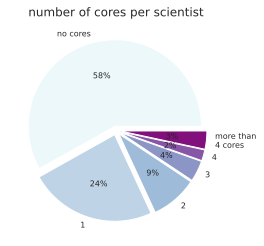

In [373]:
from collections import Counter
import collections
X=collections.OrderedDict(sorted(Counter(num_cores).items()))
Y=[X[x]/sum(X.values()) for x in X.keys()]
Y0=1-len(dictauthcores)/len(dict_auth_to_paper)
data=[Y0]+([x*(1-Y0) for x in Y[0:4]])

data.append(1-np.sum(data[0:5]))
labels = [x for x in range(len(data)-1)]
labels.append('more than\n'+str(len(data)-2)+' cores')
labels[0]='no cores'
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]



label_ff = 20;ff = 20;aa=4;bb=4;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])


#create pie chart
colors=['#edf8fb','#bfd3e6','#9ebcda','#8c96c6','#8856a7','#810f7c']
ax=plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%' ,textprops={'fontsize': 8},explode=[.05 for x in range(len(data))])
plt.title('number of cores per scientist');
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig_CoresPerScientist.pdf',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig_CoresPerScientist.png',dpi=300, bbox_inches = "tight")


Among the population, 42% of scientists are part of atleast one core while its rare to have more than 3 cores.


Fede:Persistent collaborations are common in science, 


temporal trend of exclusivity 

In [ ]:
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
with open(path_career+'dict_authage2023.pkl', 'rb') as f:
    dict_authage2023=pickle.load(f) #author age in 2023
    


path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
with open(path_career+'dict_workcounts.pkl', 'rb') as f:
    dict_workcounts=pickle.load(f) #author age in 2023

### - who are these scientists with no cores?


- Number of papers of scientists with no cores

In [662]:
# label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
# nb=30
# fig = plt.figure(figsize=(aa, bb));
# spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
# ax = fig.add_subplot(spec[0])
# authzerocores=[auth for auth in dict_auth_to_paper.keys() if auth not in dictauthcores.keys()];
# X=np.array([dict_workcounts[x] for x in authzerocores]);X=X[X<200];X=X[X>19]

# plt.hist(X,bins=nb,density=True,alpha=.4,label='authors with no cores')

# Y=np.array([dict_workcounts[x] for x in dictauthcores.keys()]);Y=Y[Y<200];Y=Y[Y>19]
# plt.hist(Y,bins=nb,density=True,alpha=.4,label='authors with cores')
# plt.legend(frameon=False,loc='upper right')
# sns.despine(ax=ax)
# plt.xlabel('number of publications, n')
# plt.ylabel('pdf(n)')

# print(np.mean(X),np.mean(Y))
# # plt.savefig('teamsfig1.1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig1.1.pdf',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig1.1.png',dpi=300, bbox_inches = "tight")


# FIGURE 1----------------


2. Distribution of coresizes, Time taken to form persistent team 
from the time of first pairwise meeting of any members

In [464]:
maxSS=7


In [918]:
t=[]
for gsize in range(3,maxS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
#     A=A[A['is_formed_in_one_shot']==False]
    print(gsize,'----Time taken to form persistent team= ',round(np.mean(A['time_taken_to_accumulatev2']),1))
#     print(gsize,'----Time taken per member= ',np.mean(A['time_taken_to_accumulatev2'])/gsize)
    t.append(np.mean(A['time_taken_to_accumulatev2']))
print('FROM THE TIME OF FIRST JOINT PUBLICATION BY ANY PAIR OF MEMBERS')

3 ----Time taken to form persistent team=  4.5
4 ----Time taken to form persistent team=  7.2
5 ----Time taken to form persistent team=  9.0
6 ----Time taken to form persistent team=  10.3
FROM THE TIME OF FIRST JOINT PUBLICATION BY ANY PAIR OF MEMBERS


In [1129]:
t=[]
for gsize in range(3,maxS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
#     A=A[A['is_formed_in_one_shot']==False]
    print(gsize,'----Time taken to form persistent team= ',round(100*np.mean(A['is_formed_in_one_shot']),1))
#     print(gsize,'----Time taken per member= ',np.mean(A['time_taken_to_accumulatev2'])/gsize)


3 ----Time taken to form persistent team=  16.8
4 ----Time taken to form persistent team=  5.1
5 ----Time taken to form persistent team=  2.3
6 ----Time taken to form persistent team=  1.4


In [1124]:
A

group        pvalue  w  \
540       (https://openalex.org/A2627180520, https://ope...  3.377471e-62  6   
547       (https://openalex.org/A2627180520, https://ope...  2.954530e-56  5   
1848      (https://openalex.org/A2044384870, https://ope...  2.758778e-57  5   
2132      (https://openalex.org/A1918528059, https://ope...  9.304664e-59  6   
2360      (https://openalex.org/A2141908654, https://ope...  2.302864e-53  5   
...                                                     ...           ... ..   
34955765  (https://openalex.org/A4336574250, https://ope...  1.499165e-55  5   
35036984  (https://openalex.org/A25027329, https://opena...  1.308818e-56  5   
35075165  (https://openalex.org/A2006258413, https://ope...  3.758120e-59  5   
35085433  (https://openalex.org/A15629519, https://opena...  3.202446e-62  5   
35174344  (https://openalex.org/A157101376, https://open...  1.380790e-52  5   

           fdr                             ni      N  size  \
540       True  (298, 198, 174, 339, 238, 58)  48992     6   
547       True   (287, 195, 173, 234, 57, 21)  42137     6   
1848      True    (131, 106, 129, 67, 83, 82)  36444     6   
2132      True   (208, 50, 145, 44, 246, 267)  23280     6   
2360      True    (101, 99, 58, 137, 181, 79)  27128     6   
...        ...                            ...    ...   ...   
34955765  True       (41, 87, 30, 83, 66, 25)  13899     6   
35036984  True     (77, 29, 226, 63, 104, 70)  26610     6   
35075165  True      (36, 25, 25, 26, 115, 35)  13434     6   
35085433  True        (31, 34, 7, 89, 84, 59)  19015     6   
35174344  True       (72, 59, 26, 71, 36, 61)  10925     6   

          first_paper_pubyear  last_paper_pubyear  is_formed_in_one_shot  ...  \
540                  1988.003            1989.419                  False  ...   
547                  1987.003            1988.728                  False  ...   
1848                 1977.169            1979.086                  False  ...   
2132                 2006.086            2011.086                  False  ...   
2360                 2005.836            2011.336                  False  ...   
...                       ...                 ...                    ...  ...   
34955765             1996.419            1997.419                  False  ...   
35036984             2005.636            2009.175                  False  ...   
35075165             1999.806            2002.306                  False  ...   
35085433             1992.764            1993.778                  False  ...   
35174344             2011.175            2013.239                  False  ...   

          RES_FILTER  corediversitywNonCore_PerNonCoreAuth  \
540             True                              0.001474   
547             True                              0.007855   
1848            True                             -0.003649   
2132            True                              0.019922   
2360            True                              0.009583   
...              ...                                   ...   
34955765        True                              0.010640   
35036984        True                              0.000000   
35075165        True                              0.073236   
35085433        True                             -0.000954   
35174344        True                             -0.002694   

          knowledgebroadnesswNonCore_PerNonCoreAuth  agegap_core_noncore  \
540                                        0.008685             5.833667   
547                                        0.092319             3.584000   
1848                                      -0.007601            22.627000   
2132                                       0.048678            14.952500   
2360                                       0.102561                  NaN   
...                                             ...                  ...   
34955765                                   0.137316             6.333000   
35036984              

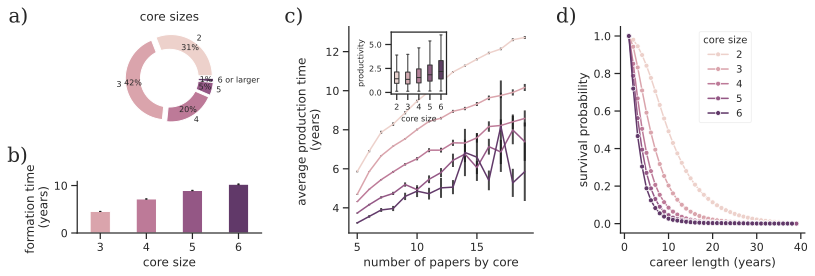

In [956]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd
from scipy import stats
sns.set_style("ticks")
# from lifelines import KaplanMeierFitter  # Uncomment this if lifelines is installed and KaplanMeierFitter is needed.

# Your size variables
label_ff = 20; ff = 20; aa = 12; bb = 4; wspace_ = 1; hspace_ = .4;
legendff=10;ffinset=8
# Set up figure and GridSpec
fig = plt.figure(figsize=(aa, bb))
spec = gridspec.GridSpec(ncols=3, nrows=2, height_ratios=[2, 1], width_ratios=[1,1,1])

# New Panel A (Old Panels A and B)
# #________________________________________________________________________________________
# Top subplot (Old Panel A)
ax_top = fig.add_subplot(spec[0, 0])
HH=7
X=[]
for gsize in range(2,HH):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
    X.append(A.shape[0])
    
Y=[x/sum(X) for x in X]
Y
labels = [x for x in range(2,HH-1)]
# labels.append(str(HH-2)+' or more')
labels.append('6 or larger')
#define Seaborn color palette to use
core_pal=sns.cubehelix_palette()
core_colors = sns.cubehelix_palette(n_colors=6)
core_colors_dict = {it:core_colors[it-2] for it in range(2,maxS)}


#create pie chart
# labels=['dyads','triads','quartets','quintets','teams of ']
colors=['#fff7fb','#ece7f2','#d0d1e6','#a6bddb','#74a9cf','#3690c0','#0570b0','#045a8d','#023858']
plt.pie(Y, labels = labels, colors = core_pal, autopct='%.0f%%',pctdistance=0.82 ,textprops={'fontsize': 8},explode=[.07 for x in range(len(Y))])

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.title('core sizes');
ax_top.text(-1.06, 1.0, 'a)', transform=ax_top.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')





# Bottom subplot (Old Panel B)
# #________________________________________________________________________________________
ax_bottom = fig.add_subplot(spec[1, 0])
# sns.set(style="white")
dfplot = pd.DataFrame()
x=[];y_err=[]
for gsize in range(2,maxS):
    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
#     A=A[A['is_formed_in_one_shot']==False]    
    x.append(np.mean(A['time_taken_to_accumulatev2']))
    y_err.append(stats.sem(A['time_taken_to_accumulatev2']))  # Calculate standard deviation
dfplot['gsize']=[gsize for gsize in range(2,maxS)]
dfplot['Average formation time (years)']=x

ax_bottom.bar(dfplot['gsize'], dfplot['Average formation time (years)'],width=.44, color=core_pal, yerr=y_err, capsize=1)
plt.xlabel('core size');plt.ylabel('formation time \n(years)');
ax_bottom.set_xlim([2.5,maxS-.5])
sns.despine()  # Removing the top and right spines
sns.set_style("ticks")
ax_bottom.text(-0.38, 1.3, 'b)', transform=ax_bottom.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')


# New Panel B (Old Panel C)
# #________________________________________________________________________________________
ax_right = fig.add_subplot(spec[:, 2])
from scipy import stats
from lifelines import KaplanMeierFitter
dict_career_lengths={}
for gsize in range(2,maxS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
    A=A[A['career_length']<40]
    A=A[A['career_length']>0]
    dict_career_lengths[gsize]=list(A['career_length'])


# Create a DataFrame for plotting
combined_data = pd.DataFrame()

# Iterate through the dictionary and calculate survival probabilities for each group
for key, career_lengths in dict_career_lengths.items():
    max_career_length = int(max(career_lengths))
    survival_probabilities = []

    for year in range(1, (max_career_length) + 1):
        survival_probability = len([length for length in career_lengths if length >= year]) / len(career_lengths)
        survival_probabilities.append(survival_probability)

    # Append to the combined DataFrame
    temp_df = pd.DataFrame({'Year': range(1, max_career_length + 1), 'Survival_Probability': survival_probabilities, 'core size': key})
    combined_data = pd.concat([combined_data, temp_df])

# Plotting
ax=sns.lineplot(x='Year', y='Survival_Probability', hue='core size', data=combined_data, marker='o',markersize=5,palette=core_pal)
# plt.title('Survival Curves for Different Groups of Scientists')
plt.xlabel('career length (years)')
plt.ylabel('survival probability')
sns.despine(ax=ax)
leg=plt.legend(title='core size', framealpha=0.3,loc='upper left', bbox_to_anchor=(.4, 1), prop={'size': legendfff},fontsize=legendff,ncol=1)
leg.set_title('core size',prop={'size':legendfff})
ax_right.text(-0.35, 1.0, 'd)', transform=ax_right.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')

# New Panel C (Old Panel D)
# #________________________________________________________________________________________
# If Panel D should be next to Panel C (on its right) in the same row, then:
sns.set_style("ticks")
ax_right = fig.add_subplot(spec[:, 1])
dfplot=pd.DataFrame()
for gsize in range(2,maxS):
    for W in range(5,20):
        A=significant_cores3[gsize]
        A=A[A['RES_FILTER']==True]
        A=A[A['w']==W]
        x=pd.DataFrame()
        x['time taken to produce (years)']=list(A[(A['persistance_time']>1) &(A['persistance_time']<30)]['persistance_time'])
        x['production_rate']=A['production_rate']
        x['core size']=gsize
        x['number of papers by core']=W
        dfplot=pd.concat([dfplot,x])
grouped = dfplot.groupby(['core size', 'number of papers by core'])['time taken to produce (years)']
summary = grouped.agg(mean='mean', sem=lambda x: stats.sem(x, ddof=1)).reset_index()

# Calculate the 95% confidence intervals
summary['ci_95'] = summary['sem'] * stats.t.ppf((1 + 0.95) / 2., grouped.count() - 1)
# ax = sns.lineplot(data=summary, x='number of papers by core', y='mean', hue='core size', style='core size', markers=True, err_style='bars', ci='sd')

ax_right = sns.lineplot(data=summary, x='number of papers by core', y='mean', hue='core size',  err_style='bars',palette=core_pal)
x=list(summary['number of papers by core']);
y=list(summary['mean']);y_err=summary['sem'];
alpha=.8;ini_=0;lw=2;ms=2
# ax.errorbar(x,y,y_err ,fmt='', mfc='w',mec='w', ms=0,lw=lw, mew=lw,color='#beaed4',ecolor='#beaed4',alpha=alpha,label=r'NSF winners')

ax_right.errorbar(x,y,y_err ,fmt='none', mfc='w',mec='w', ms=0,lw=lw, mew=lw,color='k',ecolor='k',alpha=alpha)

# ax = sns.lineplot(data=summary, x='number of papers by core', y='mean', hue='core size', err_style="bars", errorbar=("sem", 2))
sns.despine(ax=ax_right)
ax_right.set_xticks([x for x in range(5,20,5)])
plt.xlabel('number of papers by core')
plt.ylabel('average production time \n(years)')
ax_right.text(-0.35, 1.0, 'c)', transform=ax_right.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')
plt.legend([],[], frameon=False,fontsize=legendff)

# dfplot.reset_index(inplace=True)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
dfplot=pd.DataFrame()
for gsize in range(2,maxS):
        A=significant_cores3[gsize]
        A=A[A['RES_FILTER']==True]
        x=pd.DataFrame()
        x['production_rate']=A['production_rate']
        x['core size']=gsize
        dfplot=pd.concat([dfplot,x])
inset_ax = inset_axes(ax_right, width="30%", height="30%", loc='upper left',bbox_to_anchor=(0.2,0,1,1), bbox_transform=ax_right.transAxes)
sns.set_style('whitegrid')  # Set the style to 'whitegrid'
inset_ax=sns.boxplot(data=dfplot, x='core size', y='production_rate' ,showfliers=False,width=.4,palette=core_pal)    
inset_ax.set_ylabel('productivity',fontsize=ffinset)
inset_ax.set_xlabel('core size',fontsize=ffinset)
inset_ax.tick_params(axis='both', which='major', labelsize=ffinset)
inset_ax.tick_params(axis='both', which='minor', labelsize=ffinset)
# inset_ax.set_title('Inset Title')

# Adjust layout
plt.tight_layout()

plt.savefig('TeamsFig1.svg', dpi=300, bbox_inches="tight")
plt.savefig('TeamsFig1.pdf', dpi=300, bbox_inches="tight")
plt.savefig('TeamsFig1.png', dpi=300, bbox_inches="tight")


# FIGURE 2-----------------------

### caculations

In [1113]:
import numpy as np
from scipy.special import comb
from itertools import combinations_with_replacement, product
from math import prod
import matplotlib
def calculate_team_compositions(N, proportions, team_size):
    categories = list(proportions.keys())
    num_categories = {category: int(round(prop * N)) for category, prop in proportions.items()}

    def calculate_probability(composition):
        counts = {category: composition.count(category) for category in categories}
        return comb(N, team_size) ** -1 * prod(comb(num_categories[category], count) for category, count in counts.items())

    probabilities = {}
    for composition in combinations_with_replacement(categories, team_size):
        key = '_'.join(sorted(composition))
        probabilities[key] = probabilities.get(key, 0) + calculate_probability(composition)

    return probabilities



# Add this function to group the probabilities
def group_probabilities(team_compositions):
    groupings = {
        "only_young": lambda k: all(c == "young" for c in k),
        "only_midage": lambda k: all(c == "midage" for c in k),
        "only_oldage": lambda k: all(c == "oldage" for c in k),
        "mixed_young_midage": lambda k: "young" in k and "midage" in k and "oldage" not in k,
        "mixed_young_oldage": lambda k: "young" in k and "oldage" in k and "midage" not in k,
        "mixed_midage_oldage": lambda k: "midage" in k and "oldage" in k and "young" not in k,
        "mixed_all": lambda k: "young" in k and "midage" in k and "oldage" in k
    }

    grouped_probabilities = {key: sum(prob for comp, prob in team_compositions.items() if func(comp.split('_')))
                             for key, func in groupings.items()}
    return grouped_probabilities


def simulate_team_compositions(proportions, team_size, trials):
    categories = list(proportions.keys())
    results = {category: [] for category in ["only_young", "only_midage", "only_oldage", 
                                             "mixed_young_midage", "mixed_young_oldage", 
                                             "mixed_midage_oldage", "mixed_all"]}

    for _ in range(trials):
        team = np.random.choice(categories, size=team_size, p=list(proportions.values()))
        counts = {category: team.tolist().count(category) for category in categories}
        
        results["only_young"].append(counts["young"] == team_size)
        results["only_midage"].append(counts["midage"] == team_size)
        results["only_oldage"].append(counts["oldage"] == team_size)
        results["mixed_young_midage"].append(counts["young"] > 0 and counts["midage"] > 0 and counts["oldage"] == 0)
        results["mixed_young_oldage"].append(counts["young"] > 0 and counts["oldage"] > 0 and counts["midage"] == 0)
        results["mixed_midage_oldage"].append(counts["midage"] > 0 and counts["oldage"] > 0 and counts["young"] == 0)
        results["mixed_all"].append(all(counts[category] > 0 for category in categories))

    means = {key: np.mean(values) for key, values in results.items()}
    std_devs = {key: np.std(values) for key, values in results.items()}
    
    return means, std_devs
import matplotlib.gridspec as gridspec

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._setlabels(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])
        
    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)
        ax.set_xlabel('knowledge broadness')
        ax.set_ylabel('topic diversity')
    def _setlabels(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)
#         ax.set_xlabel('knowledge broadness')
#         ax.set_ylabel('synergistic diversity')
        ax.set_ylim([-.02,1])
        ax.set_yticks([0,.5,1])
        
    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

        

#_________________________________________________________

data = {
    "Team Size": [],  # This would be the range of team sizes you have
    "only_young": [],  # Percentages for each team size
    "only_midage": [],
    "only_oldage": [],
    "mixed_young_midage": [],
    "mixed_young_oldage": [],
    "mixed_midage_oldage": [],
    "mixed_all": []
}
for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A.dropna()

    import pandas as pd

    # Define the mutually exclusive categories
    only_young = (A['frac_young'] == 1) & (A['frac_midage'] == 0) & (A['frac_oldage'] == 0)
    only_midage = (A['frac_young'] == 0) & (A['frac_midage'] == 1) & (A['frac_oldage'] == 0)
    only_oldage = (A['frac_young'] == 0) & (A['frac_midage'] == 0) & (A['frac_oldage'] == 1)
    mixed_young_midage = (A['frac_young'] > 0) & (A['frac_midage'] > 0) & (A['frac_oldage'] == 0)
    mixed_young_oldage = (A['frac_young'] > 0) & (A['frac_midage'] == 0) & (A['frac_oldage'] > 0)
    mixed_midage_oldage = (A['frac_young'] == 0) & (A['frac_midage'] > 0) & (A['frac_oldage'] > 0)
    mixed_all = (A['frac_young'] > 0) & (A['frac_midage'] > 0) & (A['frac_oldage'] > 0)
    total_teams=only_young.sum()+only_midage.sum()+only_oldage.sum()+mixed_young_midage.sum()+mixed_midage_oldage.sum()+mixed_young_oldage.sum()+mixed_all.sum()
    # Calculate the percentage for each category
     
#     total_teams = A.shape[0]
    percent_only_young = only_young.sum() / total_teams * 100
    percent_only_midage = only_midage.sum() / total_teams * 100
    percent_only_oldage = only_oldage.sum() / total_teams * 100
    percent_mixed_young_midage = mixed_young_midage.sum() / total_teams * 100
    percent_mixed_young_oldage = mixed_young_oldage.sum() / total_teams * 100
    percent_mixed_midage_oldage = mixed_midage_oldage.sum() / total_teams * 100
    percent_mixed_all = mixed_all.sum() / total_teams * 100
    
    data["Team Size"].append(gsize)
    data["only_young"].append(percent_only_young)
    data["only_midage"].append(percent_only_midage)
    data["only_oldage"].append(percent_only_oldage)
    data["mixed_young_midage"].append(percent_mixed_young_midage)
    data["mixed_young_oldage"].append(percent_mixed_young_oldage)
    data["mixed_midage_oldage"].append(percent_mixed_midage_oldage)
    data["mixed_all"].append(percent_mixed_all)
agegroups_within_core = pd.DataFrame(data)

data_null = {
    "Team Size": [],  # This would be the range of team sizes you have
    "only_young": [],  # Percentages for each team size
    "only_midage": [],
    "only_oldage": [],
    "mixed_young_midage": [],
    "mixed_young_oldage": [],
    "mixed_midage_oldage": [],
    "mixed_all": []
}
# Example usage
for gsize in range(2,maxSS):
    N = significant_cores3[gsize].shape[0]
    proportions=age_proportions_in_data[gsize]
    team_size = gsize
    team_compositions = calculate_team_compositions(N, proportions, team_size)
    grouped_probs = group_probabilities(team_compositions)
    data_null["Team Size"].append(gsize)
    for k in grouped_probs.keys():
        data_null[k].append(grouped_probs[k]*100) 
    
agegroups_within_core_null = pd.DataFrame(data_null)


## Plot


In [1114]:

def plotCDFax(ax,data,label):
    count, bins_count = np.histogram(data, bins=20)
    # finding the PDF of the histogram using count values
    pdf = count / sum(count)
    # using numpy np.cumsum to calculate the CDF
    # We can also find using the PDF values by looping and adding
    cdf = np.cumsum(pdf)
    # plotting PDF and CDF
#     plt.plot(bins_count[1:], pdf, color="red", label="PDF")
    ax=plt.plot(bins_count[1:], cdf,'.-', label=label,alpha=.8,markersize=.1);
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

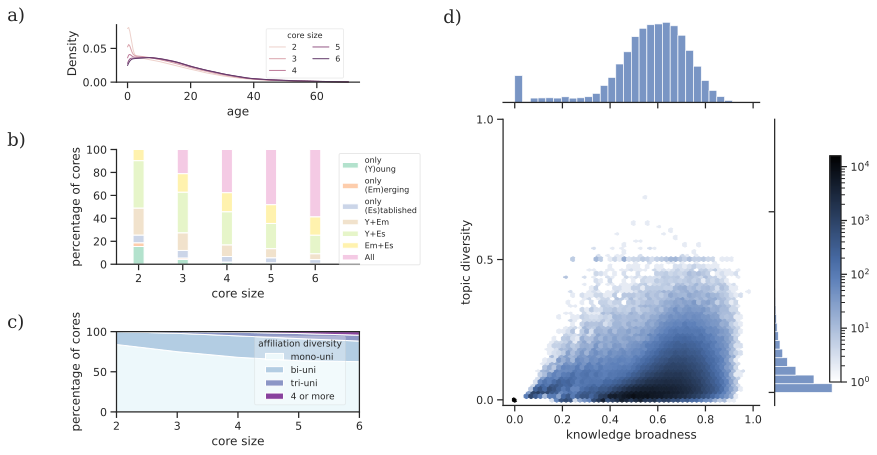

In [1115]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd
from scipy import stats
sns.set_style("ticks")
# from lifelines import KaplanMeierFitter  # Uncomment this if lifelines is installed and KaplanMeierFitter is needed.

# Your size variables
label_ff = 18; ff = 18; aa = 12; bb = 6.5; wspace_ = .5; hspace_ = .1;
legendff=10;ffinset=8
# Set up figure and GridSpec
fig = plt.figure(figsize=(aa, bb))
spec = gridspec.GridSpec(ncols=2, nrows=3, height_ratios=[.5, 1,.7], width_ratios=[.7,1])
#_______________________________________________________
ax_top = fig.add_subplot(spec[0, 0])
dfplot=pd.DataFrame()

for gsize in range(2,maxSS):
    icd=np.where(significant_cores3[gsize].columns=='corediversity')[0][0]
    isize=np.where(significant_cores3[gsize].columns=='size')[0][0]
    print(gsize,end='\r')
    A=pd.DataFrame(np.concatenate(ageatformation[gsize]))
    A.columns=['age']
    A=A[A['age']>=0] 
    A=A[A['age']<=maxage]
    ax_top=sns.kdeplot(data=A,clip=[0,maxage], x="age",color=core_colors_dict[gsize],label=''+str(gsize),linewidth=1);
    # ax=sns.violinplo|t(data=dfplot.dropna(), x="core_diversity",y='size');
# ax=sns.barplot(data=dfplot.dropna(), x="size", y="core_diversity",color='#99d8c9',errwidth=1.5);
ax_top.text(taxX, 1.0, 'a)', transform=ax_top.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')
sns.despine(ax=ax_top)
leg=plt.legend(loc='upper left', framealpha=falph,bbox_to_anchor=(.6, 1),ncol=2,prop={'size': legendfff-2})
leg.set_title('core size',prop={'size':legendfff-2})

# leg=plt.legend( prop={'size': legendfff},framealpha=.45);
# leg.set_title('core size',prop={'size':legendfff})
# #________________________________________________________________________________________
ax_bottom = fig.add_subplot(spec[1, 0])
# Plotting
custom_palette = ["#b3e2cd", "#fdcdac", "#cbd5e8",  "#f1e2cc","#e6f5c9", "#fff2ae", "#f4cae4",]

long_df = agegroups_within_core.melt(id_vars='Team Size', var_name='Category', value_name='Value')
long_dfnull = agegroups_within_core_null.melt(id_vars='Team Size', var_name='Category', value_name='Value')

# Initialize the bottom array to zero
bottom = [0] * len(agegroups_within_core)
bottom2 = [0] * len(agegroups_within_core_null)

# Plotting
categories = agegroups_within_core.columns[1:]  # Exclude 'Team Size'
transformations = {
    'only_young': 'only\n(Y)oung ',
    'only_midage': 'only\n(Em)erging',
    'only_oldage': 'only\n(Es)tablished',
    'mixed_young_midage': 'Y+Em',
    'mixed_young_oldage': 'Y+Es',
    'mixed_midage_oldage': 'Em+Es',
    'mixed_all': 'All'
}
for idx, category in enumerate(categories):
    # Filter data for this category
    cat_data = long_df[long_df['Category'] == category]
    cat_datanull = long_dfnull[long_dfnull['Category'] == category]

    # Plot
    ax_bottom.bar(cat_data['Team Size']-.0*np.ones((maxSS-2,)), cat_data['Value'], label=transformations[category],
           bottom=bottom, color=custom_palette[idx]
        , alpha=1)
#     ax_bottom.bar(cat_data['Team Size']-.15*np.ones((maxSS-2,)), cat_data['Value'], label=transformations[category],
#            bottom=bottom, color=custom_palette[idx]
#         , alpha=1)
    # Update the bottom positions

    bottom += cat_data['Value'].values

#     ax_bottom.bar(cat_datanull['Team Size']+.15*np.ones((maxSS-2,)), cat_datanull['Value'],
#            bottom=bottom2, color=custom_palette[idx]
#         , alpha=.4)
    # Update the bottom positions
    bottom2 += cat_datanull['Value'].values
ax_bottom.set_xlim([1.5,7])
ax_bottom.set_xticks([x for x in range(2,maxSS)])

sns.despine(ax=ax_bottom)

change_width(ax_bottom, .25)


# plt.legend( title="Age Groups",loc='upper left', 
#            bbox_to_anchor=(.85, 1),fontsize=ff-12,ncol=1)
leg=plt.legend(loc='upper left', bbox_to_anchor=(.9, 1),framealpha=.45,fontsize=legendff,ncol=1, prop={'size': legendfff-2})
leg.set_title('',prop={'size':legendfff})

sns.despine(ax=ax_bottom)
ax_bottom.set_xlabel("core size")
ax_bottom.set_ylabel("percentage of cores");

ax_bottom.text(taxX, 1, 'b)', transform=ax_bottom.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')

# #________________________________________________________________________________________
# Top subplot (Old Panel A)
ax_top2 = fig.add_subplot(spec[2, 0])

# ax=sns.barplot(data=dfplot.dropna(), x="size", y="core_diversity",color='#99d8c9',errwidth=1.5);

dict_geo={}
for gsize in range(2,maxSS):
    icd=np.where(significant_cores3[gsize].columns=='geodiversities_countries')[0][0]
    isize=np.where(significant_cores3[gsize].columns=='size')[0][0]

    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
    A=A[['uniMinSpanningAffilSet']]
    A=A.dropna()
    dict_geo[gsize]={}
    for nuni in range(1,4):
        dict_geo[gsize][nuni]=100*A[A['uniMinSpanningAffilSet']==nuni].shape[0]/A.shape[0]
#     A=A.iloc[:,[isize,icd]]
    
df = pd.DataFrame(dict_geo)
df=df.T
df.reset_index(inplace=True)
df.rename(columns={'index': 'Team Size'}, inplace=True)
df_long_diff=df.melt(id_vars='Team Size', var_name='number of affiliations', value_name='Percentage')
df_long_diff['number of affiliations']=df_long_diff['number of affiliations'].replace({1:'mono-uni',2:'bi-uni',3:'tri-uni'})
df_long_diff
pivot_df = df_long_diff.pivot(index='Team Size', columns='number of affiliations', values='Percentage')
pivot_df
pivot_df['>3 uni']=100-pivot_df['bi-uni']-pivot_df['mono-uni']-pivot_df['tri-uni']
# Make the plot
ax_top2.stackplot(range(2,maxSS),  pivot_df["mono-uni"],  pivot_df["bi-uni"],  pivot_df["tri-uni"],pivot_df[">3 uni"], labels=['mono-uni','bi-uni','tri-uni','4 or more'],colors=['#edf8fb','#b3cde3','#8c96c6','#88419d'])
plt.legend()
plt.margins(0,0)
ax_top2.set_xlabel('core size')
# plt.ylabel('% co-located cores')
ax_top2.set_ylabel('percentage of cores')
ax_top2.text(taxX, 1.0, 'c)', transform=ax_top2.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')
plt.rcParams['legend.title_fontsize'] = 'xx-small'
leg=plt.legend(title='minimum universities\n(spanning the team)', framealpha=0.3,loc='upper left', bbox_to_anchor=(.55, 1), prop={'size': legendfff-1},fontsize=legendff-1,ncol=1)
leg.set_title('affiliation diversity',prop={'size':legendfff-1})
# ax_top.text(-.9, 1.0, 'a)', transform=ax_top.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')





# Bottom subplot (Old Panel B)

# New Panel B (Old Panel C)
# #________________________________________________________________________________________
# ax_right = fig.add_subplot(spec[:, 1])
# sns.despine(ax=ax_right)


dfplot=pd.DataFrame()
for gsize in range(2,maxSS):
    icd=np.where(significant_cores3[gsize].columns=='knowledgebroadness')[0][0]
    isize=np.where(significant_cores3[ gsize].columns=='corediversity')[0][0]

    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
    A=A[A['persistance_time']>=1]       
    dfplot=pd.concat([dfplot ,A])
dfplot['knowledgebroadness']=dfplot['knowledgebroadness']/np.log2(19)
# sns.set_style('white')  # Set the style to 'whitegrid'
        
# fig = plt.figure(figsize=(6,3))
kdeplot = sns.jointplot(x=dfplot['knowledgebroadness'],y=dfplot['corediversity'], kind="hex", palette='Blues',norm=matplotlib.colors.LogNorm(),
                       height=5, ratio=3,marginal_kws=dict(bins=30))
plt.text(-.3, 1.33, 'd)',fontsize=label_ff, va='bottom', fontfamily='serif')

clb=plt.colorbar()
clb.ax.tick_params(labelsize=ff) 
clb.ax.set_title('number of cores',fontsize=ff)
mg0 = SeabornFig2Grid(kdeplot, fig, spec[:, 1])

spec.tight_layout(fig)
plt.colorbar()

plt.tight_layout()

plt.savefig('TeamsFig2.svg', dpi=300, bbox_inches="tight")
plt.savefig('TeamsFig2.pdf', dpi=300, bbox_inches="tight")
plt.savefig('TeamsFig2.png', dpi=300, bbox_inches="tight")

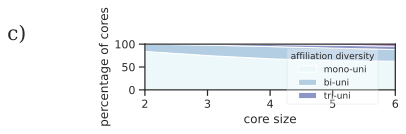

In [1137]:
fig = plt.figure(figsize=(aa, bb))
spec = gridspec.GridSpec(ncols=2, nrows=3, height_ratios=[.5, 1,.7], width_ratios=[.7,1])
#_______________________________________________________
ax_top2 = fig.add_subplot(spec[2, 0])
# ax=sns.barplot(data=dfplot.dropna(), x="size", y="core_diversity",color='#99d8c9',errwidth=1.5);
dict_geo={}
affil_all_size=[]
for gsize in range(2,maxSS):
    icd=np.where(significant_cores3[gsize].columns=='geodiversities_countries')[0][0]
    isize=np.where(significant_cores3[gsize].columns=='size')[0][0]

    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
    A=A[['uniMinSpanningAffilSet']]
    A=A.dropna()
    affil_all_size=affil_all_size+list(A['uniMinSpanningAffilSet'])
    
    dict_geo[gsize]={}
    for nuni in range(1,4):
        dict_geo[gsize][nuni]=100*A[A['uniMinSpanningAffilSet']==nuni].shape[0]/A.shape[0]
#     A=A.iloc[:,[isize,icd]]
    
df = pd.DataFrame(dict_geo)
df=df.T
df.reset_index(inplace=True)
df.rename(columns={'index': 'Team Size'}, inplace=True)
df_long_diff=df.melt(id_vars='Team Size', var_name='number of affiliations', value_name='Percentage')
df_long_diff['number of affiliations']=df_long_diff['number of affiliations'].replace({1:'mono-uni',2:'bi-uni',3:'tri-uni'})
df_long_diff
pivot_df = df_long_diff.pivot(index='Team Size', columns='number of affiliations', values='Percentage')
pivot_df
pivot_df['>3 uni']=100-pivot_df['bi-uni']-pivot_df['mono-uni']-pivot_df['tri-uni']
# Make the plot
ax_top2.stackplot(range(2,maxSS),  pivot_df["mono-uni"],  pivot_df["bi-uni"],  pivot_df["tri-uni"],pivot_df[">3 uni"], labels=['mono-uni','bi-uni','tri-uni'],colors=['#edf8fb','#b3cde3','#8c96c6','#88419d'])
plt.legend()
plt.margins(0,0)
ax_top2.set_xlabel('core size')
# plt.ylabel('% co-located cores')
ax_top2.set_ylabel('percentage of cores')
ax_top2.text(taxX, 1.0, 'c)', transform=ax_top2.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')
plt.rcParams['legend.title_fontsize'] = 'xx-small'
leg=plt.legend(title='minimum universities\n(spanning the team)', framealpha=0.3,loc='upper left', bbox_to_anchor=(.55, 1), prop={'size': legendfff-1},fontsize=legendff-1,ncol=1)
leg.set_title('affiliation diversity',prop={'size':legendfff-1})

#### mean and mode age as a function of core size

In [1154]:
dfplot=pd.DataFrame()

for gsize in range(2,maxSS):
    icd=np.where(significant_cores3[gsize].columns=='corediversity')[0][0]
    isize=np.where(significant_cores3[gsize].columns=='size')[0][0]
    print(gsize,end='\r')
    A=pd.DataFrame(np.concatenate(ageatformation[gsize]))
    A.columns=['age']
    A=A[A['age']>=0] 
    A=A[A['age']<=maxage]
#     ax_top=sns.kdeplot(data=A,clip=[0,maxage], x="age",color=core_colors_dict[gsize],label=''+str(gsize),linewidth=1);
    print(gsize,', mean ',round(A['age'].mean(),1))
    print(gsize,', mode ',A['age'].mode())


2 , mean  13.5
2 , mode  0    0.0
Name: age, dtype: float64
3 , mean  14.7
3 , mode  0    0.0
Name: age, dtype: float64
4 , mean  15.9
4 , mode  0    0.0
Name: age, dtype: float64
5 , mean  16.2
5 , mode  0    0.0
Name: age, dtype: float64
6 , mean  16.5
6 , mode  0    0.0
Name: age, dtype: float64


#### percentage cores at single university

In [1140]:
affil_all_size=np.array(affil_all_size)
np.mean(affil_all_size==1)
# affil_all_size[0]

0.758087382098503

#### percentage cores at 2 universities

In [1142]:
affil_all_size=np.array(affil_all_size)
np.mean(affil_all_size>2)
# affil_all_size[0]

0.024934802339073792

Panel a and b show age categories at formation, not throughout career of the team. 
Mention in paper.

### fig c alternative

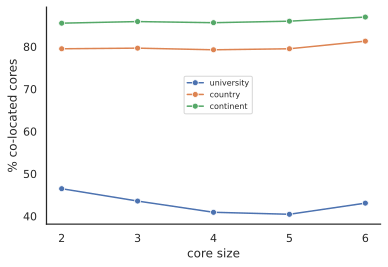

In [769]:
# dict_geo={'university':{},'country':{},'continent':{}}

dict_geo={'university':{},'country':{},'continent':{}}
for gsize in range(2,maxSS):
    icd=np.where(significant_cores3[gsize].columns=='geodiversities_countries')[0][0]
    isize=np.where(significant_cores3[gsize].columns=='size')[0][0]

    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
    A=A[A['persistance_time']>=1]       
    A=A.dropna()
    dict_geo['university'][gsize]=100*A[A['unidiversities']==0].shape[0]/A.shape[0]
    dict_geo['country'][gsize]=100*(A[A['geodiversities_countries']==0].shape[0]/A.shape[0])
    dict_geo['continent'][gsize]=100*(A[A['geodiversities_continents']==0].shape[0]/A.shape[0])
    A=A.iloc[:,[isize,icd]] 
    dfplot=pd.concat([dfplot ,A])
#     ax=sns.kdeplot(data=A.dropna(), x="geodiversities_countries",label='coresize='+str(gsize));
# ax=sns.histplot(data=dfplot.dropna(), x="geodiversities_countries",bins=20,alpha=.6,stat = "probability");
# ax=sns.violinplo|t(data=dfplot.dropna(), x="core_diversity",y='size');

df = pd.DataFrame(dict_geo)
df.reset_index(inplace=True)
df.rename(columns={'index': 'x_values'}, inplace=True)

# Plotting
sns.set(style="white")
# plt.figure(figsize=(10, 6))

# Plot each curve
markers=['s','.','o']
for column in df.columns[1:]:
    ax=sns.lineplot(x='x_values', y=column,data=df,marker='o',label=column,markers=True,dashes=False)
ax.set_xticks([x for x in range(2,maxSS)])

# Labeling
plt.xlabel('core size')
plt.ylabel('% co-located cores')
plt.legend(loc='upper left', bbox_to_anchor=(.4, .7),fontsize=ff-12,ncol=1)

sns.despine(ax=ax)

#______________________

### SI Fig synergy and broadness vs coresize

2 0.6059622466115111 0.025232099383961537
3 0.5884706052834213 0.03633918839755146
4 0.5784507078892033 0.04311319733691055
5 0.5614111478559798 0.04507291953281395
6 0.5389856978781302 0.04542535493986016


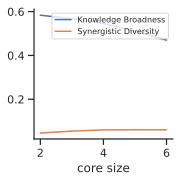

In [472]:

dfplot=pd.DataFrame()


for gsize in range(2,maxSS):
    icd=np.where(significant_cores3[gsize].columns=='knowledgebroadness')[0][0]
    isize=np.where(significant_cores3[ gsize].columns=='corediversity')[0][0]

    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
    A=A[A['persistance_time']>=1]     
    A['knowledgebroadness']=A['knowledgebroadness']/np.log2(19)
    A['corediversity']=A['corediversity']
    A=A[['size','knowledgebroadness','corediversity']]
    print(gsize,np.nanmedian(A['knowledgebroadness']),np.nanmedian(A['corediversity']))
#     A=A[A['knowledgebroadness']>=1]  
    dfplot=pd.concat([dfplot ,A])
# Melt the DataFrame
melted_df = pd.melt(dfplot, id_vars=['size'], var_name='', value_name='value')
melted_df[''] = melted_df[''].map({'knowledgebroadness': 'Knowledge Broadness',
                                                   'corediversity': 'Synergistic Diversity'})
label_ff = 20;ff = 20;aa=7;bb=6;wspace_=.8;hspace_=.5;
fig = plt.figure(figsize=(aa, bb));


spec = gridspec.GridSpec(ncols=2, nrows=2,width_ratios=[1,1], wspace=wspace_,hspace=hspace_, height_ratios=[1,1])
ax = fig.add_subplot(spec[0])
# ax=sns.boxplot(data=melted_df, x='size',y='value',hue='',showfliers=False,width=.4)    
ax=sns.lineplot(data=melted_df, x='size',y='value',hue='')    
# change_width(ax, .35)


plt.legend( title="",loc='upper left', 
           bbox_to_anchor=(.1, 1),fontsize=ff-12,ncol=1)
sns.despine(ax=ax)
plt.xlabel("core size")
plt.ylabel("");

### main text number: cores with broadness>.8


In [1148]:

dfplot=pd.DataFrame()


for gsize in range(2,maxSS):
    icd=np.where(significant_cores3[gsize].columns=='knowledgebroadness')[0][0]
    isize=np.where(significant_cores3[ gsize].columns=='corediversity')[0][0]

    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
    A=A[A['persistance_time']>=1]     
    A['knowledgebroadness']=A['knowledgebroadness']/np.log2(19)
    A['corediversity']=A['corediversity']
    A=A[['size','knowledgebroadness','corediversity']]
#     print(gsize,np.nanmedian(A['knowledgebroadness']),np.nanmedian(A['corediversity']))
#     A=A[A['knowledgebroadness']>=1]  
    dfplot=pd.concat([dfplot ,A])



In [1151]:
round(np.mean(dfplot['knowledgebroadness']>=.75)*100,1)

9.1

### SI Fig age compositions z scores

In [ ]:
data_null_std = {
    "Team Size": [],  # This would be the range of team sizes you have
    "only_young": [],  # Percentages for each team size
    "only_midage": [],
    "only_oldage": [],
    "mixed_young_midage": [],
    "mixed_young_oldage": [],
    "mixed_midage_oldage": [],
    "mixed_all": []}
data_nullv2 = {
    "Team Size": [],  # This would be the range of team sizes you have
    "only_young": [],  # Percentages for each team size
    "only_midage": [],
    "only_oldage": [],
    "mixed_young_midage": [],
    "mixed_young_oldage": [],
    "mixed_midage_oldage": [],
    "mixed_all": []}
trials=20000
for gsize in range(2,maxSS):
    N = significant_cores3[gsize].shape[0]
    proportions=age_proportions_in_data[gsize]
    team_size = gsize
    means, std_devs = simulate_team_compositions(proportions, team_size, trials)
    data_null_std["Team Size"].append(gsize)
    data_nullv2
    for k in means.keys():
        data_nullv2[k].append(round(100*means[k],1)) 
    for k in std_devs.keys():
        data_null_std[k].append(round(100*std_devs[k],3)) 

In [ ]:
label_ff = 15;ff = 20;aa=5;bb=4;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=2,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1,1])


# First, compute the percentage differences.
percentage_differences  = {key: [(a - b) / std if std != 0 else 0 for a, b, std in zip(data[key], data_null[key], data_null_std[key])]
            for key in data if key != 'Team Size'}
# Convert the percentage differences dictionary to a DataFrame for plotting.
df_percentage_diff = pd.DataFrame(percentage_differences)
df_percentage_diff['Team Size'] = data['Team Size']

# Melt the DataFrame to have team sizes, categories, and percentage differences for the bar plot.
df_long_diff = df_percentage_diff.melt(id_vars='Team Size', var_name='Category', value_name='Percentage Difference')
# df_long_diff=df_long_diff[df_long_diff['Team Size']<5]
# Split the DataFrame into 'only' and 'mixed' categories
df_only = df_long_diff[df_long_diff['Category'].str.contains('only')]
df_mixed = df_long_diff[~df_long_diff['Category'].str.contains('only')]

# Define the palette for team sizes
palette = sns.color_palette('coolwarm', len(df_percentage_diff['Team Size'].unique()))


ax = fig.add_subplot(spec[0])
# Plot for 'only' categories
sns.barplot(x='Category', y='Percentage Difference',  hue='Team Size', data=df_only, palette=palette)
ax.set_ylabel('z-score')
ax.set_xlabel('')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.gca().spines['bottom'].set_position(('data', 0))

sns.despine(ax=ax)

ax = fig.add_subplot(spec[1])
# Plot for 'mixed' categories
sns.barplot(x='Category', y='Percentage Difference', hue='Team Size',  data=df_mixed, palette=palette)
ax.set_ylabel('z-score')
ax.set_xlabel('Category')
plt.legend([],loc='upper left', bbox_to_anchor=(1, 1))
sns.despine(ax=ax)
plt.gca().spines['bottom'].set_position(('data', 0))

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

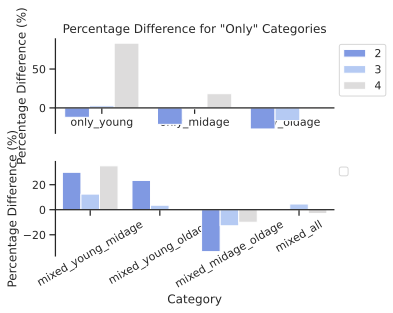

In [349]:
label_ff = 15;ff = 20;aa=5;bb=4;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=2,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1,1])


# First, compute the percentage differences.
percentage_differences = {key: [((a - b) / b * 100) if b != 0 else 0 for a, b in zip(data[key], data_null[key])]
                          for key in data if key != 'Team Size'}
# Convert the percentage differences dictionary to a DataFrame for plotting.
df_percentage_diff = pd.DataFrame(percentage_differences)
df_percentage_diff['Team Size'] = data['Team Size']

# Melt the DataFrame to have team sizes, categories, and percentage differences for the bar plot.
df_long_diff = df_percentage_diff.melt(id_vars='Team Size', var_name='Category', value_name='Percentage Difference')
df_long_diff=df_long_diff[df_long_diff['Team Size']<5]
# Split the DataFrame into 'only' and 'mixed' categories
df_only = df_long_diff[df_long_diff['Category'].str.contains('only')]
df_mixed = df_long_diff[~df_long_diff['Category'].str.contains('only')]

# Define the palette for team sizes
palette = sns.color_palette('coolwarm', len(df_percentage_diff['Team Size'].unique()))


ax = fig.add_subplot(spec[0])
# Plot for 'only' categories
sns.barplot(x='Category', y='Percentage Difference', hue='Team Size', data=df_only, palette=palette)
ax.set_title('Percentage Difference for "Only" Categories')
ax.set_ylabel('Percentage Difference (%)')
ax.set_xlabel('')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.gca().spines['bottom'].set_position(('data', 0))

sns.despine(ax=ax)

ax = fig.add_subplot(spec[1])
# Plot for 'mixed' categories
sns.barplot(x='Category', y='Percentage Difference', hue='Team Size',  data=df_mixed, palette=palette)
# ax.set_title('Percentage Difference for "Mixed" Categories')
ax.set_ylabel('Percentage Difference (%)')
ax.set_xlabel('Category')
plt.legend([],loc='upper left', bbox_to_anchor=(1, 1))
sns.despine(ax=ax)
plt.gca().spines['bottom'].set_position(('data', 0))

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### SI: Career ages at time of core formation

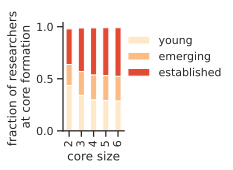

In [348]:
dfplot2=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
    A=A[A['persistance_time']>=1]
#     x=pd.DataFrame();    x['fy']=np.array(A['frac_young']);x['fm']=np.array(A['frac_midage']);    x['gsize']=gsize;
    x=pd.DataFrame();    x['young']=[np.mean(A['frac_young'])];
    x['emerging']=[np.mean(A['frac_midage'])];x['established']=[np.mean(A['frac_oldage'])];   
    x.index=[gsize];
    dfplot2=pd.concat([dfplot2,x])
df_ageatformation=dfplot2.copy()
label_ff = 20;ff = 20;aa=1.1;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])
# ax=sns.boxplot(data=dfplot2, x="gsize", y="fy",color='#f03b20',showfliers=False);
# ax=sns.barplot(data=dfplot2, x="gsize", y="fy",color='#f03b20');
ax=dfplot2.plot(ax=ax,kind='bar', stacked=True, color=['#fee8c8','#fdbb84','#e34a33'])

plt.xlabel('core size');plt.ylabel('fraction of researchers \nat core formation');
sns.despine(ax=ax)
plt.legend(bbox_to_anchor=(.9, .97), title='',framealpha=.0)

plt.tight_layout()


# plt.savefig('teamsfig_ScientistsAgeAtCoreFormation.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig_ScientistsAgeAtCoreFormation.png',dpi=300, bbox_inches = "tight")


### geodiversity

<ipython-input-357-dd9120c77946>:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


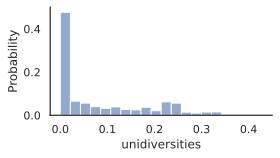

In [357]:


dfplot=pd.DataFrame()
label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

for gsize in range(2,maxS):
    icd=np.where(significant_cores3[gsize].columns=='unidiversities')[0][0]
    isize=np.where(significant_cores3[gsize].columns=='size')[0][0]

    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]       
    A=A.iloc[:,[isize,icd]]
    
    dfplot=pd.concat([dfplot ,A])
#     ax=sns.kdeplot(data=A.dropna(), x="geodiversities_countries",label='coresize='+str(gsize));
ax=sns.histplot(data=dfplot.dropna(), x="unidiversities",bins=20,alpha=.6,stat = "probability");
# ax=sns.violinplo|t(data=dfplot.dropna(), x="core_diversity",y='size');


# ax=sns.barplot(data=dfplot.dropna(), x="size", y="core_diversity",color='#99d8c9',errwidth=1.5);

sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.xlabel('core size');plt.ylabel('disciplinary diversity of core');
# plt.savefig('teamsfig_core_unidiversity.png',dpi=300, bbox_inches = "tight")


### change in diversity per non- core member

In [136]:
for gsize in range(2,maxSS):
    print('\n',gsize)
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
    A=A[(A['corediversity']>0)&(A['knowledgebroadness']>0)]
    A['% change in topic diversity']=100*np.divide(A['corediversitywNonCore_PerNonCoreAuth'],A['corediversity'])
    A['% change in broadness']=100*np.divide(A['knowledgebroadnesswNonCore_PerNonCoreAuth'],A['knowledgebroadness'])
    A=A[['% change in topic diversity','% change in broadness']]
    X=np.array(A["% change in topic diversity"])
    X=X[~np.isnan(X) & ~np.isinf(X)]
    print('% core for which core diversity reduces-',round(100*np.sum(X<0)/len(X),1))
    print('% core for which core diversity increases-',round(100*np.sum(X>0)/len(X),1))
    X=np.array(A["% change in broadness"])
    X=X[~np.isnan(X) & ~np.isinf(X)]
    print('% core for which knowledge broadness reduces-',round(100*np.sum(X<0)/len(X),1))
    print('% core for which knowledge broadness increases-',round(100*np.sum(X>0)/len(X),1))



 2
% core for which core diversity reduces- 6.7
% core for which core diversity increases- 93.3
% core for which knowledge broadness reduces- 18.8
% core for which knowledge broadness increases- 81.2

 3
% core for which core diversity reduces- 12.0
% core for which core diversity increases- 88.0
% core for which knowledge broadness reduces- 23.1
% core for which knowledge broadness increases- 76.9

 4
% core for which core diversity reduces- 16.8
% core for which core diversity increases- 83.2
% core for which knowledge broadness reduces- 26.8
% core for which knowledge broadness increases- 73.2

 5
% core for which core diversity reduces- 19.5
% core for which core diversity increases- 80.5
% core for which knowledge broadness reduces- 29.0
% core for which knowledge broadness increases- 71.0

 6
% core for which core diversity reduces- 22.1
% core for which core diversity increases- 77.9
% core for which knowledge broadness reduces- 31.5
% core for which knowledge broadness increas

# FIGURE 3: Success: Random Impact Rule
Impact: age compositions at creation, monouniversity, synergy and know broadness

In [645]:
with open(path_career+'impact_first_paper.pkl', 'rb') as f:
    impact_first_paper=pickle.load(f)
with open(path_career+'f_high.pkl', 'rb') as f:
    f_high=pickle.load(f)
with open(path_career+'f_high_shuffled.pkl', 'rb') as f:
    f_high_shuffled=pickle.load(f)
with open(path_career+'n_high.pkl', 'rb') as f:
    n_high=pickle.load(f)
with open(path_career+'n_high_shuffled.pkl', 'rb') as f:
    n_high_shuffled=pickle.load(f)
    
#                 x = c5[I[n]:I[n]+n_2018[n]]
#         npapers_nonzerocitations = np.sum(np.array(x) > 0)
        
#         if npapers_nonzerocitations/len(x) >= .3 and len(x) >= 10 and len(x) <= 100 and (np.nan not in x):


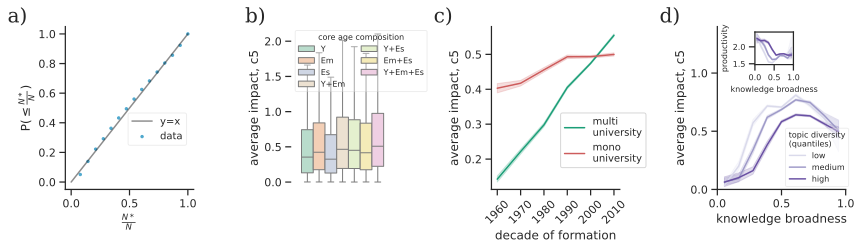

In [1116]:
label_ff = 20;ff = 20;aa=14;bb=3;wspace_=.8;hspace_=.5;
fig = plt.figure(figsize=(aa, bb));
falph=.35
spec = gridspec.GridSpec(ncols=4, nrows=1,width_ratios=[1,.8,1,1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
custom_palette = ["#b3e2cd", "#fdcdac", "#cbd5e8",  "#f1e2cc","#e6f5c9", "#fff2ae", "#f4cae4",]
sns.set_style("ticks")
taxX=-.45
#____________________________________________
ax = fig.add_subplot(spec[0]);

def plotCDF(ax,data,label,nbin,color,showpdf=False):
    al=.9
    count, bins_count = np.histogram(data, bins=nbin)
    # finding the PDF of the histogram using count values
    pdf = count / sum(count)
    # using numpy np.cumsum to calculate the CDF
    # We can also find using the PDF values by looping and adding
    cdf = np.cumsum(pdf)
    # plotting PDF and CDF
    if showpdf==True:
        plt.plot(bins_count[1:], pdf, label=label+' pdf',alpha=al,color=color)
    ax.scatter(bins_count[1:], cdf,s=6, label=label,alpha=al,color=color);

nbin=15
colors=['#43a2ca','#a8ddb5']
plotCDF(ax,f_high['max'],'data',nbin,colors[0]);
# plotCDF(ax,f_high_shuffled['max'],'shuffled',nbin);
# plt.plot([0,1], [0,1],'k-', label='y=x',alpha=.5);
# plt.plot(np.array([0,1])+1/nbin, np.array([0,0])+1/nbin,'k-', label='y=x',alpha=.8);
plt.plot([0,1], [0,1],'k-', label='y=x',alpha=.5);
sns.despine(ax=ax)
plt.ylabel(r'P($\leq \frac{N*}{N}$)');plt.xlabel(r"$\frac{N*}{N}$");
ax.text(taxX, 1.0, 'a)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')

leg=plt.legend(loc='upper left', bbox_to_anchor=(.45, .5), framealpha=falph,prop={'size': legendfff},fontsize=legendff,ncol=1)
# leg.set_title('Number of universities\n(geographical diversity)',prop={'size':legendfff})
# \n(N is position highest cited paper in team's career
#____________________________________________

#____________________________________________

ax = fig.add_subplot(spec[2])
c5='c5_av'

import math
dfplot=pd.DataFrame()
for gsize in range(2,maxSS):

    c5='c5_av'

    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
    A['decade']=(A['first_paper_pubyear']*.1).apply(math.floor)*10

    A['']=A['unidiversities']==0   

    A['']=A[''].map({False:'multi\nuniversity',True:'mono\nuniversity'})
    dfplot=pd.concat([dfplot,A[['size','','decade',c5]]])
dfplot=dfplot[dfplot[c5]<=2.5]
df = dfplot.copy()
df=df[df['decade']>1950]
# Create categories for knowledgebroadness

ax=sns.lineplot(x='decade', y=c5,hue='' ,data=df,palette={'multi\nuniversity':'#1b9e77','mono\nuniversity':'indianred'})

sns.despine(ax=ax)
plt.ylabel('average impact, c5')
plt.xlabel('decade of formation')
leg=plt.legend(framealpha=falph,loc= 'upper left', bbox_to_anchor=(.5, .5),prop={'size': legendfff-2},ncol=1)
# leg.set_title('',prop={'size': legendfff-2})
plt.legend(loc='upper left', bbox_to_anchor=(.5, .5),fontsize=legendff,ncol=1)

plt.xticks([1960,1970,1980,1990,2000,2010]);
plt.xticks(rotation=45)
ax.text(taxX, 1.0, 'c)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')


# ____________________________________________

ax = fig.add_subplot(spec[1])

dfplot=pd.DataFrame()
c5='c5_av'

for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]     
    A=A[A[c5]>0]       
#     A=A.iloc[:,[isize,icd]]
    X=pd.DataFrame(A.groupby(by=['age_composition'])[c5].mean())
    X['age_composition']=X.index
    dfplot=pd.concat([dfplot,A[['size','age_composition',c5]]])
#     print(X)  
agehueorder=['Y', 'Y+Em', 'Em','Y+Em+Es','Y+Es','Em+Es','Es']
agehueorder=['Y', 'Em','Es','Y+Em','Y+Es','Em+Es','Y+Em+Es']
sns.boxplot(data=dfplot,y=c5,hue='age_composition',showfliers=False,hue_order=agehueorder,palette=custom_palette)
# sns.violinplot(data=dfplot,y=c5,hue='age_composition',linewidth=.3,hue_order=agehueorder,palette=custom_palette)
plt.ylabel('average impact, c5')
sns.despine(ax=ax)
leg=plt.legend(loc='upper left', framealpha=falph,bbox_to_anchor=(.0, 1),ncol=2,prop={'size': legendfff-2})
leg.set_title('core age composition',prop={'size':legendfff-2})
ax.text(taxX, 1.0, 'b)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')
for spine in ["top", "left","right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
#hide tick labels
_ = ax.set_xticks([]) 

#____________________________________________
ax = fig.add_subplot(spec[3])

dfplot=pd.DataFrame()
c5='c5_av'

for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]  
    A=A[A[c5]>0]       
    A['knowledgebroadness']=A['knowledgebroadness']/np.log2(19)
    dfplot=pd.concat([dfplot,A[['size','knowledgebroadness','corediversity',c5]]])


from scipy.stats import spearmanr

df = dfplot[(dfplot['knowledgebroadness']+dfplot['corediversity'])>0].reset_index()
# df = dfplot.reset_index()
# Create categories for knowledgebroadness
L=9;L2=3
df['knowledgebroadness_'] = pd.cut(df['knowledgebroadness'], L, labels=[(i-.5)/L for i in range(1,L+1)])
# df['knowledgebroadness_'] = pd.qcut(df['knowledgebroadness'], L, labels=['Q'+str(i) for i in range(1,L+1)])
df['corediversity_'] = pd.qcut(df['corediversity'], L2, labels=['low','medium','high'])
# df['corediversity_'] = pd.qcut(df['corediversity'], L2, labels==[i for i in range(1,L2+1)])
# labels = 'Low', 'Medium', 'High'
ax=sns.lineplot(x='knowledgebroadness_', y=c5,hue='corediversity_' ,data=df,palette=sns.color_palette("Purples",L2))
# sns.boxplot(data=dfplot,y=c5,hue='age_composition',showfliers=False,hue_order=agehueorder,palette=custom_palette)

sns.despine(ax=ax)
plt.ylabel('average impact, c5')
plt.xlabel('knowledge broadness')
leg=plt.legend(title='diversity\n(quantiles)',framealpha=falph,loc= 'upper left', bbox_to_anchor=(.5, .4),prop={'size': legendfff-2},ncol=1)
leg.set_title('topic diversity\n(quantiles)',prop={'size': legendfff-2})
# plt.legend(loc='upper left', bbox_to_anchor=(.9, 1),fontsize=legendff,ncol=1)
ax.text(taxX, 1.0, 'd)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')
plt.xticks([0,.5,1])
plt.ylim([0,1.4])
plt.yticks([0,.5,1])
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
dfplot=pd.DataFrame()
c5='production_rate'
for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]  
    A['knowledgebroadness']=A['knowledgebroadness']/np.log2(19)
    dfplot=pd.concat([dfplot,A[['size','knowledgebroadness','corediversity',c5]]],ignore_index=True)
df = dfplot[(dfplot['knowledgebroadness']+dfplot['corediversity'])>0].reset_index()
# df=dfplot.copy()
L=10;L2=3
# df['knowledgebroadness_'] = pd.cut(df['knowledgebroadness'], L, labels=['Q'+str(i) for i in range(1,L+1)])
df['knowledgebroadness_'] = pd.cut(df['knowledgebroadness'], L, labels=[(i-0.5)/L for i in range(1,L+1)])
df['corediversity_'] = pd.qcut(df['corediversity'], L2, labels=['low','medium','high'])

inset_ax = inset_axes(ax, width="30%", height="20%", loc='upper left',bbox_to_anchor=(0.25,0,1,1), bbox_transform=ax.transAxes)
sns.set_style('whitegrid')  # Set the style to 'whitegrid'
inset_ax=ax=sns.lineplot(x='knowledgebroadness_', y=c5,hue='corediversity_' ,data=df,palette=sns.color_palette("Purples",L2))
    
inset_ax.set_ylabel('productivity',fontsize=ffinset)
inset_ax.set_xlabel('knowledge broadness',fontsize=ffinset)
inset_ax.set_xticks([0,.5,1])
inset_ax.tick_params(axis='both', which='major', labelsize=ffinset)
inset_ax.tick_params(axis='both', which='minor', labelsize=ffinset)
leg=inset_ax.legend([],frameon=False)
# leg.set_title('topic diversity\n(quartiles)',prop={'size': legendfff-2})


plt.tight_layout()
plt.savefig('TeamsFig3.svg', dpi=300, bbox_inches="tight");
plt.savefig('TeamsFig3.png', dpi=300, bbox_inches="tight");
plt.savefig('TeamsFig3.pdf', dpi=300, bbox_inches="tight");

### SI: static analysis of impact vs geodiversity

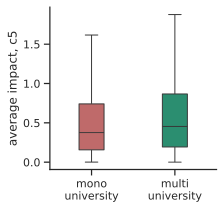

In [1092]:
label_ff = 20;ff = 20;aa=3;bb=3;wspace_=.8;hspace_=.5;

fig = plt.figure(itd,figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])

sns.set_style("ticks")
c5='c5_av'

#____________________________________________
ax = fig.add_subplot(spec[0])
dfplot=pd.DataFrame()

for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
    A=A[A[c5]>0]       
    
    A['']=A['unidiversities']==0   
    A['']=A[''].map({False:'multi\nuniversity',True:'mono\nuniversity'})
    dfplot=pd.concat([dfplot,A[['size','',c5]]])

#     A=A.iloc[:,[isize,icd]]
    X=pd.DataFrame(A.groupby(by=[''])[c5].mean())
    X['unidiversities']=X.index
#     print(X)
#     print(A.groupby(by=['IsMonoUni'])['c5_first'].mean())
# dfplot=dfplot[dfplot['c5_first']<=4]
wviolin=.4;lw=1
dfplot=dfplot[dfplot[c5]<=2.5]
# sns.violinplot(data=dfplot,x='',y=c5,width=wviolin,linewidth=lw,palette=['#1b9e77','#7570b3'])

sns.barplot(data=dfplot,x='',y=c5,width=.3,palette={'multi\nuniversity':'#1b9e77','mono\nuniversity':'indianred'},order=['mono\nuniversity','multi\nuniversity'])
sns.despine(ax=ax)

plt.ylabel('average impact, c5')
# plt.legend(loc='upper left', bbox_to_anchor=(.0, 1),fontsize=legendff,ncol=1)
plt.tight_layout()
plt.savefig('TeamsFigSI6.svg', dpi=300, bbox_inches="tight");
plt.savefig('TeamsFigSI6.png', dpi=300, bbox_inches="tight");
plt.savefig('TeamsFigSI6.pdf', dpi=300, bbox_inches="tight");

### SI Hot-streaks

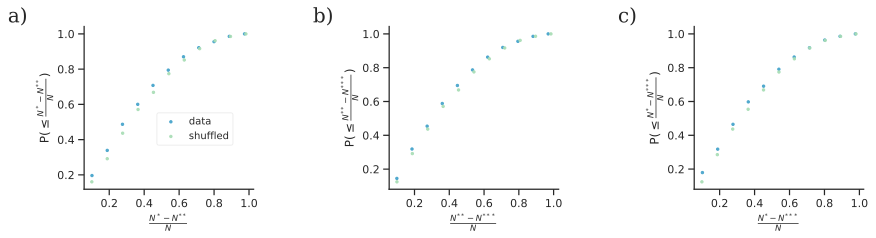

In [1093]:
label_ff = 20;ff = 20;aa=14;bb=3;wspace_=.8;hspace_=.5;
fig = plt.figure(figsize=(aa, bb));
falph=.35
spec = gridspec.GridSpec(ncols=3, nrows=1,width_ratios=[1,1,1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
custom_palette = ["#b3e2cd", "#fdcdac", "#cbd5e8",  "#f1e2cc","#e6f5c9", "#fff2ae", "#f4cae4",]
sns.set_style("ticks")
taxX=-.45
#____________________________________________

def plotCDF(ax,data,label,nbin,color,showpdf=False):
    al=.9
    count, bins_count = np.histogram(data, bins=nbin)
    # finding the PDF of the histogram using count values
    pdf = count / sum(count)
    # using numpy np.cumsum to calculate the CDF
    # We can also find using the PDF values by looping and adding
    cdf = np.cumsum(pdf)
    # plotting PDF and CDF
    if showpdf==True:
        plt.plot(bins_count[1:], pdf, label=label+' pdf',alpha=al,color=color)
    ax.scatter(bins_count[1:], cdf,s=6, label=label,alpha=al,color=color);

nbin=11
colors=['#43a2ca','#a8ddb5']

#____________________________________________

ax = fig.add_subplot(spec[0])
XData=np.abs(f_high['max']-f_high['max2'])
Xrandom=np.abs(f_high_shuffled['max']-f_high_shuffled['max2'])
plotCDF(ax,XData,'data',nbin,colors[0]);
plotCDF(ax,Xrandom,'shuffled',nbin,colors[1]);
# plt.plot([0,1], [0,1],'k-', label='y=x',alpha=.5);
# plt.plot(np.array([0,1])+1/nbin, np.array([0,0])+1/nbin,'k-', label='y=x',alpha=.5);

plt.ylabel(r'P($\leq \frac{N^*-N^{**}}{N}$)');plt.xlabel(r"$\frac{N^*-N^{**}}{N}$");
leg=plt.legend(loc='upper left', bbox_to_anchor=(.4, .5), framealpha=falph,prop={'size': legendfff},fontsize=legendff,ncol=1)
sns.despine(ax=ax)

ax.text(taxX, 1.0, 'a)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')

#____________________________________________
ax = fig.add_subplot(spec[1])
XData=np.abs(f_high['max2']-f_high['max3'])
Xrandom=np.abs(f_high_shuffled['max2']-f_high_shuffled['max3'])
plotCDF(ax,XData,'data',nbin,colors[0]);
plotCDF(ax,Xrandom,'shuffled',nbin,colors[1]);
# plt.plot([0,1], [0,1],'k-', label='y=x',alpha=.5);
# plt.plot(np.array([0,1])+1/nbin, np.array([0,0])+1/nbin,'k-', label='y=x',alpha=.5);

plt.ylabel(r'P($\leq \frac{N^{**}-N^{***}}{N}$)');plt.xlabel(r"$\frac{N^{**}-N^{***}}{N}$");
# plt.legend( framealpha=falph,loc='upper left', bbox_to_anchor=(.45, .5));
ax.text(taxX, 1.0, 'b)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')

sns.despine(ax=ax)
#____________________________________________
ax = fig.add_subplot(spec[2])
XData=np.abs(f_high['max']-f_high['max3'])
Xrandom=np.abs(f_high_shuffled['max']-f_high_shuffled['max3'])
plotCDF(ax,XData,'data',nbin,colors[0]);
plotCDF(ax,Xrandom,'shuffled',nbin,colors[1]);
# plt.plot([0,1], [0,1],'k-', label='y=x',alpha=.5);
# plt.plot(np.array([0,1])+1/nbin, np.array([0,0])+1/nbin,'k-', label='y=x',alpha=.5);

plt.ylabel(r'P($\leq \frac{N^{*}-N^{***}}{N}$)');plt.xlabel(r"$\frac{N^{*}-N^{***}}{N}$");
# plt.legend( framealpha=falph,loc='upper left', bbox_to_anchor=(.45, .5));
ax.text(taxX, 1.0, 'c)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')

sns.despine(ax=ax)


#____________________________________________
# ax = fig.add_subplot(spec[4])

# c5='c5_half1'
# c5_='c5_half2'
# c5threshold=.2
# dfplot=pd.DataFrame()

# for gsize in range(2,maxSS):
#     A=significant_cores3[gsize]
#     A=A[A['RES_FILTER']==True]
#     A=A[A[c5]>c5threshold]       
#     A=A[A[c5_]>c5threshold]       
#     X=A[['size',c5]]; X['career stage']=c5;    X.columns=['size','impact','career stage']
#     dfplot=pd.concat([dfplot,X]);
#     X=A[['size',c5_]]; X['career stage']=c5_;    X.columns=['size','impact','career stage']   
#     dfplot=pd.concat([dfplot,X]);
# dfplot['career stage']=dfplot['career stage'].map({'c5_half1':'early career\n(first half)','c5_half2':'late career\n(second half)'})

# sns.boxplot(data=dfplot.dropna(),y='impact',width=.3,x='career stage',showfliers=False,palette=['#d94801','#fdd0a2'])
# sns.despine(ax=ax)
# plt.ylabel('average impact, c5')
# plt.xticks(rotation=90)
# # plt.legend(loc='upper left', bbox_to_anchor=(.5, 1),fontsize=legendff,ncol=1)
# ax.text(taxX, 1.0, 'e)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')

#____________________________________________


plt.tight_layout()
plt.savefig('TeamsFigSI5.svg', dpi=300, bbox_inches="tight");
plt.savefig('TeamsFigSI5.png', dpi=300, bbox_inches="tight");
plt.savefig('TeamsFigSI5.pdf', dpi=300, bbox_inches="tight");

### SI career stage and Impact

20.883763100547412
30.076918187946394
35.50439395627163
34.58911425643315
34.08048289994215


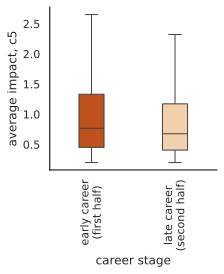

In [1094]:
label_ff = 20;ff = 20;aa=3;bb=3;wspace_=.8;hspace_=.5;

fig = plt.figure(itd,figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])

sns.set_style("white")

#____________________________________________
ax = fig.add_subplot(spec[0])

c5='c5_half1'
c5_='c5_half2'
c5threshold=.2
dfplot=pd.DataFrame()
c5h1=[];c5h2=[];
for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
    A=A[A[c5]>c5threshold]       
    A=A[A[c5_]>c5threshold]       
    X=A[['size',c5]]; X['career stage']=c5;    X.columns=['size','impact','career stage']
    dfplot=pd.concat([dfplot,X]);
    X=A[['size',c5_]]; X['career stage']=c5_;    X.columns=['size','impact','career stage']   
    dfplot=pd.concat([dfplot,X]);
    print(np.mean(100*np.divide((A[c5_]-A[c5]),A[c5])))
    c5h1.append(list(A[c5]));c5h2.append(list(A[c5_]));
dfplot['career stage']=dfplot['career stage'].map({'c5_half1':'early career\n(first half)','c5_half2':'late career\n(second half)'})

sns.boxplot(data=dfplot.dropna(),y='impact',width=.3,x='career stage',showfliers=False,palette=['#d94801','#fdd0a2'])
sns.despine(ax=ax)
plt.ylabel('average impact, c5')
plt.xticks(rotation=90)
# plt.legend(loc='upper left', bbox_to_anchor=(.5, 1),fontsize=legendff,ncol=1)
# ax.text(taxX, 1.0, 'e)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')
c5h2=np.concatenate(c5h2)
c5h1=np.concatenate(c5h1)
plt.tight_layout()
plt.savefig('TeamsFigSI7.svg', dpi=300, bbox_inches="tight");
plt.savefig('TeamsFigSI7.png', dpi=300, bbox_inches="tight");
plt.savefig('TeamsFigSI7.pdf', dpi=300, bbox_inches="tight");

In [954]:

np.sum(c5h1>c5h2)/len(c5h1)



0.5602195029177375

In [955]:
x=(100*(c5h1-c5h2)/(c5h1))
# x=x[x>-500]; x=x[x<500];
np.mean(x)

-28.503405686073272

In [885]:
x

array([  81.81343883, -169.80841707, -403.82312483, ...,   56.18701827,
         46.04337144,   68.0787297 ])

### Statistical testing for difference

In [421]:

def tests_(XData,Xrandom,paired=False):
    
    from scipy import stats
    if paired==False:
        stat, pvalue=stats.ks_2samp(XData, Xrandom)
        print("KS 2 samp Test:")
        print("Statistic:", stat)
        print("p-value:", pvalue)
    else:
        differences = XData - Xrandom
    #     Calculate the D statistic (mean of differences)
        D = np.mean(differences)
        print("D Statistic:", D)


        wilcoxon_stat, wilcoxon_pvalue = stats.wilcoxon(XData, Xrandom)
        print("Wilcoxon Signed-Rank Test:")
        print("Statistic:", wilcoxon_stat)
        print("p-value:", wilcoxon_pvalue)


1.8168972276838387
1.831525278593948
KS 2 samp Test:
Statistic: 0.011952450199477382
p-value: 4.4535152429750494e-20


In [449]:
# Random Impact Rule
X=np.abs(f_high['max'])
Y=np.random.uniform(0,1,len(XData))
tests_(X,Y,paired=True)

D Statistic: -0.01005832665547609
Wilcoxon Signed-Rank Test:
Statistic: 4736938981.0
p-value: 3.430278005270742e-26


In [450]:

c5='production_rate'
dfplot=pd.DataFrame()

for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
    A['IsMonouni']=A['unidiversities']==0   
    
#     A['']=A[''].map({False:'multi\nuniversity',True:'mono\nuniversity'})
    X=A[A['IsMonouni']==True]
    dfplot=pd.concat([dfplot,X[['size','IsMonouni',c5]]])
    X=A[A['IsMonouni']==False]
    dfplot=pd.concat([dfplot,X[['size','IsMonouni',c5]]])
    

X=np.array(dfplot[dfplot['IsMonouni']==True][c5])
Y=np.array(dfplot[dfplot['IsMonouni']==False][c5])
indX=np.where((~np.isnan(X))&(~np.isinf(X)))
indY=np.where((~np.isnan(Y))&(~np.isinf(Y)))

X=X[indX];Y=Y[indY];
print(np.mean(X))
print(np.mean(Y))

tests_(X,Y)

1.8168972276838387
1.831525278593948
KS 2 samp Test:
Statistic: 0.011952450199477382
p-value: 4.4535152429750494e-20


In [1095]:

c5='c5_half1'
c5_='c5_half2'
c5threshold=.2
dfplot=pd.DataFrame()
Xdata=[];Ydata=[];
for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
    A=A[A[c5]>c5threshold]       
    A=A[A[c5_]>c5threshold]       
    X=A[['size',c5]]; X['career stage']=c5;    X.columns=['size','impact','career stage']
    Xdata.append(A[c5]);
    dfplot=pd.concat([dfplot,X]);
    X=A[['size',c5_]]; X['career stage']=c5_;    X.columns=['size','impact','career stage']   
    dfplot=pd.concat([dfplot,X]);
    Ydata.append(A[c5_]);
dfplot['career stage']=dfplot['career stage'].map({'c5_half1':'early career\n(first half)','c5_half2':'late career\n(second half)'})


X=np.array(np.concatenate(Xdata))
Y=np.array(np.concatenate(Ydata))
indX=np.where((~np.isnan(X))&(~np.isinf(X))&(~np.isnan(Y))&(~np.isinf(Y)))
indY=np.where((~np.isnan(X))&(~np.isinf(X))&(~np.isnan(Y))&(~np.isinf(Y)))

X=X[indX];Y=Y[indY];
print(np.mean(X))
print(np.mean(Y))

tests_(X,Y,paired=True)

1.111321225468435
1.0006983680389963
D Statistic: 0.11062285742943867
Wilcoxon Signed-Rank Test:
Statistic: 9812519174.0
p-value: 0.0


In [458]:
round(100*0.17475107875209533/1.1705582412757176,1)
# show distribution of percentage decrease in c5 of 

14.9

In [1096]:
# Random Impact Rule
X=np.abs(f_high['max'])
Y=np.random.uniform(0,1,len(XData))
tests_(X,Y,paired=True)

D Statistic: -0.0005249684651397579
Wilcoxon Signed-Rank Test:
Statistic: 2226152922.0
p-value: 0.14802599483182677


In [1097]:
# hotstreaks
X=np.abs(f_high['max']-f_high['max3'])[0:10000]
Y=np.abs(f_high_shuffled['max']-f_high_shuffled['max3'])[:,9][0:10000]

tests_(X,Y)

KS 2 samp Test:
Statistic: 0.0371
p-value: 2.100314609257551e-06


### SI productivity vs compositions

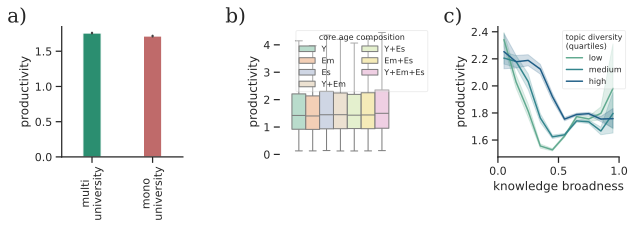

In [1117]:
label_ff = 20;ff = 20;aa=10;bb=6;wspace_=.8;hspace_=.5;
fig = plt.figure(figsize=(aa, bb));
falph=.35
spec = gridspec.GridSpec(ncols=3, nrows=2,width_ratios=[1,1,1], wspace=wspace_,hspace=hspace_, height_ratios=[1,1])
custom_palette = ["#b3e2cd", "#fdcdac", "#cbd5e8",  "#f1e2cc","#e6f5c9", "#fff2ae", "#f4cae4",]
sns.set_style("ticks")
taxX=-.45

#____________________________________________

NUM_PAPERS=5
ax = fig.add_subplot(spec[3])

c5='production_rate'
dfplot=pd.DataFrame()

for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
    A['']=A['unidiversities']==0   

    A['']=A[''].map({False:'multi\nuniversity',True:'mono\nuniversity'})
    dfplot=pd.concat([dfplot,A[['size','',c5]]])
sns.barplot(data=dfplot,x='',y=c5,width=.3,palette={'multi\nuniversity':'#1b9e77','mono\nuniversity':'indianred'})
sns.despine(ax=ax)

plt.ylabel('productivity')
plt.xticks(rotation=90)
# plt.legend(loc='upper left', bbox_to_anchor=(.0, 1),fontsize=legendff,ncol=1)
ax.text(taxX, 1.0, 'a)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')

# _____________________
ax = fig.add_subplot(spec[4])

dfplot=pd.DataFrame()
c5='production_rate'

for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]     
    X=pd.DataFrame(A.groupby(by=['age_composition'])[c5].mean())
    X['age_composition']=X.index
    dfplot=pd.concat([dfplot,A[['size','age_composition',c5]]])
#     print(X)  
agehueorder=['Y', 'Y+Em', 'Em','Y+Em+Es','Y+Es','Em+Es','Es']
agehueorder=['Y', 'Em','Es','Y+Em','Y+Es','Em+Es','Y+Em+Es']
sns.boxplot(data=dfplot,y=c5,hue='age_composition',showfliers=False,hue_order=agehueorder,palette=custom_palette)
# sns.violinplot(data=dfplot,y=c5,hue='age_composition',linewidth=.3,hue_order=agehueorder,palette=custom_palette)
plt.ylabel('productivity')
sns.despine(ax=ax)
leg=plt.legend(loc='upper left', framealpha=falph,bbox_to_anchor=(.1, 1),ncol=2,prop={'size': legendfff-2})
leg.set_title('core age composition',prop={'size':legendfff-2})
ax.text(taxX, 1.0, 'b)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')
for spine in ["top", "left","right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
#hide tick labels
_ = ax.set_xticks([]) 
#________________________
#____________________________________________
ax = fig.add_subplot(spec[5])

dfplot=pd.DataFrame()
c5='production_rate'

for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]  

    A['knowledgebroadness']=A['knowledgebroadness']/np.log2(19)
    dfplot=pd.concat([dfplot,A[['size','knowledgebroadness','corediversity',c5]]],ignore_index=True)


from scipy.stats import spearmanr

df = dfplot[(dfplot['knowledgebroadness']+dfplot['corediversity'])>0].reset_index()
# df=dfplot.copy()
L=10;L2=3
# df['knowledgebroadness_'] = pd.cut(df['knowledgebroadness'], L, labels=['Q'+str(i) for i in range(1,L+1)])
df['knowledgebroadness_'] = pd.cut(df['knowledgebroadness'], L, labels=[(i-0.5)/L for i in range(1,L+1)])
df['corediversity_'] = pd.qcut(df['corediversity'], L2, labels=['low','medium','high'])

ax=sns.lineplot(x='knowledgebroadness_', y=c5,hue='corediversity_' ,data=df,palette=sns.color_palette("crest",L2))

sns.despine(ax=ax)
plt.ylabel('productivity')
plt.xlabel('knowledge broadness')
plt.xticks([0,.5,1])
leg=plt.legend(title='diversity\n(quartiles)',framealpha=falph,loc= 'upper left', bbox_to_anchor=(.5, 1),prop={'size': legendfff-2},ncol=1)
leg.set_title('topic diversity\n(quartiles)',prop={'size': legendfff-2})
# plt.legend(loc='upper left', bbox_to_anchor=(.9, 1),fontsize=legendff,ncol=1)
ax.text(taxX, 1.0, 'c)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')

plt.tight_layout()
plt.savefig('TeamsFigSI1.svg', dpi=300, bbox_inches="tight");
plt.savefig('TeamsFigSI1.png', dpi=300, bbox_inches="tight");
plt.savefig('TeamsFigSI1.pdf', dpi=300, bbox_inches="tight");

### SI Impact vs composition (Control: Decades)

In [1099]:
# label_ff = 20;ff = 20;aa=10;bb=6;wspace_=.8;hspace_=.5;
# falph=.35
# custom_palette = ["#b3e2cd", "#fdcdac", "#cbd5e8",  "#f1e2cc","#e6f5c9", "#fff2ae", "#f4cae4",]
# sns.set_style("ticks")
# taxX=-.45

# def decade_w_filter(A,decades,itd):
#     A=A[(A['first_paper_pubyear']>=decades[itd])&(A['first_paper_pubyear']<decades[itd+1])]
#     A=A[(A['w2018']>=6)&(A['w2018']<10)]
#     return A

# decades=[x for x in range(1970,2010,5)]
# for itd in range(len(decades)-1):
#     fig = plt.figure(itd,figsize=(aa, bb));
#     spec = gridspec.GridSpec(ncols=3, nrows=2,width_ratios=[1,1,1], wspace=wspace_,hspace=hspace_, height_ratios=[1,1])

#     #____________________________________________
#     ax = fig.add_subplot(spec[3])

#     c5='c5_av'
#     dfplot=pd.DataFrame()

#     for gsize in range(2,maxSS):
#         A=significant_cores3[gsize]
#         A=A[A['RES_FILTER']==True]
#         A=decade_w_filter(A,decades,itd)
#         A['']=A['unidiversities']==0   

#         A['']=A[''].map({False:'multi\nuniversity',True:'mono\nuniversity'})
#         dfplot=pd.concat([dfplot,A[['size','',c5]]])
#     sns.boxplot(data=dfplot,x='',y=c5,width=.3,showfliers=False,palette=['#1b9e77','#7570b3'])
#     sns.despine(ax=ax)
#     plt.ylabel(c5)
#     plt.xticks(rotation=90)
#     # plt.legend(loc='upper left', bbox_to_anchor=(.0, 1),fontsize=legendff,ncol=1)
#     ax.text(taxX, 1.0, 'a)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')

#     #____________________________________________
#     ax = fig.add_subplot(spec[4])

#     dfplot=pd.DataFrame()


#     for gsize in range(2,maxSS):
#         A=significant_cores3[gsize]
#         A=A[A['RES_FILTER']==True]     
#         A=decade_w_filter(A,decades,itd)

#         X=pd.DataFrame(A.groupby(by=['age_composition'])[c5].mean())
#         X['age_composition']=X.index
#         dfplot=pd.concat([dfplot,A[['size','age_composition',c5]]])
#     #     print(X)  
#     agehueorder=['Y', 'Y+Em', 'Em','Y+Em+Es','Y+Es','Em+Es','Es']
#     agehueorder=['Y', 'Em','Es','Y+Em','Y+Es','Em+Es','Y+Em+Es']
#     sns.boxplot(data=dfplot,y=c5,hue='age_composition',showfliers=False,hue_order=agehueorder,palette=custom_palette)
#     # sns.violinplot(data=dfplot,y=c5,hue='age_composition',linewidth=.3,hue_order=agehueorder,palette=custom_palette)
#     plt.ylabel(c5)
#     sns.despine(ax=ax)
#     leg=plt.legend(loc='upper left', framealpha=falph,bbox_to_anchor=(.1, 1),ncol=2,prop={'size': legendfff-2})
#     leg.set_title('core age composition',prop={'size':legendfff-2})
#     ax.text(taxX, 1.0, 'b)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')
#     for spine in ["top", "left","right", "bottom"]:
#         _ = ax.spines[spine].set_visible(False)
#     #hide tick labels
#     _ = ax.set_xticks([]) 
#     #________________________
#     #____________________________________________
#     ax = fig.add_subplot(spec[5])

#     dfplot=pd.DataFrame()


#     for gsize in range(2,maxSS):
#         A=significant_cores3[gsize]
#         A=A[A['RES_FILTER']==True]  
#         A=decade_w_filter(A,decades,itd)

#         A['knowledgebroadness']=A['knowledgebroadness']/np.log2(19)
#         dfplot=pd.concat([dfplot,A[['size','knowledgebroadness','corediversity',c5]]])


#     from scipy.stats import spearmanr

#     df = dfplot[(dfplot['knowledgebroadness']+dfplot['corediversity'])>0].reset_index()
#     # df = dfplot.reset_index()
#     # Create categories for knowledgebroadness
#     L=10;L2=3
#     # df['knowledgebroadness_'] = pd.cut(df['knowledgebroadness'], L, labels=['Q'+str(i) for i in range(1,L+1)])
#     df['knowledgebroadness_'] = pd.cut(df['knowledgebroadness'], L, labels=[(i-0.5)/L for i in range(1,L+1)])
#     df['corediversity_'] = pd.qcut(df['corediversity'], L2, labels=['low','medium','high'])
#     # df['corediversity_'] = pd.qcut(df['corediversity'], L2, labels==[i for i in range(1,L2+1)])
#     # labels = 'Low', 'Medium', 'High'
#     # df['labels'] = pd.qcut(df['x'], len(labels), labels=labels)

#     # ax=sns.boxplot(x='knowledgebroadness_', y=c5,hue='corediversity_' ,data=df,showfliers=False)
#     # ax=sns.boxplot(x='corediversity_', y=c5,hue='knowledgebroadness_' ,data=df,showfliers=False)
#     ax=sns.lineplot(x='knowledgebroadness_', y=c5,hue='corediversity_' ,data=df,palette=sns.color_palette("crest",L2))
#     # sns.boxplot(data=dfplot,y=c5,hue='age_composition',showfliers=False,hue_order=agehueorder,palette=custom_palette)

#     sns.despine(ax=ax)
#     plt.ylabel(c5)
#     plt.xlabel('knowledge broadness')
#     plt.xticks([0,.5,1])
#     leg=plt.legend(title='diversity\n(quartiles)',framealpha=falph,loc= 'upper left', bbox_to_anchor=(.5, 1),prop={'size': legendfff-2},ncol=1)
#     leg.set_title('topic diversity\n(quartiles)',prop={'size': legendfff-2})
#     # plt.legend(loc='upper left', bbox_to_anchor=(.9, 1),fontsize=legendff,ncol=1)
#     ax.text(taxX, 1.0, 'c)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')

#     plt.tight_layout()
#     # plt.savefig('TeamsFigSI1.svg', dpi=300, bbox_inches="tight");
#     # plt.savefig('TeamsFigSI1.png', dpi=300, bbox_inches="tight");
#     # plt.savefig('TeamsFigSI1.pdf', dpi=300, bbox_inches="tight");

### SI career length vs compositions

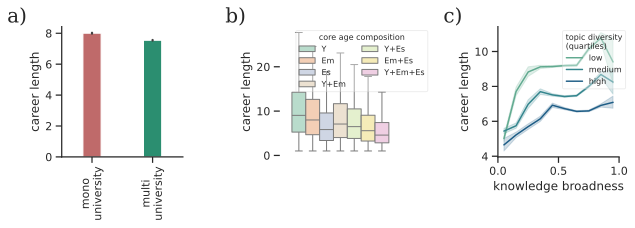

In [1118]:
label_ff = 20;ff = 20;aa=10;bb=6;wspace_=.8;hspace_=.5;
fig = plt.figure(figsize=(aa, bb));
falph=.35
spec = gridspec.GridSpec(ncols=3, nrows=2,width_ratios=[1,1,1], wspace=wspace_,hspace=hspace_, height_ratios=[1,1])
custom_palette = ["#b3e2cd", "#fdcdac", "#cbd5e8",  "#f1e2cc","#e6f5c9", "#fff2ae", "#f4cae4",]
sns.set_style("ticks")
taxX=-.45

#____________________________________________

NUM_PAPERS=5
ax = fig.add_subplot(spec[3])

c5='career_length'
dfplot=pd.DataFrame()

for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
    A['']=A['unidiversities']==0   

    A['']=A[''].map({False:'multi\nuniversity',True:'mono\nuniversity'})
    dfplot=pd.concat([dfplot,A[['size','',c5]]])
sns.barplot(data=dfplot,x='',y=c5,width=.3,palette={'multi\nuniversity':'#1b9e77','mono\nuniversity':'indianred'},order=['mono\nuniversity','multi\nuniversity'])
sns.despine(ax=ax)
plt.ylabel('career length')
plt.xticks(rotation=90)
# plt.legend(loc='upper left', bbox_to_anchor=(.0, 1),fontsize=legendff,ncol=1)
ax.text(taxX, 1.0, 'a)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')

#____________________________________________
ax = fig.add_subplot(spec[4])

dfplot=pd.DataFrame()
c5='career_length'

for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]     
    X=pd.DataFrame(A.groupby(by=['age_composition'])[c5].mean())
    X['age_composition']=X.index
    dfplot=pd.concat([dfplot,A[['size','age_composition',c5]]])
#     print(X)  
agehueorder=['Y', 'Y+Em', 'Em','Y+Em+Es','Y+Es','Em+Es','Es']
agehueorder=['Y', 'Em','Es','Y+Em','Y+Es','Em+Es','Y+Em+Es']
sns.boxplot(data=dfplot,y=c5,hue='age_composition',showfliers=False,hue_order=agehueorder,palette=custom_palette)
# sns.violinplot(data=dfplot,y=c5,hue='age_composition',linewidth=.3,hue_order=agehueorder,palette=custom_palette)
plt.ylabel('career length')
sns.despine(ax=ax)
leg=plt.legend(loc='upper left', framealpha=falph,bbox_to_anchor=(.1, 1),ncol=2,prop={'size': legendfff-2})
leg.set_title('core age composition',prop={'size':legendfff-2})
ax.text(taxX, 1.0, 'b)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')
for spine in ["top", "left","right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
#hide tick labels
_ = ax.set_xticks([]) 
#________________________
#____________________________________________
ax = fig.add_subplot(spec[5])

dfplot=pd.DataFrame()
c5='career_length'

for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]  

    A['knowledgebroadness']=A['knowledgebroadness']/np.log2(19)
    dfplot=pd.concat([dfplot,A[['size','knowledgebroadness','corediversity',c5]]])


from scipy.stats import spearmanr

df = dfplot[(dfplot['knowledgebroadness']+dfplot['corediversity'])>0].reset_index()
# df = dfplot.reset_index()
# Create categories for knowledgebroadness
L=10;L2=3
# df['knowledgebroadness_'] = pd.cut(df['knowledgebroadness'], L, labels=['Q'+str(i) for i in range(1,L+1)])
df['knowledgebroadness_'] = pd.cut(df['knowledgebroadness'], L, labels=[(i-0.5)/L for i in range(1,L+1)])
df['corediversity_'] = pd.qcut(df['corediversity'], L2, labels=['low','medium','high'])
# df['corediversity_'] = pd.qcut(df['corediversity'], L2, labels==[i for i in range(1,L2+1)])
# labels = 'Low', 'Medium', 'High'
# df['labels'] = pd.qcut(df['x'], len(labels), labels=labels)

# ax=sns.boxplot(x='knowledgebroadness_', y=c5,hue='corediversity_' ,data=df,showfliers=False)
# ax=sns.boxplot(x='corediversity_', y=c5,hue='knowledgebroadness_' ,data=df,showfliers=False)
ax=sns.lineplot(x='knowledgebroadness_', y=c5,hue='corediversity_' ,data=df,palette=sns.color_palette("crest",L2))
# sns.boxplot(data=dfplot,y=c5,hue='age_composition',showfliers=False,hue_order=agehueorder,palette=custom_palette)

sns.despine(ax=ax)
plt.ylabel('career length')
plt.xlabel('knowledge broadness')
plt.xticks([0,.5,1])
leg=plt.legend(title='diversity\n(quartiles)',framealpha=falph,loc= 'upper left', bbox_to_anchor=(.5, 1),prop={'size': legendfff-2},ncol=1)
leg.set_title('topic diversity\n(quartiles)',prop={'size': legendfff-2})
# plt.legend(loc='upper left', bbox_to_anchor=(.9, 1),fontsize=legendff,ncol=1)
ax.text(taxX, 1.0, 'c)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')

plt.tight_layout()
plt.savefig('TeamsFigSI2.svg', dpi=300, bbox_inches="tight");
plt.savefig('TeamsFigSI2.png', dpi=300, bbox_inches="tight");
plt.savefig('TeamsFigSI2.pdf', dpi=300, bbox_inches="tight");

### SI exclusivity vs compositions

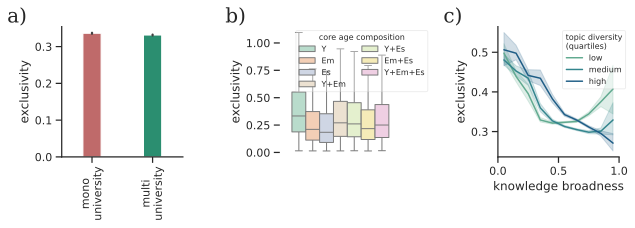

In [1119]:
label_ff = 20;ff = 20;aa=10;bb=6;wspace_=.8;hspace_=.5;
fig = plt.figure(figsize=(aa, bb));
falph=.35
spec = gridspec.GridSpec(ncols=3, nrows=2,width_ratios=[1,1,1], wspace=wspace_,hspace=hspace_, height_ratios=[1,1])
custom_palette = ["#b3e2cd", "#fdcdac", "#cbd5e8",  "#f1e2cc","#e6f5c9", "#fff2ae", "#f4cae4",]
sns.set_style("ticks")
taxX=-.45

#____________________________________________

NUM_PAPERS=5
ax = fig.add_subplot(spec[3])

c5='exclusivity'
dfplot=pd.DataFrame()

for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
    A['']=A['unidiversities']==0   

    A['']=A[''].map({False:'multi\nuniversity',True:'mono\nuniversity'})
    dfplot=pd.concat([dfplot,A[['size','',c5]]], ignore_index=True)
    
sns.barplot(data=dfplot,x='',y=c5,width=.3,palette={'multi\nuniversity':'#1b9e77','mono\nuniversity':'indianred'},order=['mono\nuniversity','multi\nuniversity'])
sns.despine(ax=ax)
plt.ylabel(c5)
plt.xticks(rotation=90)
# plt.legend(loc='upper left', bbox_to_anchor=(.0, 1),fontsize=legendff,ncol=1)
ax.text(taxX, 1.0, 'a)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')

#____________________________________________
ax = fig.add_subplot(spec[4])

dfplot=pd.DataFrame()

for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]     
    X=pd.DataFrame(A.groupby(by=['age_composition'])[c5].mean())
    X['age_composition']=X.index
    dfplot=pd.concat([dfplot,A[['size','age_composition',c5]]], ignore_index=True)
    
#     print(X)  
agehueorder=['Y', 'Y+Em', 'Em','Y+Em+Es','Y+Es','Em+Es','Es']
agehueorder=['Y', 'Em','Es','Y+Em','Y+Es','Em+Es','Y+Em+Es']
sns.boxplot(data=dfplot,y=c5,hue='age_composition',showfliers=False,hue_order=agehueorder,palette=custom_palette)
# sns.violinplot(data=dfplot,y=c5,hue='age_composition',linewidth=.3,hue_order=agehueorder,palette=custom_palette)
plt.ylabel(c5)
sns.despine(ax=ax)
leg=plt.legend(loc='upper left', framealpha=falph,bbox_to_anchor=(.1, 1),ncol=2,prop={'size': legendfff-2})
leg.set_title('core age composition',prop={'size':legendfff-2})
ax.text(taxX, 1.0, 'b)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')
for spine in ["top", "left","right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
#hide tick labels
_ = ax.set_xticks([]) 
#________________________
#____________________________________________
ax = fig.add_subplot(spec[5])

dfplot=pd.DataFrame()

for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]  

    A['knowledgebroadness']=A['knowledgebroadness']/np.log2(19)
    dfplot=pd.concat([dfplot,A[['size','knowledgebroadness','corediversity',c5]]])


from scipy.stats import spearmanr

df = dfplot[(dfplot['knowledgebroadness']+dfplot['corediversity'])>0].reset_index()
# df = dfplot.reset_index()
# Create categories for knowledgebroadness
L=10;L2=3
# df['knowledgebroadness_'] = pd.cut(df['knowledgebroadness'], L, labels=['Q'+str(i) for i in range(1,L+1)])
df['knowledgebroadness_'] = pd.cut(df['knowledgebroadness'], L, labels=[(i-0.5)/L for i in range(1,L+1)])
df['corediversity_'] = pd.qcut(df['corediversity'], L2, labels=['low','medium','high'])
# df['corediversity_'] = pd.qcut(df['corediversity'], L2, labels==[i for i in range(1,L2+1)])
# labels = 'Low', 'Medium', 'High'
# df['labels'] = pd.qcut(df['x'], len(labels), labels=labels)

# ax=sns.boxplot(x='knowledgebroadness_', y=c5,hue='corediversity_' ,data=df,showfliers=False)
# ax=sns.boxplot(x='corediversity_', y=c5,hue='knowledgebroadness_' ,data=df,showfliers=False)
ax=sns.lineplot(x='knowledgebroadness_', y=c5,hue='corediversity_' ,data=df,palette=sns.color_palette("crest",L2))
# sns.boxplot(data=dfplot,y=c5,hue='age_composition',showfliers=False,hue_order=agehueorder,palette=custom_palette)

sns.despine(ax=ax)
plt.ylabel(c5)
plt.xlabel('knowledge broadness')
plt.xticks([0,.5,1])
leg=plt.legend(title='diversity\n(quartiles)',framealpha=falph,loc= 'upper left', bbox_to_anchor=(.5, 1),prop={'size': legendfff-2},ncol=1)
leg.set_title('topic diversity\n(quartiles)',prop={'size': legendfff-2})
# plt.legend(loc='upper left', bbox_to_anchor=(.9, 1),fontsize=legendff,ncol=1)
ax.text(taxX, 1.0, 'c)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')

plt.tight_layout()
plt.savefig('TeamsFigSI3.svg', dpi=300, bbox_inches="tight");
plt.savefig('TeamsFigSI3.png', dpi=300, bbox_inches="tight");
plt.savefig('TeamsFigSI3.pdf', dpi=300, bbox_inches="tight");


### SI formation time vs composition

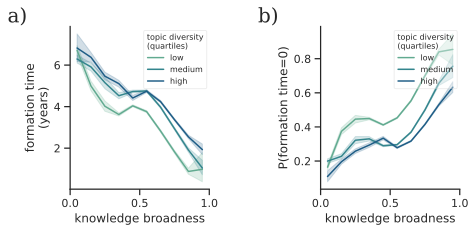

In [1120]:
label_ff = 20;ff = 20;aa=7;bb=3;wspace_=.8;hspace_=.5;
fig = plt.figure(figsize=(aa, bb));
falph=.35
spec = gridspec.GridSpec(ncols=2, nrows=1,width_ratios=[1,1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
custom_palette = ["#b3e2cd", "#fdcdac", "#cbd5e8",  "#f1e2cc","#e6f5c9", "#fff2ae", "#f4cae4",]
sns.set_style("ticks")
taxX=-.45

#____________________________________________

NUM_PAPERS=5
# 'time_taken_to_accumulatev2','is_formed_in_one_shot'

c5='is_formed_in_one_shot'

#____________________________________________
ax = fig.add_subplot(spec[1])

dfplot=pd.DataFrame()

for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]  

    A['knowledgebroadness']=A['knowledgebroadness']/np.log2(19)
    dfplot=pd.concat([dfplot,A[['size','knowledgebroadness','corediversity',c5]]])


from scipy.stats import spearmanr

df = dfplot[(dfplot['knowledgebroadness']+dfplot['corediversity'])>0].reset_index()
# df = dfplot.reset_index()
# Create categories for knowledgebroadness
L=10;L2=3
# df['knowledgebroadness_'] = pd.cut(df['knowledgebroadness'], L, labels=['Q'+str(i) for i in range(1,L+1)])
df['knowledgebroadness_'] = pd.cut(df['knowledgebroadness'], L, labels=[(i-0.5)/L for i in range(1,L+1)])
df['corediversity_'] = pd.qcut(df['corediversity'], L2, labels=['low','medium','high'])
# df['corediversity_'] = pd.qcut(df['corediversity'], L2, labels==[i for i in range(1,L2+1)])
# labels = 'Low', 'Medium', 'High'
# df['labels'] = pd.qcut(df['x'], len(labels), labels=labels)

# ax=sns.boxplot(x='knowledgebroadness_', y=c5,hue='corediversity_' ,data=df,showfliers=False)
# ax=sns.boxplot(x='corediversity_', y=c5,hue='knowledgebroadness_' ,data=df,showfliers=False)
ax=sns.lineplot(x='knowledgebroadness_', y=c5,hue='corediversity_' ,data=df,palette=sns.color_palette("crest",L2))
# sns.boxplot(data=dfplot,y=c5,hue='age_composition',showfliers=False,hue_order=agehueorder,palette=custom_palette)

sns.despine(ax=ax)
plt.ylabel('P(formation time=0)')
plt.xlabel('knowledge broadness')
plt.xticks([0,.5,1])
leg=plt.legend(title='diversity\n(quartiles)',framealpha=falph,loc= 'upper left', bbox_to_anchor=(.5, 1),prop={'size': legendfff-2},ncol=1)
leg.set_title('topic diversity\n(quartiles)',prop={'size': legendfff-2})
# plt.legend(loc='upper left', bbox_to_anchor=(.9, 1),fontsize=legendff,ncol=1)
ax.text(taxX, 1.0, 'b)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')
#____________________________________________
c5='time_taken_to_accumulatev2'

ax = fig.add_subplot(spec[0])

dfplot=pd.DataFrame()

for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]  

    A['knowledgebroadness']=A['knowledgebroadness']/np.log2(19)
    dfplot=pd.concat([dfplot,A[['size','knowledgebroadness','corediversity',c5]]])


from scipy.stats import spearmanr

df = dfplot[(dfplot['knowledgebroadness']+dfplot['corediversity'])>0].reset_index()
# df = dfplot.reset_index()
# Create categories for knowledgebroadness
L=10;L2=3
# df['knowledgebroadness_'] = pd.cut(df['knowledgebroadness'], L, labels=['Q'+str(i) for i in range(1,L+1)])
df['knowledgebroadness_'] = pd.cut(df['knowledgebroadness'], L, labels=[(i-0.5)/L for i in range(1,L+1)])
df['corediversity_'] = pd.qcut(df['corediversity'], L2, labels=['low','medium','high'])
# df['corediversity_'] = pd.qcut(df['corediversity'], L2, labels==[i for i in range(1,L2+1)])
# labels = 'Low', 'Medium', 'High'
# df['labels'] = pd.qcut(df['x'], len(labels), labels=labels)

# ax=sns.boxplot(x='knowledgebroadness_', y=c5,hue='corediversity_' ,data=df,showfliers=False)
# ax=sns.boxplot(x='corediversity_', y=c5,hue='knowledgebroadness_' ,data=df,showfliers=False)
ax=sns.lineplot(x='knowledgebroadness_', y=c5,hue='corediversity_' ,data=df,palette=sns.color_palette("crest",L2))
# sns.boxplot(data=dfplot,y=c5,hue='age_composition',showfliers=False,hue_order=agehueorder,palette=custom_palette)

sns.despine(ax=ax)
plt.ylabel('formation time\n(years)')
plt.xlabel('knowledge broadness')
plt.xticks([0,.5,1])
leg=plt.legend(title='diversity\n(quartiles)',framealpha=falph,loc= 'upper left', bbox_to_anchor=(.5, 1),prop={'size': legendfff-2},ncol=1)
leg.set_title('topic diversity\n(quartiles)',prop={'size': legendfff-2})
# plt.legend(loc='upper left', bbox_to_anchor=(.9, 1),fontsize=legendff,ncol=1)
ax.text(taxX, 1.0, 'a)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')

plt.tight_layout()
plt.savefig('TeamsFigSI4.svg', dpi=300, bbox_inches="tight");
plt.savefig('TeamsFigSI4.png', dpi=300, bbox_inches="tight");
plt.savefig('TeamsFigSI4.pdf', dpi=300, bbox_inches="tight");


                       size  time_taken_to_accumulatev2
                                                       
mono\nuniversity   2.966995                    3.849628
multi\nuniversity  3.078436                    4.047323


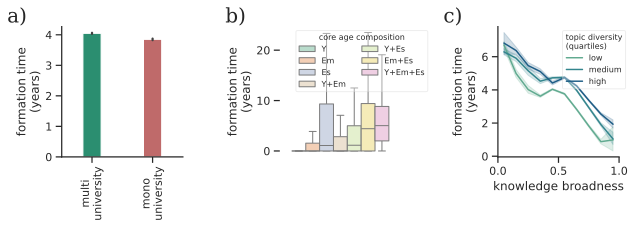

In [1121]:
label_ff = 20;ff = 20;aa=10;bb=6;wspace_=.8;hspace_=.5;
fig = plt.figure(figsize=(aa, bb));
falph=.35
spec = gridspec.GridSpec(ncols=3, nrows=2,width_ratios=[1,1,1], wspace=wspace_,hspace=hspace_, height_ratios=[1,1])
custom_palette = ["#b3e2cd", "#fdcdac", "#cbd5e8",  "#f1e2cc","#e6f5c9", "#fff2ae", "#f4cae4",]
sns.set_style("ticks")
taxX=-.45

#____________________________________________

NUM_PAPERS=5
ax = fig.add_subplot(spec[3])

c5='time_taken_to_accumulatev2'
c5_label='formation time\n(years)'
dfplot=pd.DataFrame()

for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
    A['']=A['unidiversities']==0   

    A['']=A[''].map({False:'multi\nuniversity',True:'mono\nuniversity'})
    dfplot=pd.concat([dfplot,A[['size','',c5]]], ignore_index=True)
    
# sns.barplot(data=dfplot,x='',y=c5,width=.3,palette={'multi\nuniversity':'#1b9e77','mono\nuniversity':'indianred'})
sns.barplot(data=dfplot,x='',y=c5,width=.3,palette={'multi\nuniversity':'#1b9e77','mono\nuniversity':'indianred'})
sns.despine(ax=ax)
plt.ylabel(c5_label)
plt.xticks(rotation=90)
# plt.legend(loc='upper left', bbox_to_anchor=(.0, 1),fontsize=legendff,ncol=1)
ax.text(taxX, 1.0, 'a)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')
print(dfplot.groupby(by='').mean())
#____________________________________________
ax = fig.add_subplot(spec[4])

dfplot=pd.DataFrame()

for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]     
    X=pd.DataFrame(A.groupby(by=['age_composition'])[c5].mean())
    X['age_composition']=X.index
    dfplot=pd.concat([dfplot,A[['size','age_composition',c5]]], ignore_index=True)
    
#     print(X)  
agehueorder=['Y', 'Y+Em', 'Em','Y+Em+Es','Y+Es','Em+Es','Es']
agehueorder=['Y', 'Em','Es','Y+Em','Y+Es','Em+Es','Y+Em+Es']
sns.boxplot(data=dfplot,y=c5,hue='age_composition',showfliers=False,hue_order=agehueorder,palette=custom_palette)
# sns.violinplot(data=dfplot,y=c5,hue='age_composition',linewidth=.3,hue_order=agehueorder,palette=custom_palette)
plt.ylabel(c5_label)
sns.despine(ax=ax)
leg=plt.legend(loc='upper left', framealpha=falph,bbox_to_anchor=(.1, 1),ncol=2,prop={'size': legendfff-2})
leg.set_title('core age composition',prop={'size':legendfff-2})
ax.text(taxX, 1.0, 'b)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')
for spine in ["top", "left","right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
#hide tick labels
_ = ax.set_xticks([]) 
#________________________
#____________________________________________
ax = fig.add_subplot(spec[5])

dfplot=pd.DataFrame()

for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]  

    A['knowledgebroadness']=A['knowledgebroadness']/np.log2(19)
    dfplot=pd.concat([dfplot,A[['size','knowledgebroadness','corediversity',c5]]])


from scipy.stats import spearmanr

df = dfplot[(dfplot['knowledgebroadness']+dfplot['corediversity'])>0].reset_index()
# df = dfplot.reset_index()
# Create categories for knowledgebroadness
L=10;L2=3
# df['knowledgebroadness_'] = pd.cut(df['knowledgebroadness'], L, labels=['Q'+str(i) for i in range(1,L+1)])
df['knowledgebroadness_'] = pd.cut(df['knowledgebroadness'], L, labels=[(i-0.5)/L for i in range(1,L+1)])
df['corediversity_'] = pd.qcut(df['corediversity'], L2, labels=['low','medium','high'])
# df['corediversity_'] = pd.qcut(df['corediversity'], L2, labels==[i for i in range(1,L2+1)])
# labels = 'Low', 'Medium', 'High'
# df['labels'] = pd.qcut(df['x'], len(labels), labels=labels)

# ax=sns.boxplot(x='knowledgebroadness_', y=c5,hue='corediversity_' ,data=df,showfliers=False)
# ax=sns.boxplot(x='corediversity_', y=c5,hue='knowledgebroadness_' ,data=df,showfliers=False)
ax=sns.lineplot(x='knowledgebroadness_', y=c5,hue='corediversity_' ,data=df,palette=sns.color_palette("crest",L2))
# sns.boxplot(data=dfplot,y=c5,hue='age_composition',showfliers=False,hue_order=agehueorder,palette=custom_palette)

sns.despine(ax=ax)
plt.ylabel(c5_label)
plt.xlabel('knowledge broadness')
plt.xticks([0,.5,1])
leg=plt.legend(title='diversity\n(quartiles)',framealpha=falph,loc= 'upper left', bbox_to_anchor=(.5, 1),prop={'size': legendfff-2},ncol=1)
leg.set_title('topic diversity\n(quartiles)',prop={'size': legendfff-2})
# plt.legend(loc='upper left', bbox_to_anchor=(.9, 1),fontsize=legendff,ncol=1)
ax.text(taxX, 1.0, 'c)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')

plt.tight_layout()
plt.savefig('TeamsFigSI4.svg', dpi=300, bbox_inches="tight");
plt.savefig('TeamsFigSI4.png', dpi=300, bbox_inches="tight");
plt.savefig('TeamsFigSI4.pdf', dpi=300, bbox_inches="tight");


# SI : Noncore members Demographics

In [1104]:
import warnings
warnings.filterwarnings("ignore")

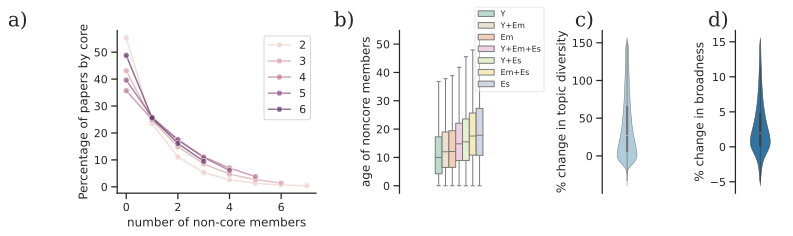

In [1122]:

label_ff = 20;ff = 20;aa=12;bb=3;wspace_=.8;hspace_=.5;
fig = plt.figure(figsize=(aa, bb));
wviolin=.4;lw=.5
falph=.35
spec = gridspec.GridSpec(ncols=4, nrows=1,width_ratios=[2,1.2,.5,.5], wspace=wspace_,hspace=hspace_, height_ratios=[1])
custom_palette = ["#b3e2cd", "#fdcdac", "#cbd5e8",  "#f1e2cc","#e6f5c9", "#fff2ae", "#f4cae4",]
sns.set_style("ticks");
taxX=-.55

#____________________________________________
sns.set_style("ticks");

from collections import Counter
import collections
Y0=[]
dict_noncore={}
for gsize in range(2,maxSS):
    with open(path_career+'significant_cores(num_noncore)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        num_noncore=pickle.load(f)
    X=collections.OrderedDict(sorted(Counter(num_noncore).items()))
    Y={x:round(100*X[x]/sum(X.values()),1) for x in X.keys()}
    dict_noncore[gsize]=Y
    Y0.append(Y[0])
    
    
df=pd.DataFrame(dict_noncore)
df=df.T
df.reset_index(inplace=True)
df.rename(columns={'index': 'Team Size'}, inplace=True)
df_long_diff=df.melt(id_vars='Team Size', var_name='number of non-core members', value_name='Percentage of papers by core')
df_long_diff

# Plotting
sns.set_style("ticks");
# plt.figure(figsize=(10, 6))

# Plot each curve
markers=['s','.','o']
ax = fig.add_subplot(spec[0])

for x in range(2,maxS):
    df_=df_long_diff[df_long_diff['Team Size']==x]
#     ax=sns.barplot(,hue='number of non-core members',data=df_)
    ax=sns.lineplot(x='number of non-core members', y='Percentage of papers by core', data=df_,marker='o',label=x,color=core_colors_dict[x],markers=True,dashes=False,alpha=.7)
# ax.set_xticks([x for x in range(2,maxSS)])
sns.despine(ax=ax)

ax.text(taxX, 1.0, 'a)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')


#____________________________________________
import scipy
dfplot=pd.DataFrame()
ax = fig.add_subplot(spec[1])

for gsize in range(2,maxSS):

    with open(path_career+'significant_cores(meanages)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        meanAgesCore=pickle.load(f) 
    with open(path_career+'significant_cores(meanagesnoncore)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        meanAgesNoncore=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f)     
    
    a=np.array([meanAgesNoncore[I[n]] for n in range(len(I)-1)])
    b=np.array([meanAgesCore[I[n]] for n in range(len(I)-1)])
        
#     x=meanAgesNoncore-meanAgesCore
    x=a
#     x=a
    x[x>MAX_AGE]=np.nan
#     x[x<-40]=np.nan
    significant_cores3[gsize]['agegap_core_noncore']=x
    dfplot=pd.concat(  [dfplot,significant_cores3[gsize][['agegap_core_noncore','age_composition']]])

custom_palette = np.array(["#b3e2cd", "#fdcdac", "#cbd5e8",  "#f1e2cc","#e6f5c9", "#fff2ae", "#f4cae4",])
agehueorder_fig2=np.array(['Y', 'Em','Es','Y+Em','Y+Es','Em+Es','Y+Em+Es'])
agehueorder=np.array(['Y', 'Y+Em', 'Em','Y+Em+Es','Y+Es','Em+Es','Es'])
def find_resorting_index(list1, list2):
    # Create a dictionary to hold the indices of elements in list2
    index_map = {value: index for index, value in enumerate(list2)}
    # Create a list of indices from list1 according to their position in list2
    resorting_index = [index_map[value] for value in list1]
    
    return resorting_index

resorting_index = find_resorting_index( agehueorder,agehueorder_fig2)
resorting_index

ax=sns.boxplot(data=dfplot.dropna(),y="agegap_core_noncore",hue='age_composition',width=.4,showfliers=False,palette=custom_palette[resorting_index],hue_order=agehueorder);
# ax=sns.violinplot(data=dfplot.dropna(),x="agegap_core_noncore",hue='age_composition',hue_order=map_age_composition.values(),palette=custom_palette);

sns.despine(ax=ax)
plt.ylabel(r'age of noncore members')
plt.xlabel(r'')
# plt.legend(bbox_to_anchor=[.1,1],fontsize=ff-12);   
plt.legend(fontsize=ff-12,framealpha=.45,bbox_to_anchor=(.6, .6));   
for spine in ["top", "right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
#hide tick labels
_ = ax.set_xticks([]) 
ax.text(taxX, 1.0, 'b)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')

#____________________________________________
ax = fig.add_subplot(spec[2]);
dfplot=pd.DataFrame()
pd.options.mode.chained_assignment = None  # default='warn'

for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
    A=A[(A['corediversity']>0)&(A['knowledgebroadness']>0)]
    A['% change in topic diversity']=100*np.divide(A['corediversitywNonCore_PerNonCoreAuth'],A['corediversity'])
    A['% change in broadness']=100*np.divide(A['knowledgebroadnesswNonCore_PerNonCoreAuth'],A['knowledgebroadness'])
    A=A[['% change in topic diversity','% change in broadness']]
    dfplot=pd.concat([dfplot,A])
# % change in topic diversity
# % change in broadness
df1=dfplot[dfplot["% change in topic diversity"]<150]
df1.reset_index(inplace=True)

sns.violinplot(data=df1,y=df1['% change in topic diversity'],width=wviolin,linewidth=lw,palette=['#a6cee3','#7570b3'])
# sns.boxplot(data=df1,y='% change in topic diversity',width=.3,showfliers=False,palette=['#a6cee3'])
# sns.histplot(dfplot['% change in topic diversity'],width=.3,palette=['#1b9e77','#7570b3'])
sns.despine(ax=ax)
# plt.ylabel('')
plt.xticks(rotation=90)
for spine in ["top", "right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
#hide tick labels
_ = ax.set_xticks([]) 

# plt.legend(loc='upper left', bbox_to_anchor=(.0, 1),fontsize=legendff,ncol=1)
ax.text(taxX, 1.0, 'c)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')

#____________________________________________

ax = fig.add_subplot(spec[3])
df1=dfplot[(dfplot["% change in broadness"]<15)&(dfplot["% change in broadness"]>-5)]
df1.reset_index(inplace=True)
# sns.boxplot(data=df1,y='% change in broadness',width=.3,showfliers=False,palette=['#1f78b4'])
sns.violinplot(data=df1,y='% change in broadness',width=wviolin,linewidth=lw,palette=['#1f78b4'])

# sns.histplot(dfplot['% change in topic diversity'],width=.3,palette=['#1b9e77','#7570b3'])
sns.despine(ax=ax)
# plt.ylabel('')
plt.xticks(rotation=90);
# hide lines around chart
for spine in ["top", "right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
#hide tick labels
_ = ax.set_xticks([]) 
    
ax.text(taxX, 1.0, 'd)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif');
plt.tight_layout()
plt.savefig('TeamsFigSI8.svg', dpi=300, bbox_inches="tight");
plt.savefig('TeamsFigSI8.png', dpi=300, bbox_inches="tight");
plt.savefig('TeamsFigSI8.pdf', dpi=300, bbox_inches="tight");

In [172]:
dict_noncore # number of non-core members

{2: {0: 55.3, 1: 23.4, 2: 11.1, 3: 5.3, 4: 2.6, 5: 1.3, 6: 0.7, 7: 0.4},
 3: {0: 43.1, 1: 24.7, 2: 14.9, 3: 8.5, 4: 4.7, 5: 2.7, 6: 1.4},
 4: {0: 35.7, 1: 25.0, 2: 17.4, 3: 11.1, 4: 7.0, 5: 3.8},
 5: {0: 39.6, 1: 25.9, 2: 17.5, 3: 10.9, 4: 6.1},
 6: {0: 48.8, 1: 25.6, 2: 16.1, 3: 9.5}}

In [182]:
round(np.mean([dict_noncore[g][0] for g in dict_noncore.keys()]),1)

44.5

Across coresizes, more than 40 % of papers by cores are written exclusively by the core with no additional members. Moreover, 35-40 % of papers have 1-2 non-core members, and less than 20 % of papers have more than 2.


### non core : contribution
change to violin plot

In [973]:
# fig = plt.figure(figsize=(4,1))
# for gsize in range(3,5):
#     x=np.array(impact_withnoncore[gsize])
#     y=np.array(impact_onlycore[gsize])
#     ind=np.where((~np.isnan(x))&  (~np.isnan(y))&  (y<3) &(x<3))[0]
#     X=100*(x[ind] -y[ind])/(x[ind] +y[ind])
    
# # plt.hist(x[ind] -y[ind],bins=50);
# plt.hist(x[ind] ,bins=50,alpha=.4,label='with non core',color='#99d8c9');
# plt.hist(y[ind] ,bins=50,alpha=.4,label='core only',color='#2ca25f');
# plt.legend();

### SI impact: only core vs with non-core members  

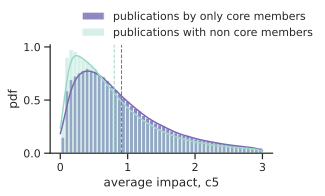

In [1106]:

label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.8;hspace_=.5;
fig = plt.figure(figsize=(aa, bb));
wviolin=.4;lw=.5
falph=.35
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
custom_palette = ["#b3e2cd", "#fdcdac", "#cbd5e8",  "#f1e2cc","#e6f5c9", "#fff2ae", "#f4cae4",]
sns.set_style("ticks");
taxX=-.55
from scipy.stats import gaussian_kde

#____________________________________________
sns.set_style("ticks");

ax = fig.add_subplot(spec[0])
X=[]
Y=[]
for gsize in range(2,maxSS):
    x=np.array(impact_withnoncore[gsize])
    y=np.array(impact_onlycore[gsize])
    ind=np.where((~np.isnan(x))&  (~np.isnan(y))&  (y<3) &(x<3))[0]
#     X=100*(x[ind] -y[ind])/(x[ind] +y[ind])
    X.append(x[ind])
    Y.append(y[ind])
X=np.concatenate(X)
Y=np.concatenate(Y)
# plt.hist(x[ind] -y[ind],bins=50);
plt.hist(Y ,bins=50,alpha=.8,density=True,label='publications by only core members',color='#756bb1');
plt.axvline(Y.mean(), color='#756bb1', linestyle='dashed', linewidth=1)
data=Y;density = gaussian_kde(data);xs = np.linspace(0,3,100)
density.covariance_factor = lambda : .15;density._compute_covariance();plt.plot(xs,density(xs),color='#756bb1')


plt.hist(X ,bins=50,alpha=.4,density=True,label='publications with non core members',color='#99d8c9');
plt.axvline(X.mean(), color='#99d8c9', linestyle='dashed', linewidth=1)
data=X;density = gaussian_kde(data);xs = np.linspace(0,3,100)
density.covariance_factor = lambda : .12;density._compute_covariance();plt.plot(xs,density(xs),color='#99d8c9')

sns.despine(ax=ax)
plt.xlabel('average impact, c5');plt.ylabel('pdf');
sns.despine(ax=ax)
plt.legend(bbox_to_anchor=(.1, .97), title='',framealpha=.0)


plt.tight_layout()
plt.savefig('TeamsFigSI9.svg', dpi=300, bbox_inches="tight");
plt.savefig('TeamsFigSI9.png', dpi=300, bbox_inches="tight");
plt.savefig('TeamsFigSI9.pdf', dpi=300, bbox_inches="tight");

In [844]:
np.nanmean(x[ind])

0.9511979604413384

In [845]:
np.nanmean(y[ind])

1.0711873165584398

# Correlation check pandas , all columns

In [762]:

for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
    A=A[(A['corediversity']>0)&(A['knowledgebroadness']>0)]
    A['% change in topic diversity']=100*np.divide(A['corediversitywNonCore_PerNonCoreAuth'],A['corediversity'])
    A['% change in broadness']=100*np.divide(A['knowledgebroadnesswNonCore_PerNonCoreAuth'],A['knowledgebroadness'])
#     A=A[['% change in topic diversity','% change in broadness']]
    break

In [768]:
# A=A[['pvalue', 'w', 'ni', 'N', 'size', 'first_paper_pubyear',
#        'last_paper_pubyear', 'is_formed_in_one_shot',
#        'c5_av', 'c5_half1', 'c5_half2', 'c5_first', 'work_counts_UNION',
#        'exclusivity', 'corediversity', 'monodisciplinarity',
#        'knowledgebroadness', 'corediversitywNonCore',
#        'knowledgebroadnesswNonCore', 'geodiversities_countries',
#        'geodiversities_continents', 'unidiversities', 'uniMinSpanningAffilSet',
#        'persistance_time', 'frac_young', 'frac_midage', 'frac_oldage',
#        'age_composition', 'AgeDev', 'MaxAgeGap', 'MeanAge',
#        'time_taken_to_accumulatev2', 'career_length', 'production_rate',
#        'age_noncore', 'RES_FILTER', 'corediversitywNonCore_PerNonCoreAuth',
#        'knowledgebroadnesswNonCore_PerNonCoreAuth', 'agegap_core_noncore',
#        'w2018', 'impact_InCorevsOut', 'corelitP', 'corelitD', 'corelitB',
#        '% change in topic diversity', '% change in broadness']]
X=A[['first_paper_pubyear','last_paper_pubyear', 'is_formed_in_one_shot',
       'c5_av', 'work_counts_UNION',
       'exclusivity', 'corediversity', 'monodisciplinarity',
       'knowledgebroadness',  'geodiversities_countries', 
       'geodiversities_continents', 'unidiversities', 'uniMinSpanningAffilSet',
       'persistance_time', 'frac_young', 'frac_midage', 'frac_oldage',
        'AgeDev', 'MaxAgeGap', 'MeanAge',
       'time_taken_to_accumulatev2','career_length', 'production_rate',
       'age_noncore', 'RES_FILTER',  'agegap_core_noncore',
       'w2018', 'impact_InCorevsOut', 'corelitP', 'corelitD', 'corelitB',
       '% change in topic diversity', '% change in broadness']]
Z=X.corr(method='spearman', min_periods=1, numeric_only=False)

In [769]:
Z

first_paper_pubyear  last_paper_pubyear  \
first_paper_pubyear                    1.000000            0.803418   
last_paper_pubyear                     0.803418            1.000000   
is_formed_in_one_shot                       NaN                 NaN   
c5_av                                  0.133136            0.165503   
work_counts_UNION                     -0.053783           -0.027533   
exclusivity                            0.036304            0.152565   
corediversity                         -0.012046           -0.116219   
monodisciplinarity                    -0.226006           -0.185317   
knowledgebroadness                     0.215003            0.164906   
geodiversities_countries               0.134997            0.140403   
geodiversities_continents              0.106390            0.114644   
unidiversities                         0.196424            0.208930   
uniMinSpanningAffilSet                 0.078290            0.079228   
persistance_time                      -0.399765            0.133371   
frac_young                             0.001579            0.081579   
frac_midage                            0.015435            0.019002   
frac_oldage                            0.028049           -0.040926   
AgeDev                                 0.050669            0.034290   
MaxAgeGap                              0.050670            0.034290   
MeanAge                                0.050668            0.034288   
time_taken_to_accumulatev2                  NaN                 NaN   
career_length                         -0.399765            0.133371   
production_rate                        0.392949            0.039605   
age_noncore                            0.069902            0.157636   
RES_FILTER                                  NaN                 NaN   
agegap_core_noncore                    0.106050            0.134550   
w2018                                 -0.304325           -0.112099   
impact_InCorevsOut                     0.007450            0.025861   
corelitP                               0.269240            0.248741   
corelitD                               0.181848            0.272632   
corelitB                               0.136874            0.199306   
% change in diversity                 -0.001207            0.089828   
% change in broadness                 -0.054734           -0.012376   

                            is_formed_in_one_shot     c5_av  \
first_paper_pubyear                           NaN  0.133136   
last_paper_pubyear                            NaN  0.165503   
is_formed_in_one_shot                         NaN       NaN   
c5_av                                         NaN  1.000000   
work_counts_UNION                             NaN  0.122792   
exclusivity                                   NaN -0.089181   
corediversity                                 NaN -0.202176   
monodisciplinarity                            NaN -0.111776   
knowledgebroadness                            NaN  0.051801   
geodiversities_countries                      NaN  0.124738   
geodiversities_continents                     NaN  0.109310   
unidiversities                                NaN  0.110354   
uniMinSpanningAffilSet                        NaN -0.004816   
persistance_time                              NaN  0.026189   
frac_young                                    NaN  0.045121   
frac_midage                                   NaN  0.019932   
frac_oldage                                   NaN -0.020708   
AgeDev                                        NaN  0.062849   
MaxAgeGap                                     NaN  0.062845   
MeanAge                                       NaN  0.062842   
time_taken_to_accumulatev2                    NaN       NaN   
career_length                                 NaN  0.026189   
production_rate                               NaN -0.003937   
age_noncore                                   NaN  0.024363   
RES_FILTER                            

In [169]:
X=np.array(dfplot["% change in topic diversity"])
X=X[~np.isnan(X) & ~np.isinf(X)]
print('% core for which core diversity reduces-',round(100*np.sum(X<0)/len(X),1))
print('% core for which core diversity increases-',round(100*np.sum(X>0)/len(X),1))
X=np.array(dfplot["% change in broadness"])
X=X[~np.isnan(X) & ~np.isinf(X)]
print('% core for which knowledge broadness reduces-',round(100*np.sum(X<0)/len(X),1))
print('% core for which knowledge broadness increases-',round(100*np.sum(X>0)/len(X),1))


% core for which core diversity reduces- 12.3
% core for which core diversity increases- 87.7
% core for which knowledge broadness reduces- 23.3
% core for which knowledge broadness increases- 76.7


In [157]:
print('-,-,',round(100*dfplot[(dfplot["% change in topic diversity"]<0) & (dfplot["% change in broadness"]<0)].shape[0]/dfplot.dropna().shape[0],1))
print('-,+,',round(100*dfplot[(dfplot["% change in topic diversity"]<0) & (dfplot["% change in broadness"]>0)].shape[0]/dfplot.dropna().shape[0],1))
print('+,-,',round(100*dfplot[(dfplot["% change in topic diversity"]>0) & (dfplot["% change in broadness"]<0)].shape[0]/dfplot.dropna().shape[0],1))
print('+,+,',round(100*dfplot[(dfplot["% change in topic diversity"]>0) & (dfplot["% change in broadness"]>0)].shape[0]/dfplot.dropna().shape[0],1))

-,-, 8.0
-,+, 4.3
+,-, 15.3
+,+, 72.4


In [ ]:

label_ff = 20;ff = 20;aa=12;bb=3;wspace_=.8;hspace_=.5;
fig = plt.figure(figsize=(aa, bb));
wviolin=.4;lw=.5
falph=.35
spec = gridspec.GridSpec(ncols=4, nrows=1,width_ratios=[2,1.2,.5,.5], wspace=wspace_,hspace=hspace_, height_ratios=[1])
custom_palette = ["#b3e2cd", "#fdcdac", "#cbd5e8",  "#f1e2cc","#e6f5c9", "#fff2ae", "#f4cae4",]
sns.set_style("ticks");
taxX=-.55

#____________________________________________
sns.set_style("ticks");

from collections import Counter
import collections
Y0=[]
dict_noncore={}
for gsize in range(2,maxSS):
    with open(path_career+'significant_cores(num_noncore)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        num_noncore=pickle.load(f)
    X=collections.OrderedDict(sorted(Counter(num_noncore).items()))
    Y={x:round(100*X[x]/sum(X.values()),1) for x in X.keys()}
    dict_noncore[gsize]=Y
    Y0.append(Y[0])
    
    
df=pd.DataFrame(dict_noncore)
df=df.T
df.reset_index(inplace=True)
df.rename(columns={'index': 'Team Size'}, inplace=True)
df_long_diff=df.melt(id_vars='Team Size', var_name='number of non-core members', value_name='Percentage of papers by core')
df_long_diff

# Plotting
sns.set_style("ticks");
# plt.figure(figsize=(10, 6))

# Plot each curve
markers=['s','.','o']
ax = fig.add_subplot(spec[0])

for x in range(2,maxS):
    df_=df_long_diff[df_long_diff['Team Size']==x]
#     ax=sns.barplot(,hue='number of non-core members',data=df_)
    ax=sns.lineplot(x='number of non-core members', y='Percentage of papers by core', data=df_,marker='o',label=x,color=core_colors_dict[x],markers=True,dashes=False,alpha=.7)
# ax.set_xticks([x for x in range(2,maxSS)])
sns.despine(ax=ax)

ax.text(taxX, 1.0, 'a)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')


#____________________________________________
import scipy
dfplot=pd.DataFrame()
ax = fig.add_subplot(spec[1])

for gsize in range(2,maxSS):

    with open(path_career+'significant_cores(meanages)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        meanAgesCore=pickle.load(f) 
    with open(path_career+'significant_cores(meanagesnoncore)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        meanAgesNoncore=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f)     
    
    a=np.array([meanAgesNoncore[I[n]] for n in range(len(I)-1)])
    b=np.array([meanAgesCore[I[n]] for n in range(len(I)-1)])
        
#     x=meanAgesNoncore-meanAgesCore
    x=a
#     x=a
    x[x>MAX_AGE]=np.nan
#     x[x<-40]=np.nan
    significant_cores3[gsize]['agegap_core_noncore']=x
    dfplot=pd.concat(  [dfplot,significant_cores3[gsize][['agegap_core_noncore','age_composition']]])

custom_palette = np.array(["#b3e2cd", "#fdcdac", "#cbd5e8",  "#f1e2cc","#e6f5c9", "#fff2ae", "#f4cae4",])
agehueorder_fig2=np.array(['Y', 'Em','Es','Y+Em','Y+Es','Em+Es','Y+Em+Es'])
agehueorder=np.array(['Y', 'Y+Em', 'Em','Y+Em+Es','Y+Es','Em+Es','Es'])
def find_resorting_index(list1, list2):
    # Create a dictionary to hold the indices of elements in list2
    index_map = {value: index for index, value in enumerate(list2)}
    # Create a list of indices from list1 according to their position in list2
    resorting_index = [index_map[value] for value in list1]
    
    return resorting_index

resorting_index = find_resorting_index( agehueorder,agehueorder_fig2)
resorting_index

ax=sns.boxplot(data=dfplot.dropna(),y="agegap_core_noncore",hue='age_composition',width=.4,showfliers=False,palette=custom_palette[resorting_index],hue_order=agehueorder);
# ax=sns.violinplot(data=dfplot.dropna(),x="agegap_core_noncore",hue='age_composition',hue_order=map_age_composition.values(),palette=custom_palette);

sns.despine(ax=ax)
plt.ylabel(r'age of noncore members')
plt.xlabel(r'')
# plt.legend(bbox_to_anchor=[.1,1],fontsize=ff-12);   
plt.legend(fontsize=ff-12,framealpha=.45,bbox_to_anchor=(.6, .6));   
for spine in ["top", "right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
#hide tick labels
_ = ax.set_xticks([]) 
ax.text(taxX, 1.0, 'b)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')

#____________________________________________
ax = fig.add_subplot(spec[2]);
dfplot=pd.DataFrame()
pd.options.mode.chained_assignment = None  # default='warn'

for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]
    A=A[(A['corediversity']>0)&(A['knowledgebroadness']>0)]
    A['% change in topic diversity']=100*np.divide(A['corediversitywNonCore_PerNonCoreAuth'],A['corediversity'])
    A['% change in broadness']=100*np.divide(A['knowledgebroadnesswNonCore_PerNonCoreAuth'],A['knowledgebroadness'])
    A=A[['% change in topic diversity','% change in broadness']]
    dfplot=pd.concat([dfplot,A])
# % change in topic diversity
# % change in broadness
df1=dfplot[dfplot["% change in topic diversity"]<150]
df1.reset_index(inplace=True)

sns.violinplot(data=df1,y=df1['% change in topic diversity'],width=wviolin,linewidth=lw,palette=['#a6cee3','#7570b3'])
# sns.boxplot(data=df1,y='% change in topic diversity',width=.3,showfliers=False,palette=['#a6cee3'])
# sns.histplot(dfplot['% change in topic diversity'],width=.3,palette=['#1b9e77','#7570b3'])
sns.despine(ax=ax)
# plt.ylabel('')
plt.xticks(rotation=90)
for spine in ["top", "right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
#hide tick labels
_ = ax.set_xticks([]) 

# plt.legend(loc='upper left', bbox_to_anchor=(.0, 1),fontsize=legendff,ncol=1)
ax.text(taxX, 1.0, 'c)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')

#____________________________________________

ax = fig.add_subplot(spec[3])
df1=dfplot[(dfplot["% change in broadness"]<15)&(dfplot["% change in broadness"]>-5)]
df1.reset_index(inplace=True)
# sns.boxplot(data=df1,y='% change in broadness',width=.3,showfliers=False,palette=['#1f78b4'])
sns.violinplot(data=df1,y='% change in broadness',width=wviolin,linewidth=lw,palette=['#1f78b4'])

# sns.histplot(dfplot['% change in topic diversity'],width=.3,palette=['#1b9e77','#7570b3'])
sns.despine(ax=ax)
# plt.ylabel('')
plt.xticks(rotation=90);
# hide lines around chart
for spine in ["top", "right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
#hide tick labels
_ = ax.set_xticks([]) 
    
ax.text(taxX, 1.0, 'd)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif');
plt.tight_layout()
# plt.savefig('TeamsFig4.svg', dpi=300, bbox_inches="tight");
# plt.savefig('TeamsFig4.png', dpi=300, bbox_inches="tight");
# plt.savefig('TeamsFig4.pdf', dpi=300, bbox_inches="tight");

## comparing ages of core vs non-core


noncore members bring experience? higher average age than core?

In [184]:

# label_ff = 20;ff = 20;aa=8;bb=4;wspace_=.5;hspace_=.3;
# fig = plt.figure(figsize=(aa, bb));
# spec = gridspec.GridSpec(ncols=2, nrows=2,width_ratios=[1,1], wspace=wspace_,hspace=hspace_, height_ratios=[1,1])
# ax = fig.add_subplot(spec[0])
# sns.set_style('white')  # Set the style to 'whitegrid'
# dfplot=pd.DataFrame()
    
#     x=significant_cores3[gsize]['age_noncore']
    
    
#     x=x[~np.isnan(x)]    
#     print( round(100*np.sum(x>0)/len(x),1),' % of cores where non-core members are older on average')
#     print( round(np.mean(x[x>0]),1),' years older on average')
    
#     print( round(100*np.sum(x<0)/len(x),1),' % of cores where non-core members are younger on average')
#     print( round(np.mean(x[x<0]),1),' years younger on average')
    
    
#     A1=pd.DataFrame((x[x>0]))
#     A1.columns=['age']
#     A1['']='non-core are older'
#     B=pd.DataFrame((x[x<0]))
#     B.columns=['age']
#     B['']='non-core are younger'
#     A1=pd.concat([A1,B])

#     ax=sns.kdeplot(data=A1.dropna(),clip=[-20,20], x="age",label=''+str(gsize),linewidth=1);

    
# sns.despine(ax=ax)
# plt.legend(bbox_to_anchor=[1,1]);


In [370]:
c5='production_rate'
dfplot=pd.DataFrame()

for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]  

    A['knowledgebroadness']=A['knowledgebroadness']/np.log2(19)
    dfplot=pd.concat([dfplot,A[['size','knowledgebroadness','corediversity','c5_av',c5]]])


In [489]:
# from scipy import stats
# df=dfplot[(dfplot['knowledgebroadness']>.5)&(dfplot['knowledgebroadness']<.6)]
# X=np.array(df['production_rate'])
# Y=np.array(df['c5_av'])
# ind=np.where((~np.isnan(X))&(~np.isnan(Y))&(~np.isinf(X)))
# X=X[ind];Y=Y[ind];

# res1 = stats.spearmanr(X,Y)
# #     res2 = stats.spearmanr(x10,y10)
# print( res1)


In [597]:
dfplot.columns

Index(['group', 'pvalue', 'w', 'fdr', 'ni', 'N', 'size', 'first_paper_pubyear',
       'last_paper_pubyear', 'is_formed_in_one_shot',
       'https://docs.google.com/spreadsheets/d/1acXm1cho9grOSEz2Udk2AQaC4yPIiKDBsc9fKi-Ke0c/edit#gid=1281969688',
       'c5_av', 'c5_half1', 'c5_half2', 'c5_first', 'work_counts_UNION',
       'exclusivity', 'corediversity', 'monodisciplinarity',
       'knowledgebroadness', 'corediversitywNonCore',
       'knowledgebroadnesswNonCore', 'geodiversities_countries',
       'geodiversities_continents', 'unidiversities', 'uniMinSpanningAffilSet',
       'persistance_time', 'frac_young', 'frac_midage', 'frac_oldage',
       'age_composition', 'AgeDev', 'MaxAgeGap', 'MeanAge',
       'time_taken_to_accumulatev2', 'career_length', 'production_rate',
       'age_noncore', 'RES_FILTER', 'corediversitywNonCore_PerNonCoreAuth',
       'knowledgebroadnesswNonCore_PerNonCoreAuth', 'agegap_core_noncore',
       'w2018', 'impact_InCorevsOut', 'corelitP', 'corelitD', 'c

In [598]:
gsize=3
dfplot=significant_cores3[gsize]
X=np.array(dfplot[dfplot['size']==gsize]['w'])
Y=np.array(dfplot[dfplot['size']==gsize]['knowledgebroadness'])
ind=np.where((~np.isnan(X))&(~np.isnan(Y))&(~np.isinf(X)))
X=X[ind];Y=Y[ind];

res1 = stats.spearmanr(X,Y)
#     res2 = stats.spearmanr(x10,y10)
print(res1)



SpearmanrResult(correlation=-0.07935153766753565, pvalue=0.0)


In [595]:
gsize=3
dfplot=significant_cores3[gsize]
X=np.array(dfplot[dfplot['size']==gsize]['w'])
Y=np.array(dfplot[dfplot['size']==gsize]['exclusivity'])
ind=np.where((~np.isnan(X))&(~np.isnan(Y))&(~np.isinf(X)))
X=X[ind];Y=Y[ind];

res1 = stats.spearmanr(X,Y)
#     res2 = stats.spearmanr(x10,y10)
print(res1)



SpearmanrResult(correlation=0.11614438990346473, pvalue=0.0)


# SI productivity in first half career and second half career. 

## Exclusivity vs Impact within core to outside

In [539]:

dfplot=pd.DataFrame()

for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]  
    A=A[A['w2018']>10]  

    A['knowledgebroadness']=A['knowledgebroadness']/np.log2(19)
    dfplot=pd.concat([dfplot,A[['size','impact_InCorevsOut','exclusivity']]])
dfplot=dfplot.dropna()
dfplot
gsize=5
X=np.array(dfplot[dfplot['size']==gsize]['impact_InCorevsOut'])
Y=np.array(dfplot[dfplot['size']==gsize]['exclusivity'])
ind=np.where((~np.isnan(X))&(~np.isnan(Y))&(~np.isinf(X)))
X=X[ind];Y=Y[ind];

res1 = stats.spearmanr(X,Y)
#     res2 = stats.spearmanr(x10,y10)
print(res1)


dfplot['impact_InCorevsOut_'] = pd.qcut(dfplot['impact_InCorevsOut'], L, labels=[(i-0.5)/L for i in range(1,L+1)])
dfplot['exclusivity_'] = pd.qcut(dfplot['exclusivity'], L, labels=[(i-0.5)/L for i in range(1,L+1)])
# dfplot['exclusivity_'] = pd.qcut(dfplot['exclusivity'], L2, labels=['low','medium','high'])
# df['corediversity_'] = pd.qcut(df['cored uiversity'], L2, labels==[i for i in range(1,L2+1)])
# labels = 'Low', 'Medium', 'High'
# df['labels'] = pd.qcut(df['x'], len(labels), labels=labels)

# ax=sns.boxplot(x='knowledgebroadness_', y=c5,hue='corediversity_' ,data=df,showfliers=False)
# ax=sns.boxplot(x='corediversity_', y=c5,hue='knowledgebroadness_' ,data=df,showfliers=False)
ax=sns.lineplot(x='exclusivity_', y='impact_InCorevsOut_' ,data=dfplot,palette=sns.color_palette("crest",L2))
# sns.boxplot(data=dfplot,y=c5,hue='age_composition',showfliers=False,hue_order=agehueorder,palette=custom_palette)

sns.despine(ax=ax)

SpearmanrResult(correlation=-0.0222521866116221, pvalue=0.5759847645216111)


In [1026]:
# label_ff = 20;ff = 20;aa=10;bb=6;wspace_=.8;hspace_=.5;
# fig = plt.figure(figsize=(aa, bb));
# falph=.35
# spec = gridspec.GridSpec(ncols=3, nrows=2,width_ratios=[1,1,1], wspace=wspace_,hspace=hspace_, height_ratios=[1,1])
# custom_palette = ["#b3e2cd", "#fdcdac", "#cbd5e8",  "#f1e2cc","#e6f5c9", "#fff2ae", "#f4cae4",]
# sns.set_style("ticks")
# taxX=-.45

# #____________________________________________

# NUM_PAPERS=5
# ax = fig.add_subplot(spec[3])


# list_of=['group', 'pvalue', 'w', 'fdr', 'ni', 'N', 'size', 'first_paper_pubyear',
#        'last_paper_pubyear', 'is_formed_in_one_shot',
#        'c5_av', 'c5_half1', 'c5_half2', 'c5_first', 'work_counts_UNION',
#        'exclusivity', 'corediversity', 'monodisciplinarity',
#        'knowledgebroadness', 'corediversitywNonCore',
#        'knowledgebroadnesswNonCore', 'geodiversities_countries',
#        'geodiversities_continents', 'unidiversities', 'uniMinSpanningAffilSet',
#        'persistance_time', 'frac_young', 'frac_midage', 'frac_oldage',
#        'age_composition', 'AgeDev', 'MaxAgeGap', 'MeanAge',
#        'time_taken_to_accumulatev2', 'career_length', 'production_rate',
#        'age_noncore', 'RES_FILTER', 'corediversitywNonCore_PerNonCoreAuth',
#        'knowledgebroadnesswNonCore_PerNonCoreAuth', 'agegap_core_noncore',
#        'w2018', 'impact_InCorevsOut', 'corelitP', 'corelitD', 'corelitB']

# # 'time_taken_to_accumulatev2','is_formed_in_one_shot'
# c5='MaxAgeGap'
# dfplot=pd.DataFrame()

# for gsize in range(2,maxSS):
#     A=significant_cores3[gsize]
#     A=A[A['RES_FILTER']==True]
#     A['']=A['unidiversities']==0   

#     A['']=A[''].map({False:'multi\nuniversity',True:'mono\nuniversity'})
#     dfplot=pd.concat([dfplot,A[['size','',c5]]], ignore_index=True)
    
# sns.barplot(data=dfplot,x='',y=c5,width=.3,palette={'multi\nuniversity':'#1b9e77','mono\nuniversity':'indianred'},order=['mono\nuniversity','multi\nuniversity'])
# sns.despine(ax=ax)
# plt.ylabel(c5)
# plt.xticks(rotation=90)
# # plt.legend(loc='upper left', bbox_to_anchor=(.0, 1),fontsize=legendff,ncol=1)
# ax.text(taxX, 1.0, 'a)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')

# #____________________________________________
# ax = fig.add_subplot(spec[4])

# dfplot=pd.DataFrame()

# for gsize in range(2,maxSS):
#     A=significant_cores3[gsize]
#     A=A[A['RES_FILTER']==True]     
#     X=pd.DataFrame(A.groupby(by=['age_composition'])[c5].mean())
#     X['age_composition']=X.index
#     dfplot=pd.concat([dfplot,A[['size','age_composition',c5]]], ignore_index=True)
    
# #     print(X)  
# agehueorder=['Y', 'Y+Em', 'Em','Y+Em+Es','Y+Es','Em+Es','Es']
# agehueorder=['Y', 'Em','Es','Y+Em','Y+Es','Em+Es','Y+Em+Es']
# sns.boxplot(data=dfplot,y=c5,hue='age_composition',showfliers=False,hue_order=agehueorder,palette=custom_palette)
# # sns.violinplot(data=dfplot,y=c5,hue='age_composition',linewidth=.3,hue_order=agehueorder,palette=custom_palette)
# plt.ylabel(c5)
# sns.despine(ax=ax)
# leg=plt.legend(loc='upper left', framealpha=falph,bbox_to_anchor=(.1, 1),ncol=2,prop={'size': legendfff-2})
# leg.set_title('core age composition',prop={'size':legendfff-2})
# ax.text(taxX, 1.0, 'b)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')
# for spine in ["top", "left","right", "bottom"]:
#     _ = ax.spines[spine].set_visible(False)
# #hide tick labels
# _ = ax.set_xticks([]) 
# #________________________
# #____________________________________________
# ax = fig.add_subplot(spec[5])

# dfplot=pd.DataFrame()

# for gsize in range(2,maxSS):
#     A=significant_cores3[gsize]
#     A=A[A['RES_FILTER']==True]  

#     A['knowledgebroadness']=A['knowledgebroadness']/np.log2(19)
#     dfplot=pd.concat([dfplot,A[['size','knowledgebroadness','corediversity',c5]]])


# from scipy.stats import spearmanr

# df = dfplot[(dfplot['knowledgebroadness']+dfplot['corediversity'])>0].reset_index()
# # df = dfplot.reset_index()
# # Create categories for knowledgebroadness
# L=10;L2=3
# # df['knowledgebroadness_'] = pd.cut(df['knowledgebroadness'], L, labels=['Q'+str(i) for i in range(1,L+1)])
# df['knowledgebroadness_'] = pd.cut(df['knowledgebroadness'], L, labels=[(i-0.5)/L for i in range(1,L+1)])
# df['corediversity_'] = pd.qcut(df['corediversity'], L2, labels=['low','medium','high'])
# # df['corediversity_'] = pd.qcut(df['corediversity'], L2, labels==[i for i in range(1,L2+1)])
# # labels = 'Low', 'Medium', 'High'
# # df['labels'] = pd.qcut(df['x'], len(labels), labels=labels)

# # ax=sns.boxplot(x='knowledgebroadness_', y=c5,hue='corediversity_' ,data=df,showfliers=False)
# # ax=sns.boxplot(x='corediversity_', y=c5,hue='knowledgebroadness_' ,data=df,showfliers=False)
# ax=sns.lineplot(x='knowledgebroadness_', y=c5,hue='corediversity_' ,data=df,palette=sns.color_palette("crest",L2))
# # sns.boxplot(data=dfplot,y=c5,hue='age_composition',showfliers=False,hue_order=agehueorder,palette=custom_palette)

# sns.despine(ax=ax)
# plt.ylabel(c5)
# plt.xlabel('knowledge broadness')
# plt.xticks([0,.5,1])
# leg=plt.legend(title='diversity\n(quartiles)',framealpha=falph,loc= 'upper left', bbox_to_anchor=(.5, 1),prop={'size': legendfff-2},ncol=1)
# leg.set_title('topic diversity\n(quartiles)',prop={'size': legendfff-2})
# # plt.legend(loc='upper left', bbox_to_anchor=(.9, 1),fontsize=legendff,ncol=1)
# ax.text(taxX, 1.0, 'c)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')

# plt.tight_layout()

[1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005]

# Impact core only vs with noncore

In [842]:
# # #         impact_onlycore[gsize].append(np.mean(x[x>0]))
# # impact_withnoncore[gsize]
# # impact_onlycore[gsize]s
# import seaborn as sns
# import matplotlib
# dfplot=pd.DataFrame()
# for gsize in range(2,maxSS):
#     x=np.array(impact_withnoncore[gsize])
#     y=np.array(impact_onlycore[gsize])
#     ind=np.where((~np.isnan(x))&  (~np.isnan(y))&  (y<1) &(x<1))[0]
#     dfplot=pd.DataFrame([x[ind] ,y[ind]])
# dfplot=dfplot.T
# dfplot.columns=['impact with non-core members','impact with only core members']
# # sns.set_style('white')  # Set the style to 'whitegrid'
        
# # fig = plt.figure(figsize=(6,3))
# # kdeplot = sns.jointplot(x=dfplot['impact with only core members'],y=dfplot['impact with non-core members'],data=dfplot, kind="hex", color='black',norm=matplotlib.colors.LogNorm(),
# #                        height=5, ratio=3,marginal_kws=dict(bins=30))
# kdeplot = sns.jointplot(x=dfplot['impact with only core members'],y=dfplot['impact with non-core members'],data=dfplot, kind="hex", color='black',
#                        height=5, ratio=3,marginal_kws=dict(bins=30))


# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# x= x[ind].reshape(-1, 1)
# y =y[ind].reshape(-1, 1)
# regressor.fit(x, y)
# # Create the plot with a dashed line style
# a = range(0, 2)
# b = a

# plt.plot(a, b, linestyle='--', label='x = y')
# # regressor.fit(x, y)
# # y_pred = regressor.predict(x)
# # sns.lineplot(x=x[:, 0], y=y_pred[:, 0], color='white', label='Regression Line')


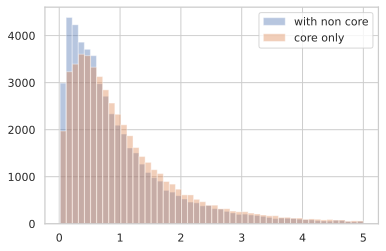

In [831]:
np.nanmean(significant_cores3[gsize]['impact_InCorevsOut'])

1.317829994183281

In [835]:
x=significant_cores3[gsize][significant_cores3[gsize]['impact_InCorevsOut']>1]['impact_InCorevsOut']
y=significant_cores3[gsize][significant_cores3[gsize]['impact_InCorevsOut']>-1]['impact_InCorevsOut']
len(x)/len(y)

0.43079858048370223

In [ ]:
# #         impact_onlycore[gsize].append(np.mean(x[x>0]))
# impact_withnoncore[gsize]
# impact_onlycore[gsize]
import seaborn as sns
import matplotlib
dfplot=pd.DataFrame()
for gsize in range(4,5):
    x=np.array(impact_withnoncore[gsize])
    y=np.array(impact_onlycore[gsize])
    ind=np.where((~np.isnan(x))&  (~np.isnan(y))&  (y<5) &(x<5))[0]
    dfplot=pd.DataFrame([x[ind] ,y[ind]])
dfplot=dfplot.T
dfplot.columns=['impact with non-core members','impact with only core members']
# sns.set_style('white')  # Set the style to 'whitegrid'
        
# fig = plt.figure(figsize=(6,3))
kdeplot = sns.jointplot(x=dfplot['impact with only core members'],y=dfplot['impact with non-core members'],data=dfplot, kind="hex", color='indianred',norm=matplotlib.colors.LogNorm(),
                       height=5, ratio=3,marginal_kws=dict(bins=30))


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
x= x[ind].reshape(-1, 1)
y =y[ind].reshape(-1, 1)
regressor.fit(x, y)
# Create the plot with a dashed line style
a = range(0, 2)
b = a

plt.plot(a, b, linestyle='--', label='x = y')
# regressor.fit(x, y)
# y_pred = regressor.predict(x)
# sns.lineplot(x=x[:, 0], y=y_pred[:, 0], color='white', label='Regression Line')


# 9. Cores by Decades

In [632]:
decades[itd]

2000

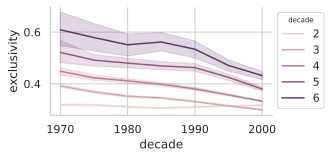

In [797]:
decades=[x for x in range(1970,2010,5)]

Q='exclusivity'

dfplot=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]  
    for itd in range(len(decades)-1):
        B=A[(A['first_paper_pubyear']>=decades[itd])&(A['first_paper_pubyear']<decades[itd]+10)]
        x=pd.DataFrame()
        x[Q]=list(B[Q])
        x['core size']=gsize
        x['decade']=decades[itd]
        dfplot=pd.concat([dfplot,x], ignore_index=True)
#     A[A['first_paper_pubyear']>1950]['first_paper_pubyear'].hist(bins=50)

label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

pal=['#ffffcc','#c2e699','#78c679','#31a354','#006837']
# ax=sns.boxplot(data=dfplot, x="core size", y='exclusivity',hue='decade',showfliers=False,palette=pal);
# ax=sns.barplot(data=dfplot, x="core size", y='exclusivity',hue='decade',palette=pal,errwidth=1.5);
ax=sns.lineplot(data=dfplot, x="decade", y=Q,hue='core size',palette=core_colors_dict);
sns.despine(ax=ax)
plt.legend(bbox_to_anchor=(1, 1), title='decade')
# plt.savefig('teamsfig_ExclusivityByDecades.png',dpi=300, bbox_inches = "tight")

In [624]:
significant_cores3[gsize].columns

Index(['group', 'pvalue', 'w', 'fdr', 'ni', 'N', 'size', 'first_paper_pubyear',
       'last_paper_pubyear', 'is_formed_in_one_shot',
       'https://docs.google.com/spreadsheets/d/1acXm1cho9grOSEz2Udk2AQaC4yPIiKDBsc9fKi-Ke0c/edit#gid=1281969688',
       'c5_av', 'c5_half1', 'c5_half2', 'c5_first', 'work_counts_UNION',
       'exclusivity', 'corediversity', 'monodisciplinarity',
       'knowledgebroadness', 'corediversitywNonCore',
       'knowledgebroadnesswNonCore', 'geodiversities_countries',
       'geodiversities_continents', 'unidiversities', 'uniMinSpanningAffilSet',
       'persistance_time', 'frac_young', 'frac_midage', 'frac_oldage',
       'age_composition', 'AgeDev', 'MaxAgeGap', 'MeanAge',
       'time_taken_to_accumulatev2', 'career_length', 'production_rate',
       'age_noncore', 'RES_FILTER', 'corediversitywNonCore_PerNonCoreAuth',
       'knowledgebroadnesswNonCore_PerNonCoreAuth', 'agegap_core_noncore',
       'w2018', 'impact_InCorevsOut', 'corelitP', 'corelitD', 'c

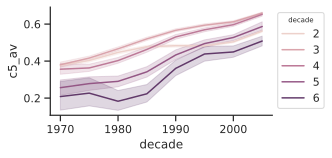

In [629]:

decades=[x for x in range(1970,2010,5)]
decades
Q='exclusivity'

dfplot=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]  
    for itd in range(len(decades)-1):
        B=A[(A['first_paper_pubyear']>=decades[itd])&(A['first_paper_pubyear']<decades[itd+1])]
        x=pd.DataFrame()
        x[Q]=list(B[Q])
        x['core size']=gsize
        x['decade']=decades[itd]
        dfplot=pd.concat([dfplot,x], ignore_index=True)
#     A[A['first_paper_pubyear']>1950]['first_paper_pubyear'].hist(bins=50)

label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

pal=['#ffffcc','#c2e699','#78c679','#31a354','#006837']
# ax=sns.boxplot(data=dfplot, x="core size", y='exclusivity',hue='decade',showfliers=False,palette=pal);
# ax=sns.barplot(data=dfplot, x="core size", y='exclusivity',hue='decade',palette=pal,errwidth=1.5);
ax=sns.lineplot(data=dfplot, x="decade", y=Q,hue='core size',palette=core_colors_dict);
sns.despine(ax=ax)
plt.legend(bbox_to_anchor=(1, 1), title='decade')
# plt.savefig('teamsfig_ExclusivityByDecades.png',dpi=300, bbox_inches = "tight")

In [ ]:
# decades=[1970,1980,1990,2000,2010]
decades=[1970,1980,1990,2000,]
decades=[x for x in range(1970,2010,5)]
decades
Q='c5_av'

dfplot=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['RES_FILTER']==True]  
    for d in decades:
        B=A[(A['first_paper_pubyear']>=d)&(A['first_paper_pubyear']<d+10)]
        x=pd.DataFrame()
        x[Q]=list(B[Q])
        x['core size']=gsize
        x['decade']=d
        dfplot=pd.concat([dfplot,x], ignore_index=True)
#     A[A['first_paper_pubyear']>1950]['first_paper_pubyear'].hist(bins=50)

label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

pal=['#ffffcc','#c2e699','#78c679','#31a354','#006837']
# ax=sns.boxplot(data=dfplot, x="core size", y='exclusivity',hue='decade',showfliers=False,palette=pal);
# ax=sns.barplot(data=dfplot, x="core size", y='exclusivity',hue='decade',palette=pal,errwidth=1.5);
ax=sns.lineplot(data=dfplot, x="decade", y=Q,hue='core size',palette=core_colors_dict);
sns.despine(ax=ax)
plt.legend(bbox_to_anchor=(1, 1), title='decade')
# plt.savefig('teamsfig_ExclusivityByDecades.png',dpi=300, bbox_inches = "tight")

# 3. Formation of cores

In [924]:
for gsize in range(2,maxS):
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]
    print(round(A.shape[0]/significant_cores3[gsize].shape[0]*100,1))
    
    print(gsize,' team size, % of teams created in one-shot= ',A['is_formed_in_one_shot'].sum()*100/A.shape[0])
#         print(gsize,' team size, % of te ams created in one-shot= ',significant_cores3[gsize]['is_formed_in_one_shot'].sum())

79.0
2  team size, % of teams created in one-shot=  100.0
90.7
3  team size, % of teams created in one-shot=  15.597333663336533
57.8
4  team size, % of teams created in one-shot=  4.394669129775021
34.3
5  team size, % of teams created in one-shot=  2.0564073046936318
30.2
6  team size, % of teams created in one-shot=  1.3221267352913402


In [ ]:
dfplot = pd.DataFrame()
x=[]
maxS=7
for gsize in range(3,maxS):
    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]
    x.append(A['is_formed_in_one_shot'].sum()*100/A.shape[0])
    
dfplot['gsize']=[gsize for gsize in range(3,maxS)]
dfplot['% cores formed in one-shot']=x
#     dfplot.append(x.T)
aa=2;bb=2;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])
ax=sns.barplot(data=dfplot, x="gsize", y="% cores formed in one-shot",color='#99d8c9',errwidth=1.5);
plt.xlabel('core size');plt.ylabel('% established at once');
sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig1.pdf',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig_FracGrowingTeams.png',dpi=300, bbox_inches = "tight")

## Impact of first paper by a) one shot assembled, b) teams the grow


In [ ]:
x=[];y=[];
dfplot = pd.DataFrame()

for gsize in range(3,maxS):
    print(gsize,end='\r')


    A= pd.DataFrame()
    a=significant_cores3[gsize][significant_cores3[gsize]['is_formed_in_one_shot']==True]
    a=a[a['w']>=5]
    a=a[a['persistance_time']>=1]
    A['c5 first paper']=a['c5_first']
    A['gsize']=gsize
    A['']='established at once'
    dfplot=pd.concat([dfplot,A])
    
    A= pd.DataFrame()
    b=significant_cores3[gsize][significant_cores3[gsize]['is_formed_in_one_shot']==False]
    b=b[b['w']>=5]
    b=b[b['persistance_time']>=1]
    A['c5 first paper']=b['c5_first']
    A['gsize']=gsize
    A['']='growing'
    dfplot=pd.concat([dfplot,A])
    

aa=4;bb=2;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])

# sns.boxplot(data=dfplot.dropna(), x="size", y="core_diversity",showfliers=False);
pal=['#99d8c9','#2ca25f']
ax=sns.barplot(data=dfplot, x="gsize", y="c5 first paper",hue='',errwidth=1.5,palette=pal);
# plt.xlabel('core size');plt.ylabel('Average formation time \nfor cores (years)');
sns.despine(ax=ax)
plt.tight_layout()
# plt.legend(frameon=True,loc='lower right',framealpha=0.5)
plt.legend(bbox_to_anchor=(.7, .8), title='',framealpha=.1)

# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
plt.xlabel('core size');plt.ylabel('Impact of first paper');
plt.savefig('teamsfig_GrowingAndImpact.png',dpi=300, bbox_inches = "tight")

growing teams, might consist on average of older members cmpared to instantly fromed teams.


CONFIRM. If so, possibe reason for this. 

In [ ]:
from scipy import stats
dfplot2=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]

    Y=np.array(A['w'])
    X=np.array(A['size'])

    
    x=pd.DataFrame();    x['number of coauthored papers']=Y;    x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])


label_ff = 20;ff = 20;aa=2;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])
ax=sns.boxplot(data=dfplot2, x="gsize", y="number of coauthored papers",color='#f03b20',showfliers=False);

plt.yticks([5,10,15,20,25,30])
plt.xlabel('core size');plt.ylabel('num papers coauthored');
sns.despine(ax=ax)

plt.tight_layout()

# plt.savefig('teamsfig_numpapers(W).svg',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig_numpapers(W).png',dpi=300, bbox_inches = "tight")


# 4. Exclusivity
fraction of papers by members as part of team/ total combined number of papers by all member
during time of core together - from first pub to last pub together.


In [369]:
frac_part_of_core=[]
dfplot2=pd.DataFrame();
for  gsize in range(2,maxS):
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]    
    A=A[A['work_counts_UNION']>0]
    A=A[A['exclusivity']<=1]

    
    x=pd.DataFrame();    x['exclusivity']=np.array(A['w']/A['work_counts_UNION']);    x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
    
#     print(A.shape[0]/significant_cores3[gsize].shape[0])
    print(gsize,'----',round(np.mean(A['w']/A['work_counts_UNION']),2))
    frac_part_of_core.append(np.mean(A['w']/A['work_counts_UNION']))
    

2 ---- 0.31
3 ---- 0.29
4 ---- 0.29
5 ---- 0.32
6 ---- 0.35
7 ---- 0.38


<ipython-input-370-37f04e58e43c>:12: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  ax=sns.barplot(data=dfplot2, x="gsize", y="exclusivity",color='#99d8c9',errwidth=1.5);
<ipython-input-370-37f04e58e43c>:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


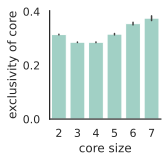

In [370]:
dfplot = pd.DataFrame()
x=[]
dfplot['gsize']=[gsize for gsize in range(2,maxS)]
dfplot['exclusivity of core']=frac_part_of_core
#     dfplot.append(x.T)

label_ff = 20;ff = 20;aa=2;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])
# ax=sns.boxplot(data=dfplot2, x="gsize", y="exclusivity",showfliers=False,color='#99d8c9');
ax=sns.barplot(data=dfplot2, x="gsize", y="exclusivity",color='#99d8c9',errwidth=1.5);
sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
plt.xlabel('core size');plt.ylabel('exclusivity of core');
# plt.savefig('teamsfig_Exclusivity.png',dpi=300, bbox_inches = "tight")


Being part of a bigger core seems to require personal investment, reducing the percentage of non-core collaborations.

This can be explained by the fact that most cores grow slowly over years (3 year per new memmber addition) instead of being formed instantly, thus, the core publishes more papers together over the years.

In [ ]:
np.mean(frac_part_of_core)


- On average, 38.0 % of teams individual work is published with the persistent core.

### Exclusivity vs Impact

- Exclusivity provides gradient in impact given a core size, refinement of dashun's message.


2 SpearmanrResult(correlation=-0.10920871863989698, pvalue=0.0)
3 SpearmanrResult(correlation=-0.17768395629162018, pvalue=0.0)
4 SpearmanrResult(correlation=-0.1506900117715224, pvalue=0.0)
5 SpearmanrResult(correlation=-0.18744172504463355, pvalue=1.160179766257915e-198)
6 SpearmanrResult(correlation=-0.18586601543048958, pvalue=1.0106405776243584e-54)


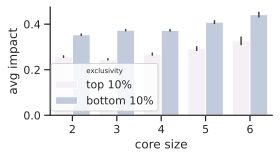

In [1015]:
from scipy import stats
dfplot2=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    
    A=significant_cores3[gsize]
    A=A[A['w2018']>=5]
    A=A[A['persistance_time']>=1]    
    A=A[A['work_counts_UNION']>0]
    A=A[A['exclusivity']<=1]

    Y=np.array(A['exclusivity'])
    X=np.array(A['c5_av'])

    Z=sorted(X); p90=Z[int(round(len(Z)*.9,0))];p10=Z[int(round(len(Z)*.1,0))]; 
    ind90=np.where(X>=p90)[0];ind10=np.where(X<=p10)[0];
    x90=X[ind90];x10=X[ind10];
    y90=Y[ind90];y10=Y[ind10];
    
    x=pd.DataFrame();    x['c5']=y90;    x['exclusivity']='top 10%';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
    x=pd.DataFrame();  x['c5']=y10;    x['exclusivity']='bottom 10%';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
#     x=pd.DataFrame();  x['exclusivity']=y10;    x['c5']='bottom 20%';x['gsize']=gsize;
#     dfplot2=pd.concat([dfplot2,x])

    res1 = stats.spearmanr(X,Y)
#     res2 = stats.spearmanr(x10,y10)
    print(gsize, res1)


label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

ax=sns.barplot(data=dfplot2, x="gsize", y="c5",hue='exclusivity',errwidth=1.5,palette=['#f6eff7','#bdc9e1']);

sns.despine(ax=ax)
plt.xlabel('core size');plt.ylabel('avg impact');
# plt.legend(framealpha=0.5)
plt.legend(bbox_to_anchor=(.51, .53), title='exclusivity',framealpha=.8)

# plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig_ExclusivityAndImpact.png',dpi=300, bbox_inches = "tight")


# 4.5 Impact

In [163]:
len(f_high_shuffled)

28723

## Average impact

In [ ]:
dfplot=pd.DataFrame()
icd=np.where(significant_cores3[gsize].columns=='core_diversity')[0][0]
isize=np.where(significant_cores3[gsize].columns=='size')[0][0]
i1=np.where(significant_cores3[gsize].columns=='c5_av')[0][0]
for gsize in range(2,maxS):
    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]   
    dfplot=pd.concat([dfplot ,A.iloc[:,[i1,isize,icd]]])

meanlineprops = dict(linestyle='--', linewidth=1.5, color='k')
medianprops = dict(linestyle='--', linewidth=1.5, color='white')

# sns.boxplot(data=dfplot.dropna(), x="size", y="c5_av",showfliers=False,showmeans=True,meanline=True,meanprops=meanlineprops,medianprops=medianprops);




label_ff = 20;ff = 20;aa=2;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

ax=sns.barplot(data=dfplot.dropna(), x="size", y="c5_av",color='#99d8c9',errwidth=1.5);

sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
plt.xlabel('core size');plt.ylabel('avg c5 (papers)')
plt.savefig('teamsfig_Impact.png',dpi=300, bbox_inches = "tight")


why less c5 for bigger cores?
in general bigger teams are known to get more impact, so why a falling trend for higher core size?
perhaps big teams which get more impact are the non-persistent ones?


 - EXCLUSIVITY procvides gradient?-- Refinement of dashun's message


## Impact vs Career

In [ ]:
dfplot2=pd.DataFrame()
min_impact=0.1
for gsize in range(2,maxS):
    print(gsize,end='\r')
    
    A=significant_cores3[gsize]
    A=A[A['w2018']>=5]
    A=A[A['persistance_time']>=1]    
    A=A[A['c5_half1']>min_impact]    
    A=A[A['c5_half2']>min_impact]  

    x=pd.DataFrame();    x['c5']=np.array(A['c5_half1']);    x['career stage']='first half';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
    x=pd.DataFrame();    x['c5']=np.array(A['c5_half2']);    x['career stage']='second half';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])


label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])
pal=['#bcbddc','#756bb1']
ax=sns.barplot(data=dfplot2, x="gsize", y="c5",hue='career stage',palette=pal,errwidth=1.5);
#efedf5
sns.despine(ax=ax)
plt.xlabel('core size');plt.ylabel('avg impact');
# plt.legend(framealpha=0.5)
plt.legend(bbox_to_anchor=(.51, .53), title='career stage',framealpha=.7);

# plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig_ImpactAndCareer.png',dpi=300, bbox_inches = "tight")


In [ ]:
dfplot2=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize)
    
    A=significant_cores3[gsize]
    A=A[A['w2018']>=5]
    A=A[A['persistance_time']>=1]    
    A=A[A['c5_half1']>min_impact]    
    A=A[A['c5_half2']>min_impact]    
    A['c5 ratio']=np.divide(np.array(A['c5_half1']),np.array(A['c5_half2']))
    print('% cores with higher impact in first half= ',round(100* A[A['c5 ratio']>1].shape[0]/A.shape[0],1))
#     x=pd.DataFrame();    x['c5 ratio']=np.divide(np.array(A['c5_half1']),np.array(A['c5_half2']));    x['career stage']='first half';x['gsize']=gsize;
    
#     dfplot2=pd.concat([dfplot2,x])


# label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
# fig = plt.figure(figsize=(aa, bb));
# spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
# ax = fig.add_subplot(spec[0])
# pal=['#bcbddc','#756bb1']
# ax=sns.barplot(data=dfplot2, x="gsize", y="c5 ratio",color=pal[1]);
# #efedf5
# sns.despine(ax=ax)
# plt.xlabel('core size');plt.ylabel(r'$\frac{impact \ first \ half}{impact\ second\ half}$');
# # plt.legend(framealpha=0.5)
# plt.legend(bbox_to_anchor=(.51, .53), title='career stage',framealpha=.4)

# plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig_ImpactAndCareer.png',dpi=300, bbox_inches = "tight")


## Gallo: Given core size, find effect of team size on impact. 
- Should be growing in general (DASHUN)
- Find optimum coresize given core size.
- Make dictionary --  

In [ ]:
with open(path_career+'dict_c5_norm.pkl', 'rb') as f:
    dict_c5_norm=pickle.load(f) 
    
with open(path_career+'dict_papersteamsizes.pkl', 'rb') as f:
    dict_papersteamsizes=pickle.load(f) 

In [ ]:
# c5_all=np.array(list(dict_c5_norm.values()))
# teamsizes_all=np.array([dict_papersteamsizes.get(x,np.nan) for x in dict_c5_norm.keys()])



In [ ]:
X=c5_all[~np.isnan(teamsizes_all)]
Y=teamsizes_all[~np.isnan(teamsizes_all)]

In [ ]:
ind=np.where(X>0)
print(stats.spearmanr(X[ind],Y[ind]))

In [ ]:
with open(path_career+'corrimpactteamsize.pkl', 'rb') as f:
    corrimpactteamsize=pickle.load(f) 
with open(path_career+'corrimpactteamsizenumpapers.pkl', 'rb') as f:
    numpapers=pickle.load(f) 

for gsize in range(2,maxS):
    t_ic = time.time();
    print(gsize,end='\r')


In [ ]:
corrimpactteamsize={}
numpapers={}

for gsize in range(2,maxS):
    t_ic = time.time();
    print(gsize)
    corrimpactteamsize[gsize]=[]
    numpapers[gsize]=[]
    with open(path_career+'significant_cores(c5norm)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        c5=pickle.load(f) 
    with open(path_career+'significant_cores(teamsizes)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        teamsizes=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
        
    print(stats.spearmanr(c5,teamsizes))
    c5=np.array(c5)
    teamsizes=np.array(teamsizes)
    ind=np.where(c5>0)
    print(stats.spearmanr(c5[ind],teamsizes[ind]))
        



In [ ]:
gsize=2
X=np.array(numpapers[gsize])
Y=np.array(corrimpactteamsize[gsize])
c=np.array([x[0] for x in Y])
p=np.array([x[0] for x in Y])

Yc
ind=np.where((X>20)&(p<.01))


In [ ]:
plt.hist(c[ind],density=True)

In [ ]:
# from scipy import stats
# dfplot2=pd.DataFrame()
# for gsize in range(2,maxS):
#     print(gsize,end='\r')
#     A=significant_cores3[gsize]
# #     A=A.dropna()
#     X=np.array(A['core_diversity'])
#     Y=np.array(A['c5_av'])

#     Z=sorted(X); p90=Z[int(round(len(Z)*.1,0))];p10=Z[int(round(len(Z)*.1,0))]; 
#     ind90=np.where(X>=p90)[0];ind10=np.where(X<=p10)[0];
#     x90=X[ind90];x10=X[ind10];
#     y90=Y[ind90];y10=Y[ind10];
    
#     x=pd.DataFrame();    x['c5']=y90;    x['interdisciplinarity']='top 10%';x['gsize']=gsize;
#     dfplot2=pd.concat([dfplot2,x])
#     x=pd.DataFrame();  x['c5']=y10;    x['interdisciplinarity']='bottom 10%';x['gsize']=gsize;
#     dfplot2=pd.concat([dfplot2,x])

# #     res1 = stats.spearmanr(x90,y90)
# #     res2 = stats.spearmanr(x10,y10)
# #     print(gsize, res1,res2)


In [ ]:

# label_ff = 20;ff = 20;aa=6;bb=4;wspace_=.5;hspace_=.3;
# fig = plt.figure(figsize=(aa, bb));
# spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
# ax = fig.add_subplot(spec[0])
# 
# ax=sns.barplot(data=dfplot2, x="gsize", y="c5",hue='interdisciplinarity');

# sns.despine(ax=ax)
# plt.tight_layout()
# # plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.xlabel('core size');plt.ylabel('c5 of first paper by core (normalized)')
# plt.savefig('teamsfig8.pdf',dpi=300, bbox_inches = "tight")


## Impact vs discipline diversity of core

In [ ]:
dfplot2=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]    
    A=A[A['c5_av']>0]    
    Y=np.array(A['core_diversity'])
    X=np.array(A['c5_av'])

    Z=sorted(X); p90=Z[int(round(len(Z)*.1,0))];p10=Z[int(round(len(Z)*.1,0))]; 
    ind90=np.where(X>=p90)[0];ind10=np.where(X<=p10)[0];
    x90=X[ind90];x10=X[ind10];
    y90=Y[ind90];y10=Y[ind10];
    x=pd.DataFrame();  x['interdisciplinarity']=y10;    x['c5']='bottom \n10%';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
    
    x=pd.DataFrame();    x['interdisciplinarity']=y90;    x['c5']='top \n10%';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])

#     res1 = stats.spearmanr(x90,y90)
#     res2 = stats.spearmanr(x10,y10)
#     print(gsize, res1,res2)



label_ff = 20;ff = 20;aa=2;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

# ax=sns.barplot(data=dfplot2, x="gsize", y="interdisciplinarity",hue='c5',errwidth=1.5,palette=['#f6eff7','#bdc9e1']);
ax=sns.barplot(data=dfplot2,  y="interdisciplinarity",x='c5',errwidth=1.5,palette=['#f6eff7','#bdc9e1']);

sns.despine(ax=ax)
# plt.xlabel('core size');plt.ylabel('interdisciplinarity of papers')
# plt.legend(bbox_to_anchor=(.55, .5), title='impact',framealpha=.1)

plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig_InterdisciAndImpact.pdf',dpi=300, bbox_inches = "tight")


## Fede M: Displine wise analysis of exclusivity: Anthropology, Applied physics (big experminents, more human resource)

# 7. Literature Search

In [153]:
gsize=2
# significant_cores3[gsize][significant_cores3[gsize]['w']<50]['w'].hist(bins=100)

In [552]:
dfplot = pd.DataFrame()

for gsize in range(2,maxS):
    print(gsize,end='\r')

    A= pd.DataFrame()
    A['search popularity']=significant_cores3[gsize]['corelitP']
    A['gsize']=gsize
#     A['']='instantly formed'
    dfplot=pd.concat([dfplot,A])
aa=4;bb=4;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])

# sns.boxplot(data=dfplot.dropna(), x="size", y="core_diversity",showfliers=False);
ax=sns.barplot(data=dfplot, x="gsize", y="search popularity",color='#99d8c9',errwidth=1.5);
# plt.xlabel('core size');plt.ylabel('Average formation time \nfor cores (years)');
sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig5.png',dpi=300, bbox_inches = "tight")

KeyError: 'corelitP'

In [ ]:
dfplot = pd.DataFrame()

for gsize in range(2,maxS):
    print(gsize,end='\r')

    A= pd.DataFrame()
    a=corelitD[gsize]
    A['search depth (years)']=a
    A['gsize']=gsize
#     A['']='instantly formed'
    dfplot=pd.concat([dfplot,A])
aa=4;bb=4;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])

# sns.boxplot(data=dfplot.dropna(), x="size", y="core_diversity",showfliers=False);
ax=sns.barplot(data=dfplot, x="gsize", y="search depth (years)",color='#99d8c9',errwidth=1.5);
# plt.xlabel('core size');plt.ylabel('Average formation time \nfor cores (years)');
sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig5.png',dpi=300, bbox_inches = "tight")

In [ ]:
x=[];y=[];
dfplot = pd.DataFrame()

for gsize in range(3,maxS):
    print(gsize,end='\r')

    A= pd.DataFrame()
    a=corelitD[gsize]
    A['cited literature depth (years)']=a
    A['gsize']=gsize
    A['instantaneous']=significant_cores3[gsize]['is_formed_in_one_shot']
    dfplot=pd.concat([dfplot,A])

aa=4;bb=2;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])

# sns.boxplot(data=dfplot.dropna(), x="size", y="core_diversity",showfliers=False);
ax=sns.barplot(data=dfplot, x="gsize", y="cited literature depth (years)",hue='instantaneous');
# plt.xlabel('core size');plt.ylabel('Average formation time \nfor cores (years)');
sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig5.png',dpi=300, bbox_inches = "tight")

In [ ]:
x=[];y=[];
dfplot = pd.DataFrame()

for gsize in range(3,5):
    print(gsize,end='\r')

    A= pd.DataFrame()
    a=corelitP[gsize]
    A['cited literature popularity (years)']=a
    A['gsize']=gsize
    A['instantaneous']=significant_cores3[gsize]['is_formed_in_one_shot']
    dfplot=pd.concat([dfplot,A])

aa=4;bb=2;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])

# sns.boxplot(data=dfplot.dropna(), x="size", y="core_diversity",showfliers=False);
ax=sns.barplot(data=dfplot, x="gsize", y="cited literature popularity (years)",hue='instantaneous');
# plt.xlabel('core size');plt.ylabel('Average formation time \nfor cores (years)');
sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig5.png',dpi=300, bbox_inches = "tight")

In [ ]:
from scipy import stats
dfplot2=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    
    A=significant_cores3[gsize]
#     A=A.dropna()
    A=A[A['work_counts_UNION']>10]

    Y=np.array(A['exclusivity'])
    X=np.array(A['corelitD'])

    Z=sorted(X); p90=Z[int(round(len(Z)*.9,0))];p10=Z[int(round(len(Z)*.1,0))]; 
    ind90=np.where(X>=p90)[0];ind10=np.where(X<=p10)[0];
    x90=X[ind90];x10=X[ind10];
    y90=Y[ind90];y10=Y[ind10];
    
    x=pd.DataFrame();    x['corelitD']=y90;    x['exclusivity']='top 10%';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
    x=pd.DataFrame();  x['corelitD']=y10;    x['exclusivity']='bottom 10%';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
#     x=pd.DataFrame();  x['exclusivity']=y10;    x['c5']='bottom 20%';x['gsize']=gsize;
#     dfplot2=pd.concat([dfplot2,x])

    res1 = stats.spearmanr(X,Y)
#     res2 = stats.spearmanr(x10,y10)
    print(gsize, res1)


label_ff = 20;ff = 20;aa=6;bb=4;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

ax=sns.barplot(data=dfplot2.dropna(), x="gsize", y="corelitD",hue='exclusivity');

sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig7.png',dpi=300, bbox_inches = "tight")


In [ ]:
from scipy import stats
dfplot2=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    
    A=significant_cores3[gsize]
    A=A[A['work_counts_UNION']>10]
    Y=np.array(A['exclusivity'])
    X=np.array(A['corelitB'])

    Z=sorted(X); p90=Z[int(round(len(Z)*.9,0))];p10=Z[int(round(len(Z)*.1,0))]; 
    ind90=np.where(X>=p90)[0];ind10=np.where(X<=p10)[0];
    x90=X[ind90];x10=X[ind10];
    y90=Y[ind90];y10=Y[ind10];
    
    x=pd.DataFrame();    x['corelitB']=y90;    x['exclusivity']='top 10%';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
    x=pd.DataFrame();  x['corelitB']=y10;    x['exclusivity']='bottom 10%';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
#     x=pd.DataFrame();  x['exclusivity']=y10;    x['c5']='bottom 20%';x['gsize']=gsize;
#     dfplot2=pd.concat([dfplot2,x])

    res1 = stats.spearmanr(X,Y)
#     res2 = stats.spearmanr(x10,y10)
    print(gsize, res1)


label_ff = 20;ff = 20;aa=6;bb=4;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

ax=sns.barplot(data=dfplot2.dropna(), x="gsize", y="corelitB",hue='exclusivity');

sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig7.png',dpi=300, bbox_inches = "tight")


# 8. How long core persists after formation

In [ ]:
dfplot=pd.DataFrame()
for gsize in range(2,maxS):
    A=significant_cores3[gsize]
    x=pd.DataFrame()
    x['career length (years)']=list(A[(A['persistance_time']>1) &(A['persistance_time']<30)]['persistance_time'])
    x['core size']=gsize
    dfplot=pd.concat([dfplot,x])

label_ff = 20;ff = 20;aa=2;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

pal="crest"
ax=sns.boxplot(data=dfplot.dropna(), x="core size", y='career length (years)',showfliers=False,palette=pal);
sns.despine(ax=ax)
# plt.legend(bbox_to_anchor=(1, 1), title='core size')
plt.savefig('teamsfig_CareerLength.png',dpi=300, bbox_inches = "tight")


In [ ]:
dfplot=pd.DataFrame()
for gsize in range(2,maxS):
    for W in [5,10,15]:
        A=significant_cores3[gsize]
    
        A=A[A['w']==W]
        x=pd.DataFrame()
        x['time taken to produce (years)']=list(A[(A['persistance_time']>1) &(A['persistance_time']<30)]['persistance_time'])
        x['core size']=gsize
        x['number of papers by core']=W
        dfplot=pd.concat([dfplot,x])
#     .hist(bins=30,density=True,alpha=.5,label=gsize)
    
# plt.legend();

label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

pal="flare"
ax=sns.boxplot(data=dfplot.dropna(), hue="core size", y='time taken to produce (years)',x='number of papers by core',showfliers=False,palette=pal);
sns.despine(ax=ax)
plt.legend(bbox_to_anchor=(1, 1), title='core size')
plt.savefig('teamsfig_ProductionRate.png',dpi=300, bbox_inches = "tight")

In [ ]:
dfplot=pd.DataFrame()
for gsize in range(2,maxS):
    for W in range(5,20):
        A=significant_cores3[gsize]
    
        A=A[A['w']==W]
        x=pd.DataFrame()
        x['time taken to produce (years)']=list(A[(A['persistance_time']>1) &(A['persistance_time']<30)]['persistance_time'])
        x['core size']=gsize
        x['number of papers by core']=W
        dfplot=pd.concat([dfplot,x])
#     .hist(bins=30,density=True,alpha=.5,label=gsize)
    
# plt.legend();

label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

pal="flare"
ax=sns.boxplot(data=dfplot.dropna(), hue="core size", y='time taken to produce (years)',x='number of papers by core',showfliers=False,palette=pal);
sns.despine(ax=ax)
plt.legend(bbox_to_anchor=(1, 1), title='core size')
plt.savefig('teamsfig_ProductionRate.png',dpi=300, bbox_inches = "tight")

In [ ]:
# grouped = dfplot.groupby(['core size', 'number of papers by core'])
# summary = grouped['time taken to produce (years)'].agg(['mean', 'sem']).reset_index()
grouped = dfplot.groupby(['core size', 'number of papers by core'])['time taken to produce (years)']
summary = grouped.agg(mean='mean', sem=lambda x: stats.sem(x, ddof=1)).reset_index()

# Calculate the 95% confidence intervals
summary['ci_95'] = summary['sem'] * stats.t.ppf((1 + 0.95) / 2., grouped.count() - 1)

# Plot the curves with seaborn lineplot
plt.figure(figsize=(10, 6))
# ax = sns.lineplot(data=summary, x='number of papers by core', y='mean', hue='core size', style='core size', markers=True, err_style='bars', ci='sd')
ax = sns.lineplot(data=summary, x='number of papers by core', y='mean', hue='core size',  err_style='bars')
x=list(summary['number of papers by core']);
y=list(summary['mean']);y_err=summary['sem'];
alpha=.8;ini_=0;lw=2;ms=2
# ax.errorbar(x,y,y_err ,fmt='', mfc='w',mec='w', ms=0,lw=lw, mew=lw,color='#beaed4',ecolor='#beaed4',alpha=alpha,label=r'NSF winners')

ax.errorbar(x,y,y_err ,fmt='none', mfc='w',mec='w', ms=0,lw=lw, mew=lw,color='k',ecolor='k',alpha=alpha,label=r'NSF winners')

# ax = sns.lineplot(data=summary, x='number of papers by core', y='mean', hue='core size', err_style="bars", errorbar=("sem", 2))

plt.xlabel('number of papers by Core')
plt.ylabel('Mean Time Taken to Produce (Years)')
plt.title('Mean Time Taken to Produce vs. Number of Papers by Core Size')

sns.despine()

In [ ]:
dfplot.groupby(by=["core size",'number of papers by core']).mean()

In [ ]:
significant_cores3[2].columns

# 10. Correlation check betweeen all quantities

In [ ]:
props=['c5_av', 'exclusivity','geodiversities_countries','geodiversities_continents','core_diversity','time_taken_to_accumulatev2']

for i in range(len(props)):
    for j in range(i+1,len(props)):
        print(props[i],', ',props[j],'---')       
        for gsize in range(2,5):
            A=significant_cores3[gsize].dropna()
            A=A[A['w']>10]
            A=A[A['persistance_time']>=1]
            A=A[A['c5_av']>=0]
            r,p=stats.spearmanr(A[props[i]],A[props[j]])
            print('core size = ',gsize,r', r=',round(r,2),r', p=',round(p,3))       


c5 first and c5 average are correlated, dynamics of citations.

# 11. Elite scientist cores

In [ ]:
gsize=2
A=significant_cores3[gsize]
A=A[A['w']>=5]
A=A[A['persistance_time']>=1]
G=A.sort_values(by=['c5_av'],ascending=False)


In [ ]:
x['display_na']

In [ ]:
it=15
core=G.iloc[it][0]
print(core)

In [ ]:

it=15
core=G.iloc[it][0]
for a in core:
    l='https://api.openalex.org/authors/'+a.split('/')[-1]
    headers = {
        'User-Agent': 'chowdhary_sandeep',
        'From': 'chowdhary_sandeep@phd.ceu.edu'  # This is another valid field
    }

    x = requests.get(l)    
    x= x.json()
#     'display_name','2yr_mean_citedness'
    print(x['display_name'])
    print(x['summary_stats']['2yr_mean_citedness'])
    print(x['last_known_institution']['display_name'])
    print(x['last_known_institution']['country_code'])
    print('-------------')
print('num papers ',G.iloc[it]['w'])

In [ ]:
x

In [ ]:
G['w'].mean()

# career age

In [ ]:
def cal_ages(la):
    xauths=list(la.iloc[:,0])
    xpapers=list(la.iloc[:,6])
    ll_ages=[]
    for it in range(len(xpapers)):
        print(it/len(xpapers),end='\r')
        list_ages=[]
#         for it_paper in range(len(xpapers[it])):
        ages=[]
        try: 
            pub_time=int(dict_pubyear['https://openalex.org/'+xpapers[it][0]])
        except:
            pub_time=np.nan

        for it_auth in range(len(xauths[it])):
            try: 
                first_pub=int(dict_firstpub[xauths[it][it_auth]].split('-')[0])
            except:
                first_pub=np.nan
            ages.append(pub_time-first_pub)
        list_ages.append(ages)
        ll_ages.append(list_ages)
    return ll_ages



# c5 within discipline

In [ ]:
with open(path_career+'dict_c5_within.pkl', 'rb') as f:
    dict_c5_within=pickle.load(f) 
    
with open(path_career+'dict_c5_within_lvl1.pkl', 'rb') as f:
    dict_c5_within_lvl1=pickle.load(f) 

In [ ]:
def plot_c5within_coresize(TS):

    significant_cores3_sample2=significant_cores3_sample[significant_cores3_sample['size']==(TS,)]
    nonsignificant_cores3_sample2=nonsignificant_cores3_sample[nonsignificant_cores3_sample['size']==(TS,)]

    ups=[]
    for x in significant_cores3_sample2['papers_shared']:
        ups+=x
    ups=np.unique(ups)
    #______________________
    upns=[]
    for x in nonsignificant_cores3_sample2['papers_shared']:
        upns+=x
    upns=np.unique(upns)
    #______________________
    upns=set(upns).difference(set(ups))
    
    ups_cites=[]                
    for p in ups:
            try:
                ups_cites.append(dict_c5_within["https://openalex.org/"+p]/dict_c5["https://openalex.org/"+p])
            except:
                ups_cites.append(np.nan)
    upns_cites=[]                
    for p in upns:
            try:
                upns_cites.append(dict_c5_within["https://openalex.org/"+p]/dict_c5["https://openalex.org/"+p])
            except:
                upns_cites.append(np.nan)
    #______________________
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter(action='ignore', category=FutureWarning)
    pd.options.mode.chained_assignment = None  # default='warn'

    y1=np.array(ups_cites)
#     y1=y1[~np.isnan(y1) ]
    y1=y1[~np.isnan(y1) & (y1>0)]
    print('c5 ratio persistent=',np.nanmean(y1))
    # 
    y2=np.array(upns_cites)
#     y2=y2[~np.isnan(y2) ]
    y2=y2[~np.isnan(y2) & (y2>0)]
    print('c5 ratio non-persistent',np.nanmean(y2))
    # plt.boxplot(,showfliers=False)
    import seaborn as sns
    df_=pd.DataFrame()
    it_=-1;row_=0
    df_['x']=[]
    for data_ in [y1,y2]:
        it_+=1
        df_=pd.concat([df_, pd.DataFrame(data_)])
#         df_=df_.append()
        rows_=pd.DataFrame(data_).shape[0]
        if it_==0:
            df_['x'].iloc[row_:row_+rows_]='persistent'
        else:
            df_['x'].iloc[row_:row_+rows_]='non-persistent'
        row_=row_+rows_
    df_.columns=['type','c5_within/c5']
    df_['c5_within/c5']=df_['c5_within/c5']
    sns.set(font_scale = 1.5)
    sns.set(rc={'figure.figsize':(4,2)})
    sns.boxplot(data=df_, x="c5_within/c5", y="type",showfliers=False,showmeans=True )
    return df_


def plot_c5within_coresize_lvl1(TS):

    significant_cores3_sample2=significant_cores3_sample[significant_cores3_sample['size']==(TS,)]
    nonsignificant_cores3_sample2=nonsignificant_cores3_sample[nonsignificant_cores3_sample['size']==(TS,)]

    ups=[]
    for x in significant_cores3_sample2['papers_shared']:
        ups+=x
    ups=np.unique(ups)
    #______________________
    upns=[]
    for x in nonsignificant_cores3_sample2['papers_shared']:
        upns+=x
    upns=np.unique(upns)
    #______________________
    upns=set(upns).difference(set(ups))
    
    ups_cites=[]                
    for p in ups:
            try:
                ups_cites.append(dict_c5_within_lvl1["https://openalex.org/"+p]/dict_c5["https://openalex.org/"+p])
            except:
                ups_cites.append(np.nan)
    upns_cites=[]                
    for p in upns:
            try:
                upns_cites.append(dict_c5_within_lvl1["https://openalex.org/"+p]/dict_c5["https://openalex.org/"+p])
            except:
                upns_cites.append(np.nan)
    #______________________
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter(action='ignore', category=FutureWarning)
    pd.options.mode.chained_assignment = None  # default='warn'

    y1=np.array(ups_cites)
#     y1=y1[~np.isnan(y1) ]
    y1=y1[~np.isnan(y1) & (y1>0)]
    print('c5 ratio persistent=',np.nanmean(y1))
    # 
    y2=np.array(upns_cites)
#     y2=y2[~np.isnan(y2) ]
    y2=y2[~np.isnan(y2) & (y2>0)]
    print('c5 ratio non-persistent',np.nanmean(y2))
    # plt.boxplot(,showfliers=False)
    import seaborn as sns
    df_=pd.DataFrame()
    it_=-1;row_=0
    df_['x']=[]
    for data_ in [y1,y2]:
        it_+=1
        df_=pd.concat([df_, pd.DataFrame(data_)])
#         df_=df_.append()
        rows_=pd.DataFrame(data_).shape[0]
        if it_==0:
            df_['x'].iloc[row_:row_+rows_]='persistent'
        else:
            df_['x'].iloc[row_:row_+rows_]='non-persistent'
        row_=row_+rows_
    df_.columns=['type','c5_within/c5']
    df_['c5_within/c5']=df_['c5_within/c5']
    sns.set(font_scale = 1.5)
    sns.set(rc={'figure.figsize':(4,2)})
    sns.boxplot(data=df_, x="c5_within/c5", y="type",showfliers=False,showmeans=True )
    return df_


In [ ]:
df_temp=plot_c5within_coresize(5)

In [ ]:
df_temp2=plot_c5within_coresize_lvl1(2)

# Fig 0 : Geography

# Fig 1: Career age

In [ ]:
def cal_ages(la):
    xauths=list(la.iloc[:,0])
    xpapers=list(la.iloc[:,6])
    ll_ages=[]
    for it in range(len(xpapers)):
        print(it/len(xpapers),end='\r')
        list_ages=[]
#         for it_paper in range(len(xpapers[it])):
        ages=[]
        try: 
            pub_time=int(dict_pubyear['https://openalex.org/'+xpapers[it][0]])
        except:
            pub_time=np.nan

        for it_auth in range(len(xauths[it])):
            try: 
                first_pub=int(dict_firstpub[xauths[it][it_auth]].split('-')[0])
            except:
                first_pub=np.nan
            ages.append(pub_time-first_pub)
        list_ages.append(ages)
        ll_ages.append(list_ages)
    return ll_ages



In [ ]:
def violin_age(l_l,l_lns):

    dict_ll_ages_s={0:l_l,1:l_lns}
    dict_y={}
    for it_sns in range(2):
        y={x:[] for x in range(len(l_l[0][0]))}
        l_l= dict_ll_ages_s[it_sns]
        for it in range(len(l_l)):
            try:
                x=sorted(l_l[it][0])
                for it_ in range(len(x)):
                    y[it_].append(x[it_])
            except:
                1
        for k in y.keys():
            y[k]=np.array(y[k])
            y[k]=y[k][~np.isnan(y[k]) & (y[k]<50) & (y[k]>=0)]
            print('age=',k,'th oldest----',np.mean(y[k]))
        dict_y[it_sns]=y
    import seaborn as sns
    df_=pd.DataFrame()
    it_=-1;row_=0
    df_['member']=[]
    df_['']=[]
    for it_sns in range(2):
        it_=-1
        y=dict_y[it_sns]
        for data_ in [y[k] for k in y.keys()]:
            it_+=1
            df_=pd.concat([df_, pd.DataFrame(data_)])
            rows_=pd.DataFrame(data_).shape[0]
            df_['member'].iloc[row_:row_+rows_]=str(it_)
            df_[''].iloc[row_:row_+rows_]=str(it_sns)

            row_=row_+rows_
    df_.columns=['member','','age']
    return df_

In [ ]:

TS=3
significant_cores3_sample2=significant_cores3_sample[significant_cores3_sample['size']==(TS,)]
nonsignificant_cores3_sample2=nonsignificant_cores3_sample[nonsignificant_cores3_sample['size']==(TS,)]

ll_ages_s=cal_ages(significant_cores3_sample2)
ll_ages_ns=cal_ages(nonsignificant_cores3_sample2)
#
df_=violin_age(ll_ages_s,ll_ages_ns)
df_['']=df_[''].replace({'0':'persistent','1':'non-persistent'})
df_['member']=df_['member'].replace({'0':'youngest','1':'middle',str(df_['member'].nunique()-1):'oldest'})

sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(6,3)})
# sns.violinplot(data=df_, x="age", y="member", hue="type")
pal='rocket'
sns.boxplot(data=df_, x="age", y="member", hue="",showfliers=False).set(title='core size='+str(TS),palette=pal)
plt.xlabel("career age")
# sns.boxplot(data=df_, x="c5", y="type",showfliers=False)


In [ ]:
def violin_av_age_of_core_vs_coresize(L_timegap_s,L_timegap_ns,s_size,ns_size):
    dict_y={}
    
    for TS in range(2,6):
        dict_y[TS]={}
        inds=np.where(s_size['size']==(TS,))[0];indns=np.where(ns_size['size']==(TS,))[0];
        dict_y[TS]=[L_timegap_s[inds],L_timegap_ns[indns]]
#         dict_ll_ages_s={0:L_timegap_ns,1:L_timegap_ns}
    
    import seaborn as sns
    df_=pd.DataFrame()
    row_=0
    df_['coresize']=[]
    df_['']=[]
    for TS in range(2,6):
        for it_sns in range(2):
            data_=dict_y[TS][it_sns]
            df_=pd.concat([df_, pd.DataFrame(data_)])
            rows_=pd.DataFrame(data_).shape[0]
            df_['coresize'].iloc[row_:row_+rows_]=str(TS)
            df_[''].iloc[row_:row_+rows_]=str(it_sns)

            row_=row_+rows_
    df_.columns=['coresize','','age']
    return df_

In [ ]:

L_ages_s=cal_ages(significant_cores3_sample)
L_ages_ns=cal_ages(nonsignificant_cores3_sample)
L_ages_s_av=np.array([np.mean(l) for l in L_ages_s])
L_ages_ns_av=np.array([np.mean(l) for l in L_ages_ns])
L_ages_s_std=np.array([np.nanvar(l)**.5 for l in L_ages_s])
L_ages_ns_std=np.array([np.nanvar(l)**.5 for l in L_ages_ns])




In [ ]:
df_av_ages=violin_av_age_of_core_vs_coresize(L_ages_s_av,L_ages_ns_av,significant_cores3_sample,nonsignificant_cores3_sample)
df_av_ages['']=df_av_ages[''].replace({'0':'persistent','1':'non-persistent'})

df_av_ages.columns=['core size','', 'career age (years)']
df_av_ages=df_av_ages[(df_av_ages['career age (years)']>=0) & (df_av_ages['career age (years)']<60)]

# df_=violin_timegaps(L_timegap_s,L_timegap_ns)
# df_timegaps['member']=df_timegaps['member'].replace({'0':'youngest','1':'middle',str(df_['member'].nunique()-1):'oldest'})
# df_av_ages['Time per paper (months)']=df_av_ages['Time per paper (years)']*12

sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(6,3)})
# sns.violinplot(data=df_, x="age", y="member", hue="type")
sns.boxplot(data=df_av_ages, x='career age (years)', y='core size', hue="",showfliers=False)
plt.legend(loc='upper right')
plt.tight_layout()

# sns.violinplot(data=df_av_ages, x='career age (years)', y='core size', hue="")
# plt.xlabel("career age")
# sns.boxplot(data=df_, x="c5", y="type",showfliers=False)
# print(df_timegaps.groupby(by='')['career age (years)'].mean())

In [ ]:
df_av_ages=violin_av_age_of_core_vs_coresize(L_ages_s_std,L_ages_ns_std,significant_cores3_sample,nonsignificant_cores3_sample)
df_av_ages['']=df_av_ages[''].replace({'0':'persistent','1':'non-persistent'})

df_av_ages.columns=['core size','', 'heterogenity in career age (years)']
df_av_ages=df_av_ages[(df_av_ages['heterogenity in career age (years)']>=0) & (df_av_ages['heterogenity in career age (years)']<60)]

# df_=violin_timegaps(L_timegap_s,L_timegap_ns)
# df_timegaps['member']=df_timegaps['member'].replace({'0':'youngest','1':'middle',str(df_['member'].nunique()-1):'oldest'})
# df_av_ages['Time per paper (months)']=df_av_ages['Time per paper (years)']*12

sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(6,3)})
# sns.violinplot(data=df_, x="age", y="member", hue="type")
sns.boxplot(data=df_av_ages, x='heterogenity in career age (years)', y='core size', hue="",showfliers=False)
plt.legend(loc='upper right')

plt.tight_layout()
# sns.violinplot(data=df_av_ages, x='career age (years)', y='core size', hue="")
# plt.xlabel("career age")
# sns.boxplot(data=df_, x="c5", y="type",showfliers=False)
# print(df_timegaps.groupby(by='')['career age (years)'].mean())

## Fig 1.1: Publishing speed (controlled by total number of papers by core- 10)

In [ ]:

L_timegap_s=cal_average_timegap_between_successive_paper_by_core(significant_cores3_sample)
L_timegap_ns=cal_average_timegap_between_successive_paper_by_core(nonsignificant_cores3_sample)

L_timegap_s=np.array(L_timegap_s)
L_timegap_ns=np.array(L_timegap_ns)
df_timegaps=violin_timegaps(L_timegap_s,L_timegap_ns,significant_cores3_sample,nonsignificant_cores3_sample)



In [ ]:
df_timegaps=violin_timegaps(L_timegap_s,L_timegap_ns,significant_cores3_sample,nonsignificant_cores3_sample)


In [ ]:
# df_=violin_timegaps(L_timegap_s,L_timegap_ns)
df_timegaps['']=df_timegaps[''].replace({'0':'persistent','1':'non-persistent'})
# df_timegaps['member']=df_timegaps['member'].replace({'0':'youngest','1':'middle',str(df_['member'].nunique()-1):'oldest'})
df_timegaps.columns=['core size','', 'Time per paper (years)']
df_timegaps['Time per paper (months)']=df_timegaps['Time per paper (years)']*12
df_timegaps=df_timegaps[(df_timegaps['Time per paper (years)']>=0) & (df_timegaps['Time per paper (years)']<20)]

sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(6,3)})
# sns.violinplot(data=df_, x="age", y="member", hue="type")
sns.boxplot(data=df_timegaps, x='Time per paper (months)', y='core size', hue="",showfliers=False).set(title='core size='+str(TS))
# plt.xlabel("career age")
# sns.boxplot(data=df_, x="c5", y="type",showfliers=False)
print(df_timegaps.groupby(by='')['Time per paper (months)'].mean())

In [ ]:
def violin_timegaps(L_timegap_s,L_timegap_ns,s_size,ns_size):
    dict_y={}
    
    for TS in range(2,5):
        dict_y[TS]={}
        inds=np.where(s_size['size']==(TS,))[0];indns=np.where(ns_size['size']==(TS,))[0];
        dict_y[TS]=[L_timegap_s[inds],L_timegap_ns[indns]]
#         dict_ll_ages_s={0:L_timegap_ns,1:L_timegap_ns}
    
    import seaborn as sns
    df_=pd.DataFrame()
    row_=0
    df_['coresize']=[]
    df_['']=[]
    for TS in range(2,5):
        for it_sns in range(2):
            data_=dict_y[TS][it_sns]
            df_=pd.concat([df_, pd.DataFrame(data_)])
            rows_=pd.DataFrame(data_).shape[0]
            df_['coresize'].iloc[row_:row_+rows_]=str(TS)
            df_[''].iloc[row_:row_+rows_]=str(it_sns)

            row_=row_+rows_
    df_.columns=['coresize','','age']
    return df_

In [ ]:
# df_=violin_timegaps(L_timegap_s,L_timegap_ns)
# df_['']=df_[''].replace({'0':'persistent','1':'non-persistent'})
# df_['member']=df_['member'].replace({'0':'youngest','1':'middle',str(df_['member'].nunique()-1):'oldest'})

# sns.set(font_scale = 1.5)
# sns.set(rc={'figure.figsize':(6,3)})
# # sns.violinplot(data=df_, x="age", y="member", hue="type")
# sns.boxplot(data=df_, x="age", y="member", hue="",showfliers=False).set(title='core size='+str(TS))
# plt.xlabel("career age")
# # sns.boxplot(data=df_, x="c5", y="type",showfliers=False)


In [ ]:
# dict_pubyear

def cal_average_timegap_between_successive_paper_by_core(df_team):
    xcore=list(df_team.iloc[:,0])
    xpapers=list(df_team.iloc[:,6])
    list_timegap=[]
    for it in range(len(xcore)):
        print(it/len(xcore),end='\r')
        
        ages=[]
        for it_paper in range(len(xpapers[it])):
            try: 
                pub_time=int(dict_pubyear['https://openalex.org/'+xpapers[it][it_paper]])
            except:
                pub_time=np.nan

#             for it_auth in range(len(xauths[it])):
#                 try: 
#                     first_pub=int(dict_firstpub[xauths[it][it_auth]].split('-')[0])
#                 except:
#                     first_pub=np.nan
            ages.append(pub_time)
        ages=np.array(sorted(ages))
        if len(ages)>1:
            timegaps_=ages[1:-1]-ages[0:-2]
        else:
            timegaps_=np.nan
        list_timegap.append(np.nanmean(timegaps_))
    return list_timegap



## Fig 1.2: fraction of author papers in a core
by career age of auth in 2022

In [ ]:
fracs_av=np.array([np.nanmean(frac) for frac in fracs])
fracns_av=np.array([np.nanmean(frac) for frac in fracns])


In [ ]:
df_frac=violin_frac_auth_part_of_core(fracs_av,fracns_av,significant_cores3_sample,nonsignificant_cores3_sample)
df_frac['']=df_frac[''].replace({'0':'persistent','1':'non-persistent'})
# df_timegaps['member']=df_timegaps['member'].replace({'0':'youngest','1':'middle',str(df_['member'].nunique()-1):'oldest'})
# df_frac.columns=['core size','', 'Time per paper (years)']
if np.mean(df_frac['% auth papers in core']) <=1:
    df_frac['% auth papers in core']=df_frac['% auth papers in core']*100

sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(6,3)})
# sns.violinplot(data=df_, x="age", y="member", hue="type")
sns.boxplot(data=df_frac, x='% auth papers in core', y='coresize', hue="",showfliers=False)
# plt.xlabel("career age")
# sns.boxplot(data=df_, x="c5", y="type",showfliers=False)
print(df_frac.groupby(by='')['% auth papers in core'].mean())
plt.legend(loc='upper right')

In [ ]:
def violin_frac_auth_part_of_core(fracs_av,fracns_av,s_size,ns_size):
    dict_y={}
    
    for TS in range(2,6):
        dict_y[TS]={}
        inds=np.where(s_size['size']==(TS,))[0];indns=np.where(ns_size['size']==(TS,))[0];
        dict_y[TS]=[fracs_av[inds],fracns_av[indns]]
#         dict_ll_ages_s={0:L_timegap_ns,1:L_timegap_ns}
    
    import seaborn as sns
    df_=pd.DataFrame()
    row_=0
    df_['coresize']=[]
    df_['']=[]
    for TS in range(2,6):
        for it_sns in range(2):
            data_=dict_y[TS][it_sns]
            df_=pd.concat([df_, pd.DataFrame(data_)])
            rows_=pd.DataFrame(data_).shape[0]
            df_['coresize'].iloc[row_:row_+rows_]=str(TS)
            df_[''].iloc[row_:row_+rows_]=str(it_sns)

            row_=row_+rows_
    df_.columns=['coresize','','% auth papers in core']
    return df_


In [ ]:
# Original calcualtion (run if you dont have the pickle file)
# ws=list(significant_cores3_sample['w'])
# auths=list(significant_cores3_sample['group'])
# fracs=[]
# for it in range(len(ws)):
#     fracs.append([])
#     print(it/len(ws),end='\r')
#     for x in auths[it]:
#         try:
#             fracs[it].append(ws[it]/dict_workcounts[x])
#         except:
#             fracs[it].append(np.nan)
# ws=list(nonsignificant_cores3_sample['w'])
# auths=list(nonsignificant_cores3_sample['group'])
# fracns=[]
# for it in range(len(ws)):
#     fracns.append([])
#     print(it/len(ws),end='\r')
#     for x in auths[it]:
#         try:
#             fracns[it].append(ws[it]/dict_workcounts[x])
#         except:
#             fracns[it].append(np.nan)

# with open(path_career+'fracs_auth_papers_in_core.pkl', 'wb') as f:
#     pickle.dump(fracs, f)
# with open(path_career+'fracns_auth_papers_in_core.pkl', 'wb') as f:
#     pickle.dump(fracns, f)

In [ ]:
# dict_pubyear
def fraction_auth_paper_in_core(df_team):
    xcore=list(df_team.iloc[:,0])
    xpapers=list(df_team.iloc[:,6])
    list_timegap=[]
    for it in range(len(xcore)):
        print(it/len(xcore),end='\r')
        
        ages=[]
        for it_paper in range(len(xpapers[it])):
            try: 
                pub_time=int(dict_pubyear['https://openalex.org/'+xpapers[it][it_paper]])
            except:
                pub_time=np.nan

#             for it_auth in range(len(xauths[it])):
#                 try: 
#                     first_pub=int(dict_firstpub[xauths[it][it_auth]].split('-')[0])
#                 except:
#                     first_pub=np.nan
            ages.append(pub_time)
        ages=np.array(sorted(ages))
        timegaps_=ages[1:-1]-ages[0:-2]
        list_timegap.append(np.nanmean(timegaps_))
    return list_timegap



# Fig 2: Interdisciplinarity

In [ ]:
# start_time = timeit.default_timer()
# names=path_career+'auth_concepts/a*'
# files=sorted(glob.glob(names))

# p=Pool(processes=5)
# df_disciplines = pd.concat(p.map(pd.read_csv,files),ignore_index=True)
# print(toc(start_time))
# p.close()

In [ ]:
# # dict_disciplines=df_disciplines.groupby('auth_id')['cid'].apply(list).to_dict()
# with open(path_career+'dict_disciplines.pkl', 'wb') as f:
#     pickle.dump(dict_disciplines, f)

# import sys
# sys.getsizeof(dict_disciplines)/10**9

In [ ]:
with open(path_career+'dict_disciplines.pkl', 'rb') as f:
    dict_disciplines=pickle.load(f) 


In [ ]:
def get_dis_and_Jaccard(xauths):
    list_disciplines=[]
    for it in range(len(xauths)):
        print(it/len(xauths),end='\r')
        cc=[]
        for it_auth in range(len(xauths[it])):
            try: 
                cc.append(dict_disciplines[xauths[it][it_auth]])
            except:
                1
        list_disciplines.append(cc)
    #-------------------------------------------------        
    it=0
    store_jacc=[]
    for core in list_disciplines:
        if len(core)>0:
            Jacc=[]
            for ita in range(len(core)):
                for itb in range(ita+1,len(core)):
                    Jacc.append(len(set(core[ita]).intersection(set(core[itb])))/len(set(core[ita]).union(set(core[itb]))))
            store_jacc.append(np.mean(Jacc))
        else:
            store_jacc.append(np.nan)

        it+=1
        print(it/len(list_disciplines),end='\r')

    return list_disciplines,store_jacc


#-------------------------------------------------        
def plot_Jacc(store_jacc,store_jacc_ns,TS):
    y1=np.array(store_jacc)
    y1=y1[~np.isnan(y1) & (y1>0)]
    print('jaccard persistent=',np.nanmean(y1))
    # 
    y2=np.array(store_jacc_ns)
    #     y2=y2[~np.isnan(y2) ]
    y2=y2[~np.isnan(y2) & (y2>0)]
    print('jaccard non-persistent',np.nanmean(y2))
    # plt.boxplot(,showfliers=False)
    import seaborn as sns
    df_=pd.DataFrame()
    it_=-1;row_=0
    df_['x']=[]
    for data_ in [y1,y2]:
        it_+=1
        df_=pd.concat([df_, pd.DataFrame(data_)])
    #         df_=df_.append()
        rows_=pd.DataFrame(data_).shape[0]
        if it_==0:
            df_['x'].iloc[row_:row_+rows_]='persistent'
        else:
            df_['x'].iloc[row_:row_+rows_]='non-persistent'
        row_=row_+rows_
    df_.columns=['core type','mono-disciplinarity (Jaccard similarity)']
    sns.set(font_scale = 1.5)
    sns.set(rc={'figure.figsize':(4,2)})
    sns.boxplot(data=df_, x="mono-disciplinarity (Jaccard similarity)", y="core type",showfliers=False).set(title='core size='+str(TS))
#     sns.set(title=TS)
    return df_


## calculate Jacc 

In [ ]:
# TS=2
# significant_cores3_sample2=significant_cores3_sample[significant_cores3_sample['size']==(TS,)]
# nonsignificant_cores3_sample2=nonsignificant_cores3_sample[nonsignificant_cores3_sample['size']==(TS,)]

# list_disciplines,store_jacc=get_dis_and_Jaccard(list(significant_cores3_sample2.iloc[:,0]))
# list_disciplines_ns,store_jacc_ns=get_dis_and_Jaccard(list(nonsignificant_cores3_sample2.iloc[:,0]))

# df_jacc=plot_Jacc(store_jacc,store_jacc_ns,TS)

In [ ]:
TS=3
significant_cores3_sample2=significant_cores3_sample[significant_cores3_sample['size']==(TS,)]
significant_cores3_sample2=significant_cores3_sample2[significant_cores3_sample2['w']<100]
nonsignificant_cores3_sample2=nonsignificant_cores3_sample[nonsignificant_cores3_sample['size']==(TS,)]


list_disciplines,store_jacc=get_dis_and_Jaccard(list(significant_cores3_sample2.iloc[:,0]))
list_disciplines_ns,store_jacc_ns=get_dis_and_Jaccard(list(nonsignificant_cores3_sample2.iloc[:,0]))

df_jacc=plot_Jacc(store_jacc,store_jacc_ns,TS)

# Fig 4: Team-size over career (only persistent cores)

In [ ]:
# start_time = timeit.default_timer()
# names=path_career+'paper_teamsize/*'
# files=sorted(glob.glob(names))

# p=Pool(processes=10)
# df_teamsize = pd.concat(p.map(pd.read_csv,files),ignore_index=True)
# print(toc(start_time))
# p.close()
# dict_teamsize=df_teamsize.set_index('paper_id')['TS'].T.to_dict()
# with open(path_career+'dict_teamsize.pkl', 'wb') as f:
#     pickle.dump(dict_teamsize, f)


In [ ]:
with open(path_career+'dict_teamsize.pkl', 'rb') as f:
    dict_teamsize=pickle.load(f) 


In [ ]:
teamsizes={}
for TS in range(2,6):
    significant_cores3_sample2=significant_cores3_sample[significant_cores3_sample['size']==(TS,)]
#     significant_cores3_sample2=significant_cores3_sample2[significant_cores3_sample2['w']<100]

    xpapers=list(significant_cores3_sample2['papers_shared'])
    teamsizes[TS]=[]
    for it in range(len(xpapers)):
        print(str(TS)+'-'+str(it/len(xpapers)),end='\r')
        list_ages=[]
        ts=[]
        for it_paper in range(len(xpapers[it])):
            try: 
                ts.append(int(dict_teamsize['https://openalex.org/'+xpapers[it][it_paper]]))
            except:
                ts.append(np.nan)

        teamsizes[TS].append(ts)



### average number of non-core members in teams

In [ ]:
import seaborn as sns
def violin_teamsize(teamsizes):

    dict_y={}
    
    for TS in teamsizes.keys():
        dict_y[TS]=np.array([np.mean(x) for x in teamsizes[TS]])
        dict_y[TS]=dict_y[TS][~np.isnan(dict_y[TS]) & (dict_y[TS]>0)]
    df_=pd.DataFrame()
    it_=-1;row_=0
    df_['']=[]
    it_=-1
    for TS in teamsizes.keys():
        data_=dict_y[TS]
        it_+=1
        df_=pd.concat([df_, pd.DataFrame(data_)])
        rows_=pd.DataFrame(data_).shape[0]
        df_[''].iloc[row_:row_+rows_]=TS

        row_=row_+rows_
    df_.columns=['','number of non-core members']
    return df_

In [ ]:
df_=violin_teamsize(teamsizes)
df_.columns=['core size','number of non-core members']
df_['number of non-core members']=df_['number of non-core members']-df_['core size']

df_['core size']=df_['core size'].astype('str')
sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(data=df_, x='number of non-core members', y="core size",showfliers=False);
# return df_

In [ ]:
# df_=violin_teamsize(teamsizes)
# df_.columns=['core size','number of non-core members']
# df_['number of non-core members']=df_['number of non-core members']-np.array(teamsizes_coresize[1])

# df_['core size']=df_['core size'].astype('str')
# sns.set(font_scale = 1.5)
# sns.set(rc={'figure.figsize':(4,2)})
# sns.boxplot(data=df_, x='number of non-core members', y="core size",showfliers=False);
# # return df_

### number of non-core with career stage

In [ ]:
def violin_teamsize_vs_career(teamsizes):
    dict_z={}
    for TS in teamsizes.keys():
        dict_z[TS]={}
    #         dict_y[TS]=np.array([np.mean(x) for x in teamsizes[TS]])

        dict_z[TS]['0']=np.array([np.mean(x[0:3]) for x in teamsizes[TS] if len(x)>15])
        dict_z[TS]['0']=dict_z[TS]['0'][~np.isnan(dict_z[TS]['0']) & (dict_z[TS]['0']>0)]
        dict_z[TS]['1']=np.array([np.mean(x[3:6]) for x in teamsizes[TS] if len(x)>13])
        dict_z[TS]['1']=dict_z[TS]['1'][~np.isnan(dict_z[TS]['1']) & (dict_z[TS]['1']>0)]
        dict_z[TS]['2']=np.array([np.mean(x[6:10]) for x in teamsizes[TS] if len(x)>13])
        dict_z[TS]['2']=dict_z[TS]['2'][~np.isnan(dict_z[TS]['2']) & (dict_z[TS]['2']>0)]
        dict_z[TS]['3']=np.array([np.mean(x[10:13]) for x in teamsizes[TS] if len(x)>13])
        dict_z[TS]['3']=dict_z[TS]['3'][~np.isnan(dict_z[TS]['3']) & (dict_z[TS]['3']>0)]

        
    df_=pd.DataFrame()
    it_=-1;row_=0
    df_['']=[]
    df_['career stage']=[]
    for TS in teamsizes.keys():
        for cs in ['0','1','2','3']:
            data_=dict_z[TS][cs]
            df_=pd.concat([df_, pd.DataFrame(data_)])
            rows_=pd.DataFrame(data_).shape[0]
            df_[''].iloc[row_:row_+rows_]=TS
            df_['career stage'].iloc[row_:row_+rows_]=cs
            row_=row_+rows_
    df_.columns=['','number of non-core members','career stage']
    return df_

In [ ]:
def violin_teamsize_increase_vs_career(teamsizes):
    dict_z={}
    for TS in teamsizes.keys():
        dict_z[TS]={}
    #         dict_y[TS]=np.array([np.mean(x) for x in teamsizes[TS]])

        dict_z[TS]['0']=np.array([np.mean(x[0:3]) for x in teamsizes[TS] if len(x)>15])
        dict_z[TS]['0']=dict_z[TS]['0'][~np.isnan(dict_z[TS]['0']) & (dict_z[TS]['0']>0)]
        dict_z[TS]['1']=np.array([np.mean(x[3:6])-np.mean(x[0:3]) for x in teamsizes[TS] if len(x)>13])
        dict_z[TS]['1']=dict_z[TS]['1'][~np.isnan(dict_z[TS]['1']) & (dict_z[TS]['1']>0)]
        dict_z[TS]['2']=np.array([np.mean(x[6:10])-np.mean(x[3:6]) for x in teamsizes[TS] if len(x)>13])
        dict_z[TS]['2']=dict_z[TS]['2'][~np.isnan(dict_z[TS]['2']) & (dict_z[TS]['2']>0)]
        dict_z[TS]['3']=np.array([np.mean(x[10:13])-np.mean(x[6:10]) for x in teamsizes[TS] if len(x)>13])
        dict_z[TS]['3']=dict_z[TS]['3'][~np.isnan(dict_z[TS]['3']) & (dict_z[TS]['3']>0)]

        
    df_=pd.DataFrame()
    it_=-1;row_=0
    df_['']=[]
    df_['career stage']=[]
    for TS in teamsizes.keys():
        for cs in ['1','2','3']:
            data_=dict_z[TS][cs]
            df_=pd.concat([df_, pd.DataFrame(data_)])
            rows_=pd.DataFrame(data_).shape[0]
            df_[''].iloc[row_:row_+rows_]=TS
            df_['career stage'].iloc[row_:row_+rows_]=cs
            row_=row_+rows_
    df_.columns=['','number of non-core members','career stage']
    return df_

In [ ]:
df_=violin_teamsize_vs_career(teamsizes)
df_.columns=['core size','career stage','team size']
# df_['number of non-core members']=df_['number of non-core members']-df_['core size'].astype('float')
df_['core size']=df_['core size'].astype('str')
df_['career stage']=df_['career stage'].replace({1:'paper 3-5',2:'paper 6-8',3:'paper 9-12'})
# df_['career stage']=df_['career stage'].astype('str')
# df_=df_[df_['number of non-core members']>0]
sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(8,2)})
pal="mako"
sns.boxplot(data=df_, x='team size', y="core size",hue='career stage',showfliers=False,palette=pal);
# return df_

In [ ]:
df_=violin_teamsize_vs_career(teamsizes)
df_.columns=['core size','career stage','number of non-core members']
df_['number of non-core members']=df_['number of non-core members']-df_['core size'].astype('float')
df_['core size']=df_['core size'].astype('str')
df_['career stage']=df_['career stage'].replace({1:'paper 3-5',2:'paper 6-8',3:'paper 9-12'})
# df_['career stage']=df_['career stage'].astype('str')
df_=df_[df_['number of non-core members']>0]
sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(8,2)})
pal="mako"
sns.boxplot(data=df_, x='number of non-core members', y="core size",hue='career stage',showfliers=False,palette=pal);
# return df_

In [ ]:
# df_=violin_teamsize_increase_vs_career(teamsizes)
# df_.columns=['core size','career stage','increase in team size']
# # df_['number of non-core members']=df_['number of non-core members']-df_['core size'].astype('float')
# df_['core size']=df_['core size'].astype('str')
# df_['career stage']=df_['career stage'].replace({1:'paper 3-5',2:'paper 6-8',3:'paper 9-12'})
# # df_['career stage']=df_['career stage'].astype('str')
# # df_=df_[df_['number of non-core members']>0]
# sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(8,2)})
pal="flare"
sns.boxplot(data=df_, x='increase in team size', y="core size",hue='career stage',showfliers=False,palette=pal);
# return df_

Larger persitent cores typically work in larger teams than smaller cores, attracting and inviting more external non-core human resource. Over the career of a persistent core, number of non-core members grow. The increases is maximal for small cores which perhaps take time to gather human resources in the career while larger persitent cores are able to achieve required levels of external collaborators early in their career, thus not needing to grow later. While the shift of science towards larger teams is well documented \cite{dashun- large teams develop, stasa -cores}, if individual teams grow or shrink within their careers is not clear. Here, we reveal that depending on the core group size, the growth rate of the team can change.

## Within discinpline c5 of each paper

# AFFILIATION OF EACH AUTH FOR EACH PAPER

In [ ]:
# start_time = timeit.default_timer()
# names=path_career+'pap_auth_affil/*'
# files=sorted(glob.glob(names))

# p=Pool(processes=10)
# df_affil = pd.concat(p.map(pd.read_csv,files),ignore_index=True)
# print(toc(start_time))
# p.close()

In [ ]:
# pids=list(df_affil['paper_id'])
# aids=list(df_affil['auth_id'])
# iids=list(df_affil['insti_id'])
# dict_affil={}
# for it in range(len(pids)):
#     dict_affil[pids[it]]={}
#     try:
#         dict_affil[pids[it]][aids[it]].append(iids[it])
#     except:
#         dict_affil[pids[it]][aids[it]]=[iids[it]]
#     print(it/len(pids),end='\r')
   
    
    



In [ ]:
# with open(path_career+'dict_affil.pkl', 'rb') as f:
#     dict_affil=pickle.load(f) 

In [ ]:
# dict_affil[list(dict_affil.keys())[0]]

In [ ]:
TS=4
significant_cores3_sample2=significant_cores3_sample[significant_cores3_sample['size']==(TS,)]
significant_cores3_sample2=significant_cores3_sample2[significant_cores3_sample2['w']<100]


In [ ]:
significant_cores3_sample2=significant_cores3_sample2.sort_values(by='w', ascending=False)

In [ ]:
list(significant_cores3_sample2['group'])[102]

# Success
frequent publishing teams are more succesful
number of papers by team/ core,  distribution of time between successive papers, 
distribution of means/variances of the time-gap distribution.



SUCCESS OF PERSISTENT TEAMS vs NON-PERSISTENT--
- citation counts/ num_papers by team for 2 types
    - check inflation corrected by discipline citations, same pub year
    - single year, single discipline
- paper in high impact journals is another measure of success
    - number of papers of all papers in  nature by persistent vs non-persistent
    - citations of all papers in  nature by persistent vs non-persistent

- number of open_access papers is another dimension (Luca)


____________________________________
Authors who collaborate with succesful (non) persistent  teams are succesful? 
- right before entering the team -citations/ 5 years after the collab - status of scientist

____________________________________
Correlate Success with other team level demographics
- physical distance (same university)
- discipline distance between  members
- frequency of publishing together
- past shared success drives future collab?


____________________________________________________
a paper always features a team which consists of persistent members and non-persistent ones.
- Unless all are part of the core 
- OR non are.

18460402 total unique paper_ids in BigQuery Table paper_refs
77093477



## Fig 0: career

## Fig 1: career age

### divide persistent cores by size
    - pairs: build classifiers - age of younger <5, age older>10 (how many such pairs, authorship positions?)
    - triads: build classifiers - age of youngest <5, age older>3-10, age oldest>10  (how many such cases, authorship positions?)

## Fig 2: number of nature / science papers per team
disciplinewise

In [ ]:
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
with open(path_career+'works_nature_science.pkl', 'rb') as f:
    works_nature_science=pickle.load(f)
with open(path_career+'works_nature_others.pkl', 'rb') as f:
    works_nature_others=pickle.load(f) 

In [ ]:
nature_venues=list(works_nature_others.keys())

In [ ]:
headers = {
    'User-Agent': 'chowdhary_sandeep',
    'From': 'chowdhary_sandeep@phd.ceu.edu'  # This is another valid field
}

In [ ]:
# nature_others_works

In [ ]:
nature_others_works={}
for venue in works_nature_others.keys():
    url='https://api.openalex.org/journals/'+venue;response = requests.get(url, headers=headers)
    x= response.json();print(x['display_name'])
    nature_others_works[venue]=[works_nature_others[venue][x]['id'].split('/')[3] for x in range(len(works_nature_others[venue]))]


In [ ]:

ups=[]
for x in significant_cores3_sample['papers_shared']:
    ups+=x
ups=np.unique(ups)
#______________________
upns=[]
for x in nonsignificant_cores3_sample['papers_shared']:
    upns+=x
upns=np.unique(upns)

In [ ]:
dict_in_nature={}
set_ups=set(ups)
set_upns=set(upns)
for venue in works_nature_others.keys():
    upns_not_in_ups=set_upns.difference(set_ups)
    dict_in_nature[venue]=(len(set(nature_others_works[venue]) & set_ups)/len(set_ups))/(len(set(nature_others_works[venue]) & set_upns)/len(upns_not_in_ups))
    print('persistent:',len(set(nature_others_works[venue]) & set_ups)/len(ups))
    print('non-persistent:',len(set(nature_others_works[venue]) & upns_not_in_ups)/len(upns_not_in_ups))

In [ ]:
# plt.boxplot(dict_in_nature.values())
plt.ylabel('nature papers by persistent/nonpersistent',fontsize=10)
# plt.yticks([])
plt.xticks([])

sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(.5,4)})
# sns.violinplot(data=df_, x="age", y="member", hue="type")
pal='rocket'
sns.boxplot(  y=list(dict_in_nature.values()))
plt.plot([0 for it in range(24)],dict_in_nature.values(),'o',color='k',alpha=.2)

# plt.xlabel("career age")


### Time to win first nature paper. 

## Fig 3: displinary variation in core
    - requirements:
        a) {auth: discipline scores} (threshold .75), a dictionary
            - download table from bigquery, filter by threshold, groupby author, make dictionary
            
        b) add scores to each core, a column in significant_cores_sample and nonsingi...


In [ ]:
start_time = timeit.default_timer()
names=path_data+'openalex_ACTIV/auth_concepts/a*'
files=sorted(glob.glob(names))

p=Pool(processes=5)
df_disciplines = pd.concat(p.map(pd.read_csv,files),ignore_index=True)
print(toc(start_time))
p.close()

In [ ]:
df_disciplines0=df_disciplines[df_disciplines['clevel']==0]

In [ ]:
# aid=np.array(df_disciplines0['auth_id'])
# cid=list(df_disciplines0['cid'])
# ind=np.where(aid[0:len(aid)-1]!=aid[1:len(aid)])[0]

# dict_aconc={}
# ind=np.insert(ind,0,-1)
# ind=np.insert(ind,len(ind),en(aid))
# for itc in range(len(ind)-1):
#     print(itc/len(ind),end='\r')
#     dict_aconc[aid[ind[itc]+1]]=cid[ind[itc]+1:ind[itc+1]+1]
    


In [ ]:
# dict_aconc['https://openalex.org/A2106175861']

In [ ]:
# for core in cores_:
#     print(core)
#     print([dict_aconc[x] if x in dict_aconc.keys() else -1 for x in core])
#     break

In [ ]:
cores_=np.array(significant_cores3_sample['group'])
it=0
sig_disp=[]
for core in cores_:
    it+=1
    sig_disp.append([dict_aconc[x] if x in dict_aconc.keys() else -1 for x in core])
    print(it/len(cores_),end='\r')
    

In [ ]:
significant_cores3_sample.head()

In [ ]:
# sig_disp

## Fig 4: non-core members 
    - experts?
    - new first-time authors? what is the major channel (core teams or non-core) via which new authorsare included in academia?
    - first author?
    - qualifications? distance from cores expertise
    

- Age distribution of non-core members. 

- fraction of paper with core team, non-core team
- h-index of the author (correlate)

success meastric for each author

# basic 
for each paper,  fraction of non-core members
for each author, how many cores is she part of?
    - how overlapping are these cores?


# Idea
## Measure of success of a team
    - within discipline c5, outside discipline c5
    - 
    - are persistent teams forming the core of the collabroations network of the discipline
disciplinary separations: entropy of cores:  dsicpline

# Giorgio Parisi's id 
https://openalex.org/A2163147449

In [ ]:
# scientist='https://openalex.org/A4335291810' # fede
scientist='https://openalex.org/A4353661633' # parisi
# scientist='https://openalex.org/A4349481004' # dhar
# scientist='https://openalex.org/A4337235076' #Gerardo
# scientist='https://openalex.org/A4354965935' # marton 
# scientist='https://openalex.org/A4359848682' # alex arenas
scientist='https://openalex.org/A4359200259' # timoteo
scientist='https://openalex.org/A2188387283' #lambiotte
# scientist='https://openalex.org/A2054945303' #vito
# scientist='https://openalex.org/A4348980809' #roberta 
# scientist='https://openalex.org/A4359926056' #BARABASI


In [ ]:
# list(significant_cores3[size].iloc[ind_Parisi,0])[1]
# uas=[]
dfshow=pd.DataFrame()
it=0;ind_Parisi=[]
for gsize in range(2,maxS):
    all_=list(significant_cores3[gsize]['group'])
    print(gsize,it)
    for it1 in range(len(all_)):
        x=all_[it1]
        if scientist in x:
            ind_Parisi.append([gsize,it])
            it=it+1
#             print(x)
#             print(significant_cores3[gsize].iloc[it1:it1+1])
            dfshow=pd.concat([dfshow,significant_cores3[gsize].iloc[it1:it1+1]])


In [ ]:
dfshow

In [ ]:
for x in range(dfshow.shape[0]):
    print(dfshow.iloc[x][0],'\n')

In [ ]:
# maximal : never published with enzo alone, vito always coauthors

# testing effect of total possinle papers on hypergeomtric dsitribution


In [ ]:
import numpy as np
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
[N, K, n] = [1000, 7, 12];rv = hypergeom(N, K, n);x = np.arange(0, n+1);pmf_dogs = rv.pmf(x)
plt.plot(pmf_dogs)
def p_over(t):
    w,n,na,nb = t
    return st.hypergeom.sf(w-1,n,na,nb)

[N, K, n] = [2000, 7, 12];rv = hypergeom(N, K, n);x = np.arange(0, n+1);pmf_dogs = rv.pmf(x)
plt.plot(pmf_dogs)


# base multiplanel code

Text(0.5, 0.01, 'xlabel4')

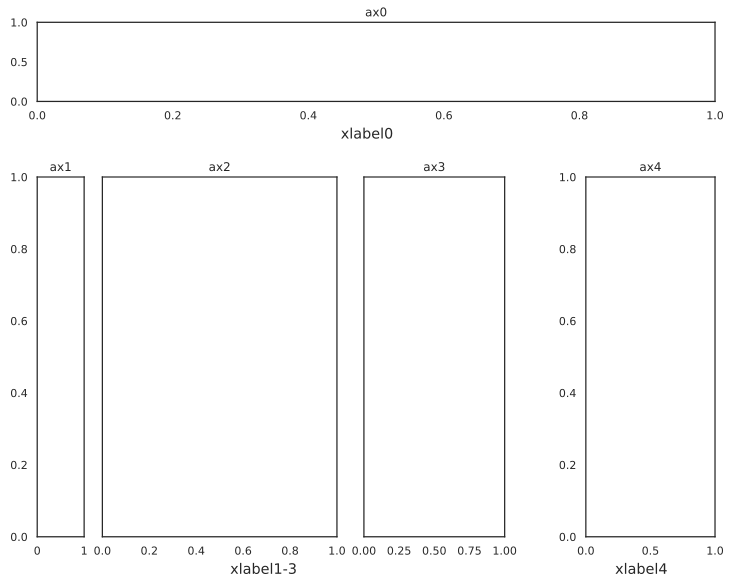

In [234]:
fig = plt.figure(constrained_layout=True, figsize=(10, 8))

# create top/bottom subfigs
(subfig_t, subfig_b) = fig.subfigures(2, 1, hspace=0.05, height_ratios=[1, 3])

# put ax0 in top subfig
ax0 = subfig_t.subplots()
ax0.set_title('ax0')
subfig_t.supxlabel('xlabel0')

# create left/right subfigs nested in bottom subfig
(subfig_bl, subfig_br) = subfig_b.subfigures(1, 2, wspace=0.1, width_ratios=[3, 1])

# put ax1-ax3 in gridspec of bottom-left subfig
gs = subfig_bl.add_gridspec(nrows=1, ncols=9)
ax1 = subfig_bl.add_subplot(gs[0, :1])
ax2 = subfig_bl.add_subplot(gs[0, 1:6], sharey=ax1)
ax3 = subfig_bl.add_subplot(gs[0, 6:], sharey=ax1)
ax1.set_title('ax1')
ax2.set_title('ax2')
ax3.set_title('ax3')
ax2.get_yaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
subfig_bl.supxlabel('xlabel1-3')

# put ax4 in bottom-right subfig
ax4 = subfig_br.subplots()
ax4.set_title('ax4')
subfig_br.supxlabel('xlabel4')